In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

In [3]:
!pip install xgboost

import xgboost
from xgboost import XGBRegressor, XGBClassifier

You should consider upgrading via the '/home/andres/anaconda3/bin/python -m pip install --upgrade pip' command.


## DATA

In [4]:
# data

folder_data = "../../MLL-exclusion/data/"

In [5]:
folder_saved = "Zprime-SSM-mumu-mZ2500GeV-variables/"

# 1st DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-pt-2500-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-eta-2500-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-phi-2500-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-pt-2500-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-eta-2500-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-phi-2500-1.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mmumu-1.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()




# 2nd DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-pt-2500-2.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-eta-2500-2.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-phi-2500-2.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-pt-2500-2.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-eta-2500-2.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-phi-2500-2.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mmumu-2.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()

723116
723078


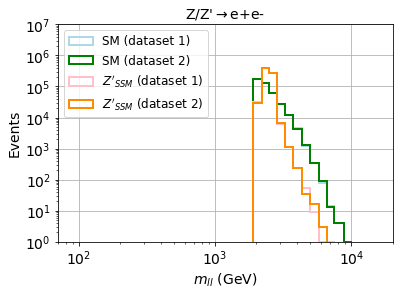

In [6]:
# just to check that we need to ask again that the invariant mass has to be greater than 2000 GeV

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

folder_saved = "SM/mumu/"

invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mmumu-1800.txt", delimiter=',')
invariant_mass_eeSM_1800_2 = np.loadtxt(folder_data + folder_saved +"mmumu-1800-2.txt", delimiter=',')

plt.hist(invariant_mass_eeSM_1800, bins=bins_atlas, lw=2, edgecolor='lightblue', histtype='step', label="SM (dataset 1)")
plt.hist(invariant_mass_eeSM_1800_2, bins=bins_atlas, lw=2, edgecolor='green', histtype='step', label="SM (dataset 2)")


folder_saved = "Zprime-SSM-mumu-mZ2500GeV-variables/"

invariant_mass_eeSSMZprime_1 = np.loadtxt(folder_data + folder_saved +"mmumu-1.txt", delimiter=',')
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mmumu-2.txt", delimiter=',')

plt.hist(invariant_mass_eeSSMZprime_1, bins=bins_atlas, lw=2, edgecolor='pink', histtype='step', label="$Z'_{SSM}$ (dataset 1)")
plt.hist(invariant_mass_eeSSMZprime_2, bins=bins_atlas, lw=2, edgecolor='darkorange', histtype='step', label="$Z'_{SSM}$ (dataset 2)")


plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow$e+e-",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### SM

In [7]:
######
# SM #
######


folder_saved = "SM/mumu/"


# 1st DATASET
invariant_mass_eeSM = np.loadtxt(folder_data + folder_saved +"mmumu-1800.txt", delimiter=',')

e1pt_eeSM = np.loadtxt(folder_data + folder_saved + 'mu1_pt_events_IM_1800.txt', delimiter=',')
e1eta_eeSM = np.loadtxt(folder_data + folder_saved + 'mu1_eta_events_IM_1800.txt', delimiter=',')
e1phi_eeSM = np.loadtxt(folder_data + folder_saved + 'mu1_phi_events_IM_1800.txt', delimiter=',')

e2pt_eeSM = np.loadtxt(folder_data + folder_saved + 'mu2_pt_events_IM_1800.txt', delimiter=',')
e2eta_eeSM = np.loadtxt(folder_data + folder_saved + 'mu2_eta_events_IM_1800.txt', delimiter=',')
e2phi_eeSM = np.loadtxt(folder_data + folder_saved + 'mu2_phi_events_IM_1800.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSM))):
    if invariant_mass_eeSM[i]< 2000 or e1eta_eeSM[i] < -2.65 or e1eta_eeSM[i] > 2.65 or e2eta_eeSM[i] < -2.65 or e2eta_eeSM[i] > 2.65:
        e1pt_eeSM = np.delete(e1pt_eeSM, i)
        e1eta_eeSM = np.delete(e1eta_eeSM, i)
        e1phi_eeSM = np.delete(e1phi_eeSM, i)
        
        e2pt_eeSM = np.delete(e2pt_eeSM, i)
        e2eta_eeSM = np.delete(e2eta_eeSM, i)
        e2phi_eeSM = np.delete(e2phi_eeSM, i)
        
        invariant_mass_eeSM = np.delete(invariant_mass_eeSM, i)
        

        
        
# 2nd DATASET
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mmumu-1800-2.txt", delimiter=',')

e1pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu1_pt_events_IM_1800_2.txt', delimiter=',')
e1eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu1_eta_events_IM_1800_2.txt', delimiter=',')
e1phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu1_phi_events_IM_1800_2.txt', delimiter=',')

e2pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu2_pt_events_IM_1800_2.txt', delimiter=',')
e2eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu2_eta_events_IM_1800_2.txt', delimiter=',')
e2phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu2_phi_events_IM_1800_2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSM_1800))):
    if invariant_mass_eeSM_1800[i]< 2000 or e1eta_eeSM_1800[i] < -2.65 or e1eta_eeSM_1800[i] > 2.65 or e2eta_eeSM_1800[i] < -2.65 or e2eta_eeSM_1800[i] > 2.65:
        e1pt_eeSM_1800 = np.delete(e1pt_eeSM_1800, i)
        e1eta_eeSM_1800 = np.delete(e1eta_eeSM_1800, i)
        e1phi_eeSM_1800 = np.delete(e1phi_eeSM_1800, i)
        
        e2pt_eeSM_1800 = np.delete(e2pt_eeSM_1800, i)
        e2eta_eeSM_1800 = np.delete(e2eta_eeSM_1800, i)
        e2phi_eeSM_1800 = np.delete(e2phi_eeSM_1800, i)
        
        invariant_mass_eeSM_1800 = np.delete(invariant_mass_eeSM_1800, i)
        


# concatenate results
e1pt_eeSM = np.concatenate([e1pt_eeSM,e1pt_eeSM_1800])
e1eta_eeSM = np.concatenate([e1eta_eeSM,e1eta_eeSM_1800])
e1phi_eeSM = np.concatenate([e1phi_eeSM,e1phi_eeSM_1800])

e2pt_eeSM = np.concatenate([e2pt_eeSM,e2pt_eeSM_1800])
e2eta_eeSM = np.concatenate([e2eta_eeSM,e2eta_eeSM_1800])
e2phi_eeSM = np.concatenate([e2phi_eeSM,e2phi_eeSM_1800])

invariant_mass_eeSM = np.concatenate([invariant_mass_eeSM,invariant_mass_eeSM_1800])



# remove the aux
del e1pt_eeSM_1800
del e1eta_eeSM_1800
del e1phi_eeSM_1800

del e2pt_eeSM_1800
del e2eta_eeSM_1800
del e2phi_eeSM_1800

del invariant_mass_eeSM_1800




# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSM = np.array([a-b for a,b in zip(e1eta_eeSM,e2eta_eeSM)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSM = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSM,e2eta_eeSM,e1phi_eeSM,e2phi_eeSM)])



print(e1pt_eeSM.shape)
print(e1eta_eeSM.shape)
print(e1phi_eeSM.shape)

print(e2pt_eeSM.shape)
print(e2eta_eeSM.shape)
print(e2phi_eeSM.shape)

print(invariant_mass_eeSM.shape)
print(e1e2diffeta_eeSM.shape)
print(e1e2R_eeSM.shape)

(804774,)
(804774,)
(804774,)
(804774,)
(804774,)
(804774,)
(804774,)
(804774,)
(804774,)


In [8]:
print(min(e1eta_eeSM))
print(max(e1eta_eeSM))

print(min(e2eta_eeSM))
print(max(e2eta_eeSM))

-2.646
2.648
-2.649
2.649


### SSM Z prime

In [9]:
##########
# Zprime #
##########


folder_saved = "Zprime-SSM-mumu-mZ2500GeV-variables/"


# 1st DATASET
invariant_mass_eeSSMZprime = np.loadtxt(folder_data + folder_saved +"mmumu-1.txt", delimiter=',')

e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-pt-2500-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-eta-2500-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-phi-2500-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-pt-2500-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-eta-2500-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-phi-2500-1.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSSMZprime))):
    if invariant_mass_eeSSMZprime[i]< 2000 or e1eta_eeSSMZprime[i] < -2.65 or e1eta_eeSSMZprime[i] > 2.65 or e2eta_eeSSMZprime[i] < -2.65 or e2eta_eeSSMZprime[i] > 2.65:
        e1pt_eeSSMZprime = np.delete(e1pt_eeSSMZprime, i)
        e1eta_eeSSMZprime = np.delete(e1eta_eeSSMZprime, i)
        e1phi_eeSSMZprime = np.delete(e1phi_eeSSMZprime, i)
        
        e2pt_eeSSMZprime = np.delete(e2pt_eeSSMZprime, i)
        e2eta_eeSSMZprime = np.delete(e2eta_eeSSMZprime, i)
        e2phi_eeSSMZprime = np.delete(e2phi_eeSSMZprime, i)
        
        invariant_mass_eeSSMZprime = np.delete(invariant_mass_eeSSMZprime, i)

        
        
        
        
# 2nd DATASET
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mmumu-2.txt", delimiter=',')

e1pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu1-pt-2500-2.txt', delimiter=',')
e1eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu1-eta-2500-2.txt', delimiter=',')
e1phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu1-phi-2500-2.txt', delimiter=',')

e2pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu2-pt-2500-2.txt', delimiter=',')
e2eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu2-eta-2500-2.txt', delimiter=',')
e2phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu2-phi-2500-2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSSMZprime_2))):
    if invariant_mass_eeSSMZprime_2[i]< 2000 or e1eta_eeSSMZprime_2[i] < -2.65 or e1eta_eeSSMZprime_2[i] > 2.65 or e2eta_eeSSMZprime_2[i] < -2.65 or e2eta_eeSSMZprime_2[i] > 2.65:
        e1pt_eeSSMZprime_2 = np.delete(e1pt_eeSSMZprime_2, i)
        e1eta_eeSSMZprime_2 = np.delete(e1eta_eeSSMZprime_2, i)
        e1phi_eeSSMZprime_2 = np.delete(e1phi_eeSSMZprime_2, i)
        
        e2pt_eeSSMZprime_2 = np.delete(e2pt_eeSSMZprime_2, i)
        e2eta_eeSSMZprime_2 = np.delete(e2eta_eeSSMZprime_2, i)
        e2phi_eeSSMZprime_2 = np.delete(e2phi_eeSSMZprime_2, i)
        
        invariant_mass_eeSSMZprime_2 = np.delete(invariant_mass_eeSSMZprime_2, i)
        
eventos_parton = 1000000
aceptancia_eeSSMZprime_2 = 1.*len(invariant_mass_eeSSMZprime_2) / eventos_parton
print(aceptancia_eeSSMZprime_2)


# concatenate results
e1pt_eeSSMZprime = np.concatenate([e1pt_eeSSMZprime,e1pt_eeSSMZprime_2])
e1eta_eeSSMZprime = np.concatenate([e1eta_eeSSMZprime,e1eta_eeSSMZprime_2])
e1phi_eeSSMZprime = np.concatenate([e1phi_eeSSMZprime,e1phi_eeSSMZprime_2])

e2pt_eeSSMZprime = np.concatenate([e2pt_eeSSMZprime,e2pt_eeSSMZprime_2])
e2eta_eeSSMZprime = np.concatenate([e2eta_eeSSMZprime,e2eta_eeSSMZprime_2])
e2phi_eeSSMZprime = np.concatenate([e2phi_eeSSMZprime,e2phi_eeSSMZprime_2])

invariant_mass_eeSSMZprime = np.concatenate([invariant_mass_eeSSMZprime,invariant_mass_eeSSMZprime_2])



# remove the aux
del e1pt_eeSSMZprime_2
del e1eta_eeSSMZprime_2
del e1phi_eeSSMZprime_2

del e2pt_eeSSMZprime_2
del e2eta_eeSSMZprime_2
del e2phi_eeSSMZprime_2

del invariant_mass_eeSSMZprime_2








# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSSMZprime = np.array([a-b for a,b in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSSMZprime = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime,e1phi_eeSSMZprime,e2phi_eeSSMZprime)])




print(e1pt_eeSSMZprime.shape)
print(e1eta_eeSSMZprime.shape)
print(e1phi_eeSSMZprime.shape)

print(e2pt_eeSSMZprime.shape)
print(e2eta_eeSSMZprime.shape)
print(e2phi_eeSSMZprime.shape)

print(invariant_mass_eeSSMZprime.shape)
print(e1e2diffeta_eeSSMZprime.shape)
print(e1e2R_eeSSMZprime.shape)

0.723034
(1446109,)
(1446109,)
(1446109,)
(1446109,)
(1446109,)
(1446109,)
(1446109,)
(1446109,)
(1446109,)


In [10]:
print(min(e1eta_eeSSMZprime))
print(max(e1eta_eeSSMZprime))

print(min(e2eta_eeSSMZprime))
print(max(e2eta_eeSSMZprime))

-2.644
2.627
-2.649
2.649


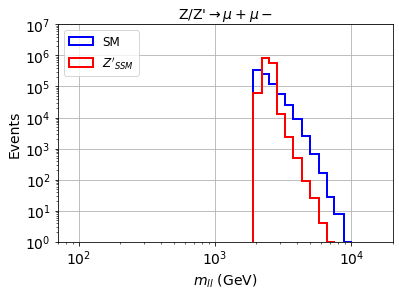

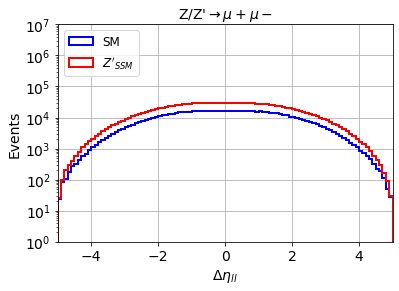

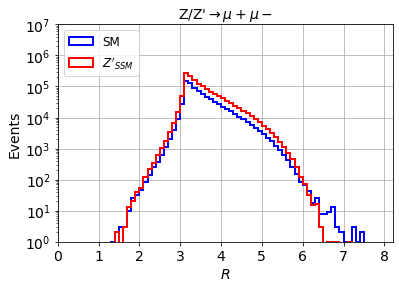

In [11]:
# NOW DATA IS CHECKED

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

plt.hist(invariant_mass_eeSM, bins=bins_atlas, lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(invariant_mass_eeSSMZprime, bins=bins_atlas, lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2diffeta_eeSM, bins=100, range=[-5,5], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2diffeta_eeSSMZprime, bins=100, range=[-5,5], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$\Delta \eta_{ll}$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(-5,5)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2R_eeSM, bins=82, range=[0,8.2], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2R_eeSSMZprime, bins=82, range=[0,8.2], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$R$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(0.,8.2)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### Train-test-val datasets

In [12]:
# to normalize
scaler = preprocessing.MinMaxScaler()

# Number of data points (per-class) for the ML classifier
num_data = 750000



df = pd.DataFrame()

df['e1-pt']= np.concatenate([e1pt_eeSM[:num_data],e1pt_eeSSMZprime[:num_data]])
df['e1-eta']= np.concatenate([e1eta_eeSM[:num_data],e1eta_eeSSMZprime[:num_data]])
df['e1-phi']= np.concatenate([e1phi_eeSM[:num_data],e1phi_eeSSMZprime[:num_data]])

df['e2-pt']= np.concatenate([e2pt_eeSM[:num_data],e2pt_eeSSMZprime[:num_data]])
df['e2-eta']= np.concatenate([e2eta_eeSM[:num_data],e2eta_eeSSMZprime[:num_data]])
df['e2-phi']= np.concatenate([e2phi_eeSM[:num_data],e2phi_eeSSMZprime[:num_data]])

df['mll']= np.concatenate([invariant_mass_eeSM[:num_data],invariant_mass_eeSSMZprime[:num_data]])
df['delta-eta']= np.concatenate([e1e2diffeta_eeSM[:num_data],e1e2diffeta_eeSSMZprime[:num_data]])
df['R']= np.concatenate([e1e2R_eeSM[:num_data],e1e2R_eeSSMZprime[:num_data]])

df['Y'] = np.concatenate([np.zeros(num_data),np.ones(num_data)])


# remove the used data
del e1pt_eeSM
del e1eta_eeSM
del e1phi_eeSM

del e2pt_eeSM
del e2eta_eeSM
del e2phi_eeSM

del e1pt_eeSSMZprime
del e1eta_eeSSMZprime
del e1phi_eeSSMZprime

del e2pt_eeSSMZprime
del e2eta_eeSSMZprime
del e2phi_eeSSMZprime


# NORMALIZE
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi','mll','delta-eta','R','Y'])


# print df to see the data
print(df)


# X and Y for the classifier
X_mon = df[['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi']].values
y_mon = df[['Y']].values

del df

# divide into train-val and test data samples
test_ratio = 1./3
val_ratio = 0.25


X_mon_aux, X_mon_test, y_mon_aux, y_mon_test = train_test_split(X_mon,
                                                                y_mon,
                                                                test_size=test_ratio,
                                                                random_state=42,
                                                                #stratify = y_mon,
                                                                shuffle=True)


X_mon_train, X_mon_val, y_mon_train, y_mon_val = train_test_split(X_mon_aux,
                                                                  y_mon_aux,
                                                                  test_size=val_ratio,
                                                                  random_state=42,
                                                                  #stratify = y_mon_aux,
                                                                  shuffle=True)


print('')
print('X_mon_train : ', X_mon_train.shape)
print('y_mon_train : ', y_mon_train.shape)
print('X_mon_val : ', X_mon_val.shape)
print('y_mon_val : ', y_mon_val.shape)
print('X_mon_test : ', X_mon_test.shape)
print('y_mon_test : ', y_mon_test.shape)
print('')

            e1-pt    e1-eta    e1-phi     e2-pt    e2-eta    e2-phi       mll  \
0        0.246488  0.591235  0.081158  0.286204  0.609664  0.557288  0.039780   
1        0.240603  0.636759  0.312540  0.272247  0.353341  0.827976  0.121861   
2        0.325314  0.703627  0.972311  0.356583  0.502831  0.473265  0.181610   
3        0.226503  0.581224  0.581158  0.238788  0.567573  0.101528  0.002850   
4        0.200427  0.544012  0.273711  0.248309  0.285957  0.765595  0.061335   
...           ...       ...       ...       ...       ...       ...       ...   
1499995  0.258373  0.558746  0.108530  0.302284  0.582106  0.595481  0.056014   
1499996  0.113664  0.273139  0.462763  0.150473  0.767271  0.953851  0.065851   
1499997  0.196274  0.713260  0.220719  0.214611  0.413364  0.692393  0.058157   
1499998  0.252833  0.384964  0.675207  0.291162  0.328048  0.165500  0.050208   
1499999  0.255091  0.730827  0.358370  0.298218  0.567573  0.853278  0.083475   

         delta-eta         

### XGBoost (per-event)

##### For 1 ML

/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68554	validation_1-logloss:0.68563
[1]	validation_0-logloss:0.67906	validation_1-logloss:0.67924
[2]	validation_0-logloss:0.67380	validation_1-logloss:0.67415
[3]	validation_0-logloss:0.66931	validation_1-logloss:0.66966
[4]	validation_0-logloss:0.66553	validation_1-logloss:0.66590
[5]	validation_0-logloss:0.66147	validation_1-logloss:0.66192
[6]	validation_0-logloss:0.65803	validation_1-logloss:0.65848
[7]	validation_0-logloss:0.65508	validation_1-logloss:0.65559
[8]	validation_0-logloss:0.65225	validation_1-logloss:0.65291
[9]	validation_0-logloss:0.65009	validation_1-logloss:0.65082
[10]	validation_0-logloss:0.64694	validation_1-logloss:0.64775
[11]	validation_0-logloss:0.64460	validation_1-logloss:0.64556
[12]	validation_0-logloss:0.64311	validation_1-logloss:0.64405
[13]	validation_0-logloss:0.64075	validation_1-logloss:0.64176
[14]	validation_0-logloss:0.63826	validation_1-logloss:0.63934
[15]	validation_0-logloss:0.63729	validation_1-logloss:0.63838
[1

[130]	validation_0-logloss:0.56819	validation_1-logloss:0.57220
[131]	validation_0-logloss:0.56743	validation_1-logloss:0.57145
[132]	validation_0-logloss:0.56696	validation_1-logloss:0.57099
[133]	validation_0-logloss:0.56672	validation_1-logloss:0.57078
[134]	validation_0-logloss:0.56659	validation_1-logloss:0.57064
[135]	validation_0-logloss:0.56600	validation_1-logloss:0.57007
[136]	validation_0-logloss:0.56495	validation_1-logloss:0.56902
[137]	validation_0-logloss:0.56454	validation_1-logloss:0.56860
[138]	validation_0-logloss:0.56428	validation_1-logloss:0.56836
[139]	validation_0-logloss:0.56386	validation_1-logloss:0.56799
[140]	validation_0-logloss:0.56371	validation_1-logloss:0.56784
[141]	validation_0-logloss:0.56343	validation_1-logloss:0.56759
[142]	validation_0-logloss:0.56255	validation_1-logloss:0.56669
[143]	validation_0-logloss:0.56234	validation_1-logloss:0.56650
[144]	validation_0-logloss:0.56138	validation_1-logloss:0.56556
[145]	validation_0-logloss:0.56107	valid

[259]	validation_0-logloss:0.53528	validation_1-logloss:0.54117
[260]	validation_0-logloss:0.53520	validation_1-logloss:0.54110
[261]	validation_0-logloss:0.53510	validation_1-logloss:0.54100
[262]	validation_0-logloss:0.53493	validation_1-logloss:0.54086
[263]	validation_0-logloss:0.53460	validation_1-logloss:0.54055
[264]	validation_0-logloss:0.53421	validation_1-logloss:0.54017
[265]	validation_0-logloss:0.53407	validation_1-logloss:0.54005
[266]	validation_0-logloss:0.53400	validation_1-logloss:0.54000
[267]	validation_0-logloss:0.53392	validation_1-logloss:0.53994
[268]	validation_0-logloss:0.53382	validation_1-logloss:0.53985
[269]	validation_0-logloss:0.53367	validation_1-logloss:0.53971
[270]	validation_0-logloss:0.53318	validation_1-logloss:0.53924
[271]	validation_0-logloss:0.53281	validation_1-logloss:0.53889
[272]	validation_0-logloss:0.53270	validation_1-logloss:0.53878
[273]	validation_0-logloss:0.53259	validation_1-logloss:0.53868
[274]	validation_0-logloss:0.53254	valid

[388]	validation_0-logloss:0.51892	validation_1-logloss:0.52666
[389]	validation_0-logloss:0.51887	validation_1-logloss:0.52663
[390]	validation_0-logloss:0.51863	validation_1-logloss:0.52641
[391]	validation_0-logloss:0.51856	validation_1-logloss:0.52636
[392]	validation_0-logloss:0.51851	validation_1-logloss:0.52633
[393]	validation_0-logloss:0.51844	validation_1-logloss:0.52627
[394]	validation_0-logloss:0.51838	validation_1-logloss:0.52624
[395]	validation_0-logloss:0.51836	validation_1-logloss:0.52622
[396]	validation_0-logloss:0.51834	validation_1-logloss:0.52620
[397]	validation_0-logloss:0.51831	validation_1-logloss:0.52619
[398]	validation_0-logloss:0.51820	validation_1-logloss:0.52611
[399]	validation_0-logloss:0.51818	validation_1-logloss:0.52610
[400]	validation_0-logloss:0.51807	validation_1-logloss:0.52600
[401]	validation_0-logloss:0.51795	validation_1-logloss:0.52590
[402]	validation_0-logloss:0.51769	validation_1-logloss:0.52567
[403]	validation_0-logloss:0.51767	valid

[517]	validation_0-logloss:0.50956	validation_1-logloss:0.51912
[518]	validation_0-logloss:0.50954	validation_1-logloss:0.51910
[519]	validation_0-logloss:0.50952	validation_1-logloss:0.51909
[520]	validation_0-logloss:0.50950	validation_1-logloss:0.51909
[521]	validation_0-logloss:0.50943	validation_1-logloss:0.51902
[522]	validation_0-logloss:0.50939	validation_1-logloss:0.51900
[523]	validation_0-logloss:0.50937	validation_1-logloss:0.51900
[524]	validation_0-logloss:0.50924	validation_1-logloss:0.51889
[525]	validation_0-logloss:0.50922	validation_1-logloss:0.51888
[526]	validation_0-logloss:0.50914	validation_1-logloss:0.51881
[527]	validation_0-logloss:0.50912	validation_1-logloss:0.51881
[528]	validation_0-logloss:0.50909	validation_1-logloss:0.51879
[529]	validation_0-logloss:0.50907	validation_1-logloss:0.51878
[530]	validation_0-logloss:0.50895	validation_1-logloss:0.51869
[531]	validation_0-logloss:0.50893	validation_1-logloss:0.51868
[532]	validation_0-logloss:0.50891	valid

[646]	validation_0-logloss:0.50299	validation_1-logloss:0.51421
[647]	validation_0-logloss:0.50298	validation_1-logloss:0.51421
[648]	validation_0-logloss:0.50297	validation_1-logloss:0.51421
[649]	validation_0-logloss:0.50283	validation_1-logloss:0.51409
[650]	validation_0-logloss:0.50282	validation_1-logloss:0.51409
[651]	validation_0-logloss:0.50279	validation_1-logloss:0.51407
[652]	validation_0-logloss:0.50264	validation_1-logloss:0.51394
[653]	validation_0-logloss:0.50253	validation_1-logloss:0.51385
[654]	validation_0-logloss:0.50252	validation_1-logloss:0.51385
[655]	validation_0-logloss:0.50250	validation_1-logloss:0.51385
[656]	validation_0-logloss:0.50249	validation_1-logloss:0.51385
[657]	validation_0-logloss:0.50248	validation_1-logloss:0.51384
[658]	validation_0-logloss:0.50248	validation_1-logloss:0.51384
[659]	validation_0-logloss:0.50245	validation_1-logloss:0.51384
[660]	validation_0-logloss:0.50232	validation_1-logloss:0.51370
[661]	validation_0-logloss:0.50228	valid

[775]	validation_0-logloss:0.49672	validation_1-logloss:0.50954
[776]	validation_0-logloss:0.49670	validation_1-logloss:0.50953
[777]	validation_0-logloss:0.49661	validation_1-logloss:0.50946
[778]	validation_0-logloss:0.49649	validation_1-logloss:0.50936
[779]	validation_0-logloss:0.49647	validation_1-logloss:0.50935
[780]	validation_0-logloss:0.49641	validation_1-logloss:0.50930
[781]	validation_0-logloss:0.49625	validation_1-logloss:0.50916
[782]	validation_0-logloss:0.49614	validation_1-logloss:0.50906
[783]	validation_0-logloss:0.49609	validation_1-logloss:0.50902
[784]	validation_0-logloss:0.49600	validation_1-logloss:0.50894
[785]	validation_0-logloss:0.49598	validation_1-logloss:0.50894
[786]	validation_0-logloss:0.49597	validation_1-logloss:0.50894
[787]	validation_0-logloss:0.49595	validation_1-logloss:0.50894
[788]	validation_0-logloss:0.49585	validation_1-logloss:0.50887
[789]	validation_0-logloss:0.49583	validation_1-logloss:0.50887
[790]	validation_0-logloss:0.49573	valid

[904]	validation_0-logloss:0.49237	validation_1-logloss:0.50689
[905]	validation_0-logloss:0.49235	validation_1-logloss:0.50689
[906]	validation_0-logloss:0.49221	validation_1-logloss:0.50676
[907]	validation_0-logloss:0.49217	validation_1-logloss:0.50673
[908]	validation_0-logloss:0.49213	validation_1-logloss:0.50670
[909]	validation_0-logloss:0.49209	validation_1-logloss:0.50668
[910]	validation_0-logloss:0.49207	validation_1-logloss:0.50667
[911]	validation_0-logloss:0.49205	validation_1-logloss:0.50666
[912]	validation_0-logloss:0.49204	validation_1-logloss:0.50666
[913]	validation_0-logloss:0.49203	validation_1-logloss:0.50666
[914]	validation_0-logloss:0.49201	validation_1-logloss:0.50665
[915]	validation_0-logloss:0.49200	validation_1-logloss:0.50666
[916]	validation_0-logloss:0.49199	validation_1-logloss:0.50666
[917]	validation_0-logloss:0.49196	validation_1-logloss:0.50664
[918]	validation_0-logloss:0.49195	validation_1-logloss:0.50664
[919]	validation_0-logloss:0.49193	valid

[1032]	validation_0-logloss:0.48844	validation_1-logloss:0.50471
[1033]	validation_0-logloss:0.48841	validation_1-logloss:0.50469
[1034]	validation_0-logloss:0.48840	validation_1-logloss:0.50469
[1035]	validation_0-logloss:0.48838	validation_1-logloss:0.50468
[1036]	validation_0-logloss:0.48837	validation_1-logloss:0.50469
[1037]	validation_0-logloss:0.48835	validation_1-logloss:0.50469
[1038]	validation_0-logloss:0.48823	validation_1-logloss:0.50458
[1039]	validation_0-logloss:0.48819	validation_1-logloss:0.50455
[1040]	validation_0-logloss:0.48817	validation_1-logloss:0.50455
[1041]	validation_0-logloss:0.48814	validation_1-logloss:0.50455
[1042]	validation_0-logloss:0.48813	validation_1-logloss:0.50455
[1043]	validation_0-logloss:0.48812	validation_1-logloss:0.50455
[1044]	validation_0-logloss:0.48804	validation_1-logloss:0.50450
[1045]	validation_0-logloss:0.48799	validation_1-logloss:0.50447
[1046]	validation_0-logloss:0.48797	validation_1-logloss:0.50447
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.48593	validation_1-logloss:0.50382
[1160]	validation_0-logloss:0.48580	validation_1-logloss:0.50371
[1161]	validation_0-logloss:0.48580	validation_1-logloss:0.50372
[1162]	validation_0-logloss:0.48579	validation_1-logloss:0.50372
[1163]	validation_0-logloss:0.48578	validation_1-logloss:0.50372
[1164]	validation_0-logloss:0.48577	validation_1-logloss:0.50371
[1165]	validation_0-logloss:0.48575	validation_1-logloss:0.50370
[1166]	validation_0-logloss:0.48574	validation_1-logloss:0.50370
[1167]	validation_0-logloss:0.48573	validation_1-logloss:0.50370
[1168]	validation_0-logloss:0.48567	validation_1-logloss:0.50366
[1169]	validation_0-logloss:0.48565	validation_1-logloss:0.50365
[1170]	validation_0-logloss:0.48556	validation_1-logloss:0.50356
[1171]	validation_0-logloss:0.48555	validation_1-logloss:0.50356
[1172]	validation_0-logloss:0.48553	validation_1-logloss:0.50356
[1173]	validation_0-logloss:0.48552	validation_1-logloss:0.50356
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.48274	validation_1-logloss:0.50219
[1287]	validation_0-logloss:0.48264	validation_1-logloss:0.50209
[1288]	validation_0-logloss:0.48263	validation_1-logloss:0.50209
[1289]	validation_0-logloss:0.48262	validation_1-logloss:0.50209
[1290]	validation_0-logloss:0.48258	validation_1-logloss:0.50206
[1291]	validation_0-logloss:0.48256	validation_1-logloss:0.50206
[1292]	validation_0-logloss:0.48255	validation_1-logloss:0.50206
[1293]	validation_0-logloss:0.48250	validation_1-logloss:0.50203
[1294]	validation_0-logloss:0.48245	validation_1-logloss:0.50200
[1295]	validation_0-logloss:0.48244	validation_1-logloss:0.50199
[1296]	validation_0-logloss:0.48234	validation_1-logloss:0.50191
[1297]	validation_0-logloss:0.48227	validation_1-logloss:0.50187
[1298]	validation_0-logloss:0.48222	validation_1-logloss:0.50184
[1299]	validation_0-logloss:0.48221	validation_1-logloss:0.50184
[1300]	validation_0-logloss:0.48212	validation_1-logloss:0.50177
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.47913	validation_1-logloss:0.50033
[1414]	validation_0-logloss:0.47912	validation_1-logloss:0.50033
[1415]	validation_0-logloss:0.47911	validation_1-logloss:0.50034
[1416]	validation_0-logloss:0.47909	validation_1-logloss:0.50034
[1417]	validation_0-logloss:0.47908	validation_1-logloss:0.50033
[1418]	validation_0-logloss:0.47907	validation_1-logloss:0.50034
[1419]	validation_0-logloss:0.47906	validation_1-logloss:0.50034
[1420]	validation_0-logloss:0.47905	validation_1-logloss:0.50034
[1421]	validation_0-logloss:0.47903	validation_1-logloss:0.50034
[1422]	validation_0-logloss:0.47902	validation_1-logloss:0.50034
[1423]	validation_0-logloss:0.47901	validation_1-logloss:0.50034
[1424]	validation_0-logloss:0.47900	validation_1-logloss:0.50034
[1425]	validation_0-logloss:0.47900	validation_1-logloss:0.50034
[1426]	validation_0-logloss:0.47899	validation_1-logloss:0.50034
[1427]	validation_0-logloss:0.47897	validation_1-logloss:0.50035
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.47670	validation_1-logloss:0.49956
[1541]	validation_0-logloss:0.47669	validation_1-logloss:0.49956
[1542]	validation_0-logloss:0.47669	validation_1-logloss:0.49956
[1543]	validation_0-logloss:0.47667	validation_1-logloss:0.49957
[1544]	validation_0-logloss:0.47666	validation_1-logloss:0.49956
[1545]	validation_0-logloss:0.47665	validation_1-logloss:0.49956
[1546]	validation_0-logloss:0.47664	validation_1-logloss:0.49956
[1547]	validation_0-logloss:0.47663	validation_1-logloss:0.49956
[1548]	validation_0-logloss:0.47661	validation_1-logloss:0.49956
[1549]	validation_0-logloss:0.47657	validation_1-logloss:0.49953
[1550]	validation_0-logloss:0.47656	validation_1-logloss:0.49954
[1551]	validation_0-logloss:0.47654	validation_1-logloss:0.49953
[1552]	validation_0-logloss:0.47653	validation_1-logloss:0.49952
[1553]	validation_0-logloss:0.47652	validation_1-logloss:0.49952
[1554]	validation_0-logloss:0.47651	validation_1-logloss:0.49952
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.47458	validation_1-logloss:0.49906
[1668]	validation_0-logloss:0.47457	validation_1-logloss:0.49906
[1669]	validation_0-logloss:0.47450	validation_1-logloss:0.49900
[1670]	validation_0-logloss:0.47449	validation_1-logloss:0.49899
[1671]	validation_0-logloss:0.47448	validation_1-logloss:0.49899
[1672]	validation_0-logloss:0.47447	validation_1-logloss:0.49899
[1673]	validation_0-logloss:0.47446	validation_1-logloss:0.49899
[1674]	validation_0-logloss:0.47444	validation_1-logloss:0.49899
[1675]	validation_0-logloss:0.47440	validation_1-logloss:0.49896
[1676]	validation_0-logloss:0.47436	validation_1-logloss:0.49894
[1677]	validation_0-logloss:0.47434	validation_1-logloss:0.49893
[1678]	validation_0-logloss:0.47433	validation_1-logloss:0.49893
[1679]	validation_0-logloss:0.47431	validation_1-logloss:0.49893
[1680]	validation_0-logloss:0.47430	validation_1-logloss:0.49893
[1681]	validation_0-logloss:0.47429	validation_1-logloss:0.49893
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.47212	validation_1-logloss:0.49829
[1795]	validation_0-logloss:0.47210	validation_1-logloss:0.49828
[1796]	validation_0-logloss:0.47209	validation_1-logloss:0.49828
[1797]	validation_0-logloss:0.47207	validation_1-logloss:0.49828
[1798]	validation_0-logloss:0.47201	validation_1-logloss:0.49824
[1799]	validation_0-logloss:0.47199	validation_1-logloss:0.49824
[1800]	validation_0-logloss:0.47193	validation_1-logloss:0.49820
[1801]	validation_0-logloss:0.47192	validation_1-logloss:0.49820
[1802]	validation_0-logloss:0.47190	validation_1-logloss:0.49819
[1803]	validation_0-logloss:0.47188	validation_1-logloss:0.49820
[1804]	validation_0-logloss:0.47185	validation_1-logloss:0.49819
[1805]	validation_0-logloss:0.47184	validation_1-logloss:0.49819
[1806]	validation_0-logloss:0.47180	validation_1-logloss:0.49817
[1807]	validation_0-logloss:0.47179	validation_1-logloss:0.49816
[1808]	validation_0-logloss:0.47176	validation_1-logloss:0.49816
[1809]	validation_0-loglo

[1921]	validation_0-logloss:0.46992	validation_1-logloss:0.49777
[1922]	validation_0-logloss:0.46990	validation_1-logloss:0.49775
[1923]	validation_0-logloss:0.46988	validation_1-logloss:0.49773
[1924]	validation_0-logloss:0.46985	validation_1-logloss:0.49772
[1925]	validation_0-logloss:0.46980	validation_1-logloss:0.49770
[1926]	validation_0-logloss:0.46979	validation_1-logloss:0.49770
[1927]	validation_0-logloss:0.46979	validation_1-logloss:0.49770
[1928]	validation_0-logloss:0.46978	validation_1-logloss:0.49770
[1929]	validation_0-logloss:0.46976	validation_1-logloss:0.49770
[1930]	validation_0-logloss:0.46974	validation_1-logloss:0.49770
[1931]	validation_0-logloss:0.46973	validation_1-logloss:0.49770
[1932]	validation_0-logloss:0.46971	validation_1-logloss:0.49770
[1933]	validation_0-logloss:0.46969	validation_1-logloss:0.49770
[1934]	validation_0-logloss:0.46965	validation_1-logloss:0.49768
[1935]	validation_0-logloss:0.46963	validation_1-logloss:0.49767
[1936]	validation_0-loglo

[2048]	validation_0-logloss:0.46766	validation_1-logloss:0.49726
[2049]	validation_0-logloss:0.46764	validation_1-logloss:0.49726
[2050]	validation_0-logloss:0.46763	validation_1-logloss:0.49726
[2051]	validation_0-logloss:0.46763	validation_1-logloss:0.49726
[2052]	validation_0-logloss:0.46762	validation_1-logloss:0.49725
[2053]	validation_0-logloss:0.46760	validation_1-logloss:0.49726
[2054]	validation_0-logloss:0.46759	validation_1-logloss:0.49726
[2055]	validation_0-logloss:0.46757	validation_1-logloss:0.49724
[2056]	validation_0-logloss:0.46756	validation_1-logloss:0.49724
[2057]	validation_0-logloss:0.46754	validation_1-logloss:0.49724
[2058]	validation_0-logloss:0.46752	validation_1-logloss:0.49724
[2059]	validation_0-logloss:0.46750	validation_1-logloss:0.49724
[2060]	validation_0-logloss:0.46748	validation_1-logloss:0.49724
[2061]	validation_0-logloss:0.46747	validation_1-logloss:0.49724
[2062]	validation_0-logloss:0.46746	validation_1-logloss:0.49724
[2063]	validation_0-loglo

[2175]	validation_0-logloss:0.46573	validation_1-logloss:0.49681
[2176]	validation_0-logloss:0.46572	validation_1-logloss:0.49682
[2177]	validation_0-logloss:0.46570	validation_1-logloss:0.49682
[2178]	validation_0-logloss:0.46570	validation_1-logloss:0.49683
[2179]	validation_0-logloss:0.46570	validation_1-logloss:0.49683
[2180]	validation_0-logloss:0.46569	validation_1-logloss:0.49683
[2181]	validation_0-logloss:0.46568	validation_1-logloss:0.49683
[2182]	validation_0-logloss:0.46566	validation_1-logloss:0.49683
[2183]	validation_0-logloss:0.46565	validation_1-logloss:0.49684
[2184]	validation_0-logloss:0.46565	validation_1-logloss:0.49684
[2185]	validation_0-logloss:0.46561	validation_1-logloss:0.49682
[2186]	validation_0-logloss:0.46559	validation_1-logloss:0.49681
[2187]	validation_0-logloss:0.46556	validation_1-logloss:0.49681
[2188]	validation_0-logloss:0.46556	validation_1-logloss:0.49681
[2189]	validation_0-logloss:0.46554	validation_1-logloss:0.49681
[2190]	validation_0-loglo

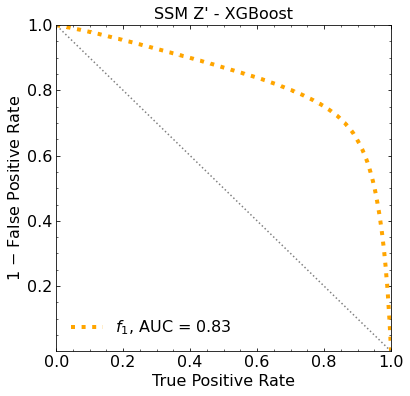

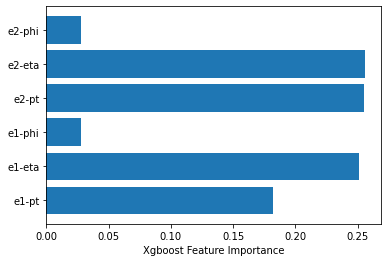

In [13]:
# XGBoost with only the kinematic variables of the leptons

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_mon_train,y_mon_train,eval_set=[(X_mon_train, y_mon_train), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_1ML = classifier.predict_proba(X_mon_test).T[1]


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_1ML)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




feature_names = np.array(['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi'])
plt.barh(feature_names, classifier.feature_importances_)
plt.xlabel("Xgboost Feature Importance")
plt.show()

##### For 10 ML

ML iteration 1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68559	validation_1-logloss:0.68581
[1]	validation_0-logloss:0.67905	validation_1-logloss:0.67909
[2]	validation_0-logloss:0.67354	validation_1-logloss:0.67371
[3]	validation_0-logloss:0.66905	validation_1-logloss:0.66929
[4]	validation_0-logloss:0.66533	validation_1-logloss:0.66558
[5]	validation_0-logloss:0.66129	validation_1-logloss:0.66158
[6]	validation_0-logloss:0.65862	validation_1-logloss:0.65902
[7]	validation_0-logloss:0.65586	validation_1-logloss:0.65630
[8]	validation_0-logloss:0.65299	validation_1-logloss:0.65355
[9]	validation_0-logloss:0.65131	validation_1-logloss:0.65190
[10]	validation_0-logloss:0.64933	validation_1-logloss:0.64993
[11]	validation_0-logloss:0.64731	validation_1-logloss:0.64800
[12]	validation_0-logloss:0.64519	validation_1-logloss:0.64594
[13]	validation_0-logloss:0.64360	validation_1-logloss:0.64440
[14]	validation_0-logloss:0.64251	validation_1-logloss:0.64339
[15]	validation_0-logloss:0.64139	validation_1-logloss:0.64235
[1

[130]	validation_0-logloss:0.56404	validation_1-logloss:0.56993
[131]	validation_0-logloss:0.56343	validation_1-logloss:0.56938
[132]	validation_0-logloss:0.56308	validation_1-logloss:0.56908
[133]	validation_0-logloss:0.56198	validation_1-logloss:0.56800
[134]	validation_0-logloss:0.56161	validation_1-logloss:0.56767
[135]	validation_0-logloss:0.56146	validation_1-logloss:0.56755
[136]	validation_0-logloss:0.56114	validation_1-logloss:0.56725
[137]	validation_0-logloss:0.56045	validation_1-logloss:0.56656
[138]	validation_0-logloss:0.56013	validation_1-logloss:0.56627
[139]	validation_0-logloss:0.55997	validation_1-logloss:0.56612
[140]	validation_0-logloss:0.55944	validation_1-logloss:0.56561
[141]	validation_0-logloss:0.55858	validation_1-logloss:0.56480
[142]	validation_0-logloss:0.55819	validation_1-logloss:0.56443
[143]	validation_0-logloss:0.55788	validation_1-logloss:0.56415
[144]	validation_0-logloss:0.55774	validation_1-logloss:0.56406
[145]	validation_0-logloss:0.55761	valid

[259]	validation_0-logloss:0.53233	validation_1-logloss:0.54194
[260]	validation_0-logloss:0.53209	validation_1-logloss:0.54172
[261]	validation_0-logloss:0.53196	validation_1-logloss:0.54163
[262]	validation_0-logloss:0.53182	validation_1-logloss:0.54152
[263]	validation_0-logloss:0.53169	validation_1-logloss:0.54140
[264]	validation_0-logloss:0.53140	validation_1-logloss:0.54114
[265]	validation_0-logloss:0.53093	validation_1-logloss:0.54069
[266]	validation_0-logloss:0.53086	validation_1-logloss:0.54065
[267]	validation_0-logloss:0.53028	validation_1-logloss:0.54007
[268]	validation_0-logloss:0.53004	validation_1-logloss:0.53986
[269]	validation_0-logloss:0.52990	validation_1-logloss:0.53975
[270]	validation_0-logloss:0.52982	validation_1-logloss:0.53968
[271]	validation_0-logloss:0.52973	validation_1-logloss:0.53962
[272]	validation_0-logloss:0.52963	validation_1-logloss:0.53955
[273]	validation_0-logloss:0.52957	validation_1-logloss:0.53951
[274]	validation_0-logloss:0.52952	valid

[388]	validation_0-logloss:0.51555	validation_1-logloss:0.52837
[389]	validation_0-logloss:0.51553	validation_1-logloss:0.52837
[390]	validation_0-logloss:0.51539	validation_1-logloss:0.52825
[391]	validation_0-logloss:0.51530	validation_1-logloss:0.52819
[392]	validation_0-logloss:0.51525	validation_1-logloss:0.52817
[393]	validation_0-logloss:0.51522	validation_1-logloss:0.52817
[394]	validation_0-logloss:0.51520	validation_1-logloss:0.52817
[395]	validation_0-logloss:0.51519	validation_1-logloss:0.52817
[396]	validation_0-logloss:0.51518	validation_1-logloss:0.52816
[397]	validation_0-logloss:0.51517	validation_1-logloss:0.52817
[398]	validation_0-logloss:0.51513	validation_1-logloss:0.52816
[399]	validation_0-logloss:0.51508	validation_1-logloss:0.52814
[400]	validation_0-logloss:0.51478	validation_1-logloss:0.52786
[401]	validation_0-logloss:0.51471	validation_1-logloss:0.52783
[402]	validation_0-logloss:0.51447	validation_1-logloss:0.52762
[403]	validation_0-logloss:0.51442	valid

[517]	validation_0-logloss:0.50689	validation_1-logloss:0.52252
[518]	validation_0-logloss:0.50688	validation_1-logloss:0.52251
[519]	validation_0-logloss:0.50679	validation_1-logloss:0.52245
[520]	validation_0-logloss:0.50676	validation_1-logloss:0.52245
[521]	validation_0-logloss:0.50670	validation_1-logloss:0.52242
[522]	validation_0-logloss:0.50667	validation_1-logloss:0.52243
[523]	validation_0-logloss:0.50664	validation_1-logloss:0.52241
[524]	validation_0-logloss:0.50659	validation_1-logloss:0.52240
[525]	validation_0-logloss:0.50655	validation_1-logloss:0.52237
[526]	validation_0-logloss:0.50652	validation_1-logloss:0.52237
[527]	validation_0-logloss:0.50648	validation_1-logloss:0.52234
[528]	validation_0-logloss:0.50637	validation_1-logloss:0.52226
[529]	validation_0-logloss:0.50634	validation_1-logloss:0.52225
[530]	validation_0-logloss:0.50624	validation_1-logloss:0.52217
[531]	validation_0-logloss:0.50621	validation_1-logloss:0.52216
[532]	validation_0-logloss:0.50621	valid

[646]	validation_0-logloss:0.50004	validation_1-logloss:0.51862
[647]	validation_0-logloss:0.49998	validation_1-logloss:0.51860
[648]	validation_0-logloss:0.49977	validation_1-logloss:0.51841
[649]	validation_0-logloss:0.49968	validation_1-logloss:0.51836
[650]	validation_0-logloss:0.49953	validation_1-logloss:0.51823
[651]	validation_0-logloss:0.49946	validation_1-logloss:0.51819
[652]	validation_0-logloss:0.49937	validation_1-logloss:0.51815
[653]	validation_0-logloss:0.49933	validation_1-logloss:0.51814
[654]	validation_0-logloss:0.49926	validation_1-logloss:0.51810
[655]	validation_0-logloss:0.49919	validation_1-logloss:0.51806
[656]	validation_0-logloss:0.49915	validation_1-logloss:0.51805
[657]	validation_0-logloss:0.49912	validation_1-logloss:0.51804
[658]	validation_0-logloss:0.49909	validation_1-logloss:0.51805
[659]	validation_0-logloss:0.49903	validation_1-logloss:0.51803
[660]	validation_0-logloss:0.49898	validation_1-logloss:0.51801
[661]	validation_0-logloss:0.49895	valid

[775]	validation_0-logloss:0.49486	validation_1-logloss:0.51647
[776]	validation_0-logloss:0.49485	validation_1-logloss:0.51647
[777]	validation_0-logloss:0.49480	validation_1-logloss:0.51645
[778]	validation_0-logloss:0.49462	validation_1-logloss:0.51629
[779]	validation_0-logloss:0.49455	validation_1-logloss:0.51623
[780]	validation_0-logloss:0.49451	validation_1-logloss:0.51623
[781]	validation_0-logloss:0.49437	validation_1-logloss:0.51611
[782]	validation_0-logloss:0.49435	validation_1-logloss:0.51611
[783]	validation_0-logloss:0.49433	validation_1-logloss:0.51611
[784]	validation_0-logloss:0.49425	validation_1-logloss:0.51605
[785]	validation_0-logloss:0.49421	validation_1-logloss:0.51604
[786]	validation_0-logloss:0.49408	validation_1-logloss:0.51596
[787]	validation_0-logloss:0.49407	validation_1-logloss:0.51596
[788]	validation_0-logloss:0.49400	validation_1-logloss:0.51593
[789]	validation_0-logloss:0.49399	validation_1-logloss:0.51593
[790]	validation_0-logloss:0.49379	valid

[904]	validation_0-logloss:0.48774	validation_1-logloss:0.51249
[905]	validation_0-logloss:0.48772	validation_1-logloss:0.51250
[906]	validation_0-logloss:0.48771	validation_1-logloss:0.51250
[907]	validation_0-logloss:0.48768	validation_1-logloss:0.51249
[908]	validation_0-logloss:0.48756	validation_1-logloss:0.51239
[909]	validation_0-logloss:0.48747	validation_1-logloss:0.51235
[910]	validation_0-logloss:0.48742	validation_1-logloss:0.51232
[911]	validation_0-logloss:0.48739	validation_1-logloss:0.51232
[912]	validation_0-logloss:0.48731	validation_1-logloss:0.51227
[913]	validation_0-logloss:0.48730	validation_1-logloss:0.51228
[914]	validation_0-logloss:0.48728	validation_1-logloss:0.51228
[915]	validation_0-logloss:0.48720	validation_1-logloss:0.51223
[916]	validation_0-logloss:0.48718	validation_1-logloss:0.51223
[917]	validation_0-logloss:0.48702	validation_1-logloss:0.51211
[918]	validation_0-logloss:0.48701	validation_1-logloss:0.51211
[919]	validation_0-logloss:0.48687	valid

[1032]	validation_0-logloss:0.48299	validation_1-logloss:0.51052
[1033]	validation_0-logloss:0.48289	validation_1-logloss:0.51043
[1034]	validation_0-logloss:0.48284	validation_1-logloss:0.51041
[1035]	validation_0-logloss:0.48282	validation_1-logloss:0.51041
[1036]	validation_0-logloss:0.48269	validation_1-logloss:0.51030
[1037]	validation_0-logloss:0.48257	validation_1-logloss:0.51020
[1038]	validation_0-logloss:0.48250	validation_1-logloss:0.51016
[1039]	validation_0-logloss:0.48246	validation_1-logloss:0.51014
[1040]	validation_0-logloss:0.48243	validation_1-logloss:0.51013
[1041]	validation_0-logloss:0.48242	validation_1-logloss:0.51013
[1042]	validation_0-logloss:0.48239	validation_1-logloss:0.51013
[1043]	validation_0-logloss:0.48233	validation_1-logloss:0.51010
[1044]	validation_0-logloss:0.48229	validation_1-logloss:0.51008
[1045]	validation_0-logloss:0.48225	validation_1-logloss:0.51006
[1046]	validation_0-logloss:0.48222	validation_1-logloss:0.51004
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.47840	validation_1-logloss:0.50868
[1160]	validation_0-logloss:0.47837	validation_1-logloss:0.50868
[1161]	validation_0-logloss:0.47835	validation_1-logloss:0.50868
[1162]	validation_0-logloss:0.47832	validation_1-logloss:0.50869
[1163]	validation_0-logloss:0.47831	validation_1-logloss:0.50869
[1164]	validation_0-logloss:0.47829	validation_1-logloss:0.50870
[1165]	validation_0-logloss:0.47829	validation_1-logloss:0.50870
[1166]	validation_0-logloss:0.47827	validation_1-logloss:0.50870
[1167]	validation_0-logloss:0.47825	validation_1-logloss:0.50870
[1168]	validation_0-logloss:0.47820	validation_1-logloss:0.50870
[1169]	validation_0-logloss:0.47819	validation_1-logloss:0.50870
[1170]	validation_0-logloss:0.47819	validation_1-logloss:0.50870
[1171]	validation_0-logloss:0.47819	validation_1-logloss:0.50870
[1172]	validation_0-logloss:0.47818	validation_1-logloss:0.50870
[1173]	validation_0-logloss:0.47817	validation_1-logloss:0.50871
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.47403	validation_1-logloss:0.50725
[1287]	validation_0-logloss:0.47399	validation_1-logloss:0.50724
[1288]	validation_0-logloss:0.47388	validation_1-logloss:0.50717
[1289]	validation_0-logloss:0.47386	validation_1-logloss:0.50718
[1290]	validation_0-logloss:0.47384	validation_1-logloss:0.50718
[1291]	validation_0-logloss:0.47381	validation_1-logloss:0.50718
[1292]	validation_0-logloss:0.47375	validation_1-logloss:0.50714
[1293]	validation_0-logloss:0.47370	validation_1-logloss:0.50712
[1294]	validation_0-logloss:0.47368	validation_1-logloss:0.50712
[1295]	validation_0-logloss:0.47365	validation_1-logloss:0.50712
[1296]	validation_0-logloss:0.47362	validation_1-logloss:0.50712
[1297]	validation_0-logloss:0.47356	validation_1-logloss:0.50711
[1298]	validation_0-logloss:0.47347	validation_1-logloss:0.50704
[1299]	validation_0-logloss:0.47344	validation_1-logloss:0.50704
[1300]	validation_0-logloss:0.47340	validation_1-logloss:0.50701
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.47008	validation_1-logloss:0.50620
[1414]	validation_0-logloss:0.47005	validation_1-logloss:0.50620
[1415]	validation_0-logloss:0.47004	validation_1-logloss:0.50621
[1416]	validation_0-logloss:0.47000	validation_1-logloss:0.50619
[1417]	validation_0-logloss:0.46997	validation_1-logloss:0.50619
[1418]	validation_0-logloss:0.46995	validation_1-logloss:0.50618
[1419]	validation_0-logloss:0.46992	validation_1-logloss:0.50619
[1420]	validation_0-logloss:0.46990	validation_1-logloss:0.50619
[1421]	validation_0-logloss:0.46988	validation_1-logloss:0.50618
[1422]	validation_0-logloss:0.46985	validation_1-logloss:0.50618
[1423]	validation_0-logloss:0.46984	validation_1-logloss:0.50618
[1424]	validation_0-logloss:0.46982	validation_1-logloss:0.50619
[1425]	validation_0-logloss:0.46981	validation_1-logloss:0.50619
[1426]	validation_0-logloss:0.46976	validation_1-logloss:0.50619
[1427]	validation_0-logloss:0.46975	validation_1-logloss:0.50619
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.46669	validation_1-logloss:0.50570
[1541]	validation_0-logloss:0.46667	validation_1-logloss:0.50569
[1542]	validation_0-logloss:0.46665	validation_1-logloss:0.50569
[1543]	validation_0-logloss:0.46665	validation_1-logloss:0.50570
[1544]	validation_0-logloss:0.46663	validation_1-logloss:0.50569
[1545]	validation_0-logloss:0.46660	validation_1-logloss:0.50568
[1546]	validation_0-logloss:0.46658	validation_1-logloss:0.50569
[1547]	validation_0-logloss:0.46655	validation_1-logloss:0.50569
[1548]	validation_0-logloss:0.46655	validation_1-logloss:0.50569
[1549]	validation_0-logloss:0.46652	validation_1-logloss:0.50569
[1550]	validation_0-logloss:0.46651	validation_1-logloss:0.50570
[1551]	validation_0-logloss:0.46649	validation_1-logloss:0.50570
[1552]	validation_0-logloss:0.46647	validation_1-logloss:0.50570
[1553]	validation_0-logloss:0.46646	validation_1-logloss:0.50570
[1554]	validation_0-logloss:0.46643	validation_1-logloss:0.50570
[1555]	validation_0-loglo

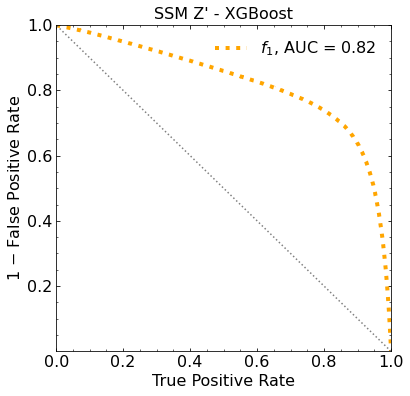


 ########################################

ML iteration  1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68335	validation_1-logloss:0.68353
[1]	validation_0-logloss:0.67534	validation_1-logloss:0.67572
[2]	validation_0-logloss:0.66810	validation_1-logloss:0.66866
[3]	validation_0-logloss:0.66358	validation_1-logloss:0.66437
[4]	validation_0-logloss:0.65987	validation_1-logloss:0.66063
[5]	validation_0-logloss:0.65659	validation_1-logloss:0.65752
[6]	validation_0-logloss:0.65368	validation_1-logloss:0.65461
[7]	validation_0-logloss:0.65073	validation_1-logloss:0.65180
[8]	validation_0-logloss:0.64871	validation_1-logloss:0.64993
[9]	validation_0-logloss:0.64706	validation_1-logloss:0.64829
[10]	validation_0-logloss:0.64494	validation_1-logloss:0.64626
[11]	validation_0-logloss:0.64333	validation_1-logloss:0.64477
[12]	validation_0-logloss:0.64161	validation_1-logloss:0.64314
[13]	validation_0-logloss:0.64036	validation_1-logloss:0.64197
[14]	validation_0-logloss:0.63885	validation_1-logloss:0.64057
[15]	validation_0-logloss:0.63799	validation_1-logloss:0.63973
[1

[130]	validation_0-logloss:0.56126	validation_1-logloss:0.56840
[131]	validation_0-logloss:0.56069	validation_1-logloss:0.56785
[132]	validation_0-logloss:0.56001	validation_1-logloss:0.56724
[133]	validation_0-logloss:0.55982	validation_1-logloss:0.56706
[134]	validation_0-logloss:0.55965	validation_1-logloss:0.56692
[135]	validation_0-logloss:0.55941	validation_1-logloss:0.56670
[136]	validation_0-logloss:0.55925	validation_1-logloss:0.56654
[137]	validation_0-logloss:0.55895	validation_1-logloss:0.56627
[138]	validation_0-logloss:0.55869	validation_1-logloss:0.56607
[139]	validation_0-logloss:0.55842	validation_1-logloss:0.56586
[140]	validation_0-logloss:0.55795	validation_1-logloss:0.56543
[141]	validation_0-logloss:0.55777	validation_1-logloss:0.56527
[142]	validation_0-logloss:0.55758	validation_1-logloss:0.56510
[143]	validation_0-logloss:0.55722	validation_1-logloss:0.56477
[144]	validation_0-logloss:0.55688	validation_1-logloss:0.56447
[145]	validation_0-logloss:0.55658	valid

[259]	validation_0-logloss:0.53143	validation_1-logloss:0.54239
[260]	validation_0-logloss:0.53135	validation_1-logloss:0.54235
[261]	validation_0-logloss:0.53126	validation_1-logloss:0.54229
[262]	validation_0-logloss:0.53119	validation_1-logloss:0.54224
[263]	validation_0-logloss:0.53113	validation_1-logloss:0.54218
[264]	validation_0-logloss:0.53072	validation_1-logloss:0.54182
[265]	validation_0-logloss:0.53056	validation_1-logloss:0.54168
[266]	validation_0-logloss:0.53048	validation_1-logloss:0.54164
[267]	validation_0-logloss:0.53042	validation_1-logloss:0.54159
[268]	validation_0-logloss:0.53036	validation_1-logloss:0.54155
[269]	validation_0-logloss:0.53028	validation_1-logloss:0.54150
[270]	validation_0-logloss:0.53024	validation_1-logloss:0.54149
[271]	validation_0-logloss:0.53019	validation_1-logloss:0.54147
[272]	validation_0-logloss:0.52980	validation_1-logloss:0.54111
[273]	validation_0-logloss:0.52954	validation_1-logloss:0.54091
[274]	validation_0-logloss:0.52899	valid

[388]	validation_0-logloss:0.51687	validation_1-logloss:0.53104
[389]	validation_0-logloss:0.51683	validation_1-logloss:0.53103
[390]	validation_0-logloss:0.51669	validation_1-logloss:0.53091
[391]	validation_0-logloss:0.51664	validation_1-logloss:0.53089
[392]	validation_0-logloss:0.51659	validation_1-logloss:0.53086
[393]	validation_0-logloss:0.51639	validation_1-logloss:0.53068
[394]	validation_0-logloss:0.51615	validation_1-logloss:0.53048
[395]	validation_0-logloss:0.51602	validation_1-logloss:0.53037
[396]	validation_0-logloss:0.51597	validation_1-logloss:0.53033
[397]	validation_0-logloss:0.51594	validation_1-logloss:0.53033
[398]	validation_0-logloss:0.51592	validation_1-logloss:0.53033
[399]	validation_0-logloss:0.51590	validation_1-logloss:0.53033
[400]	validation_0-logloss:0.51581	validation_1-logloss:0.53025
[401]	validation_0-logloss:0.51578	validation_1-logloss:0.53025
[402]	validation_0-logloss:0.51568	validation_1-logloss:0.53017
[403]	validation_0-logloss:0.51565	valid

[517]	validation_0-logloss:0.50798	validation_1-logloss:0.52522
[518]	validation_0-logloss:0.50798	validation_1-logloss:0.52522
[519]	validation_0-logloss:0.50762	validation_1-logloss:0.52492
[520]	validation_0-logloss:0.50756	validation_1-logloss:0.52488
[521]	validation_0-logloss:0.50745	validation_1-logloss:0.52482
[522]	validation_0-logloss:0.50739	validation_1-logloss:0.52478
[523]	validation_0-logloss:0.50733	validation_1-logloss:0.52476
[524]	validation_0-logloss:0.50730	validation_1-logloss:0.52476
[525]	validation_0-logloss:0.50725	validation_1-logloss:0.52473
[526]	validation_0-logloss:0.50723	validation_1-logloss:0.52473
[527]	validation_0-logloss:0.50722	validation_1-logloss:0.52473
[528]	validation_0-logloss:0.50715	validation_1-logloss:0.52469
[529]	validation_0-logloss:0.50711	validation_1-logloss:0.52467
[530]	validation_0-logloss:0.50707	validation_1-logloss:0.52466
[531]	validation_0-logloss:0.50691	validation_1-logloss:0.52453
[532]	validation_0-logloss:0.50688	valid

[646]	validation_0-logloss:0.49876	validation_1-logloss:0.51907
[647]	validation_0-logloss:0.49849	validation_1-logloss:0.51884
[648]	validation_0-logloss:0.49843	validation_1-logloss:0.51879
[649]	validation_0-logloss:0.49840	validation_1-logloss:0.51879
[650]	validation_0-logloss:0.49838	validation_1-logloss:0.51879
[651]	validation_0-logloss:0.49836	validation_1-logloss:0.51879
[652]	validation_0-logloss:0.49832	validation_1-logloss:0.51877
[653]	validation_0-logloss:0.49830	validation_1-logloss:0.51877
[654]	validation_0-logloss:0.49809	validation_1-logloss:0.51861
[655]	validation_0-logloss:0.49804	validation_1-logloss:0.51860
[656]	validation_0-logloss:0.49803	validation_1-logloss:0.51860
[657]	validation_0-logloss:0.49802	validation_1-logloss:0.51860
[658]	validation_0-logloss:0.49778	validation_1-logloss:0.51841
[659]	validation_0-logloss:0.49770	validation_1-logloss:0.51837
[660]	validation_0-logloss:0.49766	validation_1-logloss:0.51836
[661]	validation_0-logloss:0.49756	valid

[775]	validation_0-logloss:0.49098	validation_1-logloss:0.51442
[776]	validation_0-logloss:0.49096	validation_1-logloss:0.51443
[777]	validation_0-logloss:0.49078	validation_1-logloss:0.51429
[778]	validation_0-logloss:0.49076	validation_1-logloss:0.51430
[779]	validation_0-logloss:0.49071	validation_1-logloss:0.51427
[780]	validation_0-logloss:0.49068	validation_1-logloss:0.51427
[781]	validation_0-logloss:0.49064	validation_1-logloss:0.51426
[782]	validation_0-logloss:0.49062	validation_1-logloss:0.51427
[783]	validation_0-logloss:0.49060	validation_1-logloss:0.51427
[784]	validation_0-logloss:0.49058	validation_1-logloss:0.51427
[785]	validation_0-logloss:0.49047	validation_1-logloss:0.51418
[786]	validation_0-logloss:0.49024	validation_1-logloss:0.51399
[787]	validation_0-logloss:0.49011	validation_1-logloss:0.51390
[788]	validation_0-logloss:0.49009	validation_1-logloss:0.51391
[789]	validation_0-logloss:0.48998	validation_1-logloss:0.51384
[790]	validation_0-logloss:0.48995	valid

[904]	validation_0-logloss:0.48503	validation_1-logloss:0.51143
[905]	validation_0-logloss:0.48498	validation_1-logloss:0.51142
[906]	validation_0-logloss:0.48495	validation_1-logloss:0.51141
[907]	validation_0-logloss:0.48489	validation_1-logloss:0.51139
[908]	validation_0-logloss:0.48489	validation_1-logloss:0.51139
[909]	validation_0-logloss:0.48486	validation_1-logloss:0.51140
[910]	validation_0-logloss:0.48485	validation_1-logloss:0.51140
[911]	validation_0-logloss:0.48482	validation_1-logloss:0.51140
[912]	validation_0-logloss:0.48480	validation_1-logloss:0.51140
[913]	validation_0-logloss:0.48479	validation_1-logloss:0.51140
[914]	validation_0-logloss:0.48475	validation_1-logloss:0.51138
[915]	validation_0-logloss:0.48475	validation_1-logloss:0.51139
[916]	validation_0-logloss:0.48474	validation_1-logloss:0.51139
[917]	validation_0-logloss:0.48473	validation_1-logloss:0.51140
[918]	validation_0-logloss:0.48470	validation_1-logloss:0.51139
[919]	validation_0-logloss:0.48466	valid

[1032]	validation_0-logloss:0.48053	validation_1-logloss:0.51002
[1033]	validation_0-logloss:0.48049	validation_1-logloss:0.51001
[1034]	validation_0-logloss:0.48046	validation_1-logloss:0.51001
[1035]	validation_0-logloss:0.48045	validation_1-logloss:0.51001
[1036]	validation_0-logloss:0.48043	validation_1-logloss:0.51001
[1037]	validation_0-logloss:0.48042	validation_1-logloss:0.51001
[1038]	validation_0-logloss:0.48036	validation_1-logloss:0.50999
[1039]	validation_0-logloss:0.48035	validation_1-logloss:0.50999
[1040]	validation_0-logloss:0.48032	validation_1-logloss:0.50999
[1041]	validation_0-logloss:0.48028	validation_1-logloss:0.50999
[1042]	validation_0-logloss:0.48027	validation_1-logloss:0.50999
[1043]	validation_0-logloss:0.48023	validation_1-logloss:0.50997
[1044]	validation_0-logloss:0.48018	validation_1-logloss:0.50994
[1045]	validation_0-logloss:0.48015	validation_1-logloss:0.50994
[1046]	validation_0-logloss:0.48013	validation_1-logloss:0.50994
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.47596	validation_1-logloss:0.50848
[1160]	validation_0-logloss:0.47594	validation_1-logloss:0.50848
[1161]	validation_0-logloss:0.47590	validation_1-logloss:0.50846
[1162]	validation_0-logloss:0.47588	validation_1-logloss:0.50847
[1163]	validation_0-logloss:0.47585	validation_1-logloss:0.50846
[1164]	validation_0-logloss:0.47582	validation_1-logloss:0.50844
[1165]	validation_0-logloss:0.47580	validation_1-logloss:0.50844
[1166]	validation_0-logloss:0.47575	validation_1-logloss:0.50840
[1167]	validation_0-logloss:0.47573	validation_1-logloss:0.50840
[1168]	validation_0-logloss:0.47571	validation_1-logloss:0.50840
[1169]	validation_0-logloss:0.47570	validation_1-logloss:0.50840
[1170]	validation_0-logloss:0.47557	validation_1-logloss:0.50828
[1171]	validation_0-logloss:0.47553	validation_1-logloss:0.50828
[1172]	validation_0-logloss:0.47546	validation_1-logloss:0.50823
[1173]	validation_0-logloss:0.47544	validation_1-logloss:0.50824
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.47202	validation_1-logloss:0.50763
[1287]	validation_0-logloss:0.47201	validation_1-logloss:0.50763
[1288]	validation_0-logloss:0.47200	validation_1-logloss:0.50763
[1289]	validation_0-logloss:0.47199	validation_1-logloss:0.50763
[1290]	validation_0-logloss:0.47196	validation_1-logloss:0.50762
[1291]	validation_0-logloss:0.47190	validation_1-logloss:0.50759
[1292]	validation_0-logloss:0.47187	validation_1-logloss:0.50758
[1293]	validation_0-logloss:0.47183	validation_1-logloss:0.50757
[1294]	validation_0-logloss:0.47181	validation_1-logloss:0.50757
[1295]	validation_0-logloss:0.47179	validation_1-logloss:0.50758
[1296]	validation_0-logloss:0.47175	validation_1-logloss:0.50757
[1297]	validation_0-logloss:0.47173	validation_1-logloss:0.50757
[1298]	validation_0-logloss:0.47166	validation_1-logloss:0.50753
[1299]	validation_0-logloss:0.47164	validation_1-logloss:0.50753
[1300]	validation_0-logloss:0.47162	validation_1-logloss:0.50753
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.46853	validation_1-logloss:0.50696
[1414]	validation_0-logloss:0.46852	validation_1-logloss:0.50696
[1415]	validation_0-logloss:0.46851	validation_1-logloss:0.50697
[1416]	validation_0-logloss:0.46847	validation_1-logloss:0.50694
[1417]	validation_0-logloss:0.46844	validation_1-logloss:0.50694
[1418]	validation_0-logloss:0.46841	validation_1-logloss:0.50694
[1419]	validation_0-logloss:0.46840	validation_1-logloss:0.50694
[1420]	validation_0-logloss:0.46839	validation_1-logloss:0.50695
[1421]	validation_0-logloss:0.46836	validation_1-logloss:0.50694
[1422]	validation_0-logloss:0.46834	validation_1-logloss:0.50694
[1423]	validation_0-logloss:0.46833	validation_1-logloss:0.50695
[1424]	validation_0-logloss:0.46831	validation_1-logloss:0.50695
[1425]	validation_0-logloss:0.46829	validation_1-logloss:0.50695
[1426]	validation_0-logloss:0.46827	validation_1-logloss:0.50695
[1427]	validation_0-logloss:0.46824	validation_1-logloss:0.50696
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.46452	validation_1-logloss:0.50596
[1541]	validation_0-logloss:0.46449	validation_1-logloss:0.50595
[1542]	validation_0-logloss:0.46446	validation_1-logloss:0.50596
[1543]	validation_0-logloss:0.46436	validation_1-logloss:0.50589
[1544]	validation_0-logloss:0.46434	validation_1-logloss:0.50589
[1545]	validation_0-logloss:0.46433	validation_1-logloss:0.50589
[1546]	validation_0-logloss:0.46431	validation_1-logloss:0.50589
[1547]	validation_0-logloss:0.46425	validation_1-logloss:0.50585
[1548]	validation_0-logloss:0.46421	validation_1-logloss:0.50583
[1549]	validation_0-logloss:0.46419	validation_1-logloss:0.50584
[1550]	validation_0-logloss:0.46415	validation_1-logloss:0.50582
[1551]	validation_0-logloss:0.46413	validation_1-logloss:0.50581
[1552]	validation_0-logloss:0.46411	validation_1-logloss:0.50582
[1553]	validation_0-logloss:0.46406	validation_1-logloss:0.50580
[1554]	validation_0-logloss:0.46405	validation_1-logloss:0.50580
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.46112	validation_1-logloss:0.50517
[1668]	validation_0-logloss:0.46110	validation_1-logloss:0.50518
[1669]	validation_0-logloss:0.46106	validation_1-logloss:0.50517
[1670]	validation_0-logloss:0.46102	validation_1-logloss:0.50516
[1671]	validation_0-logloss:0.46099	validation_1-logloss:0.50515
[1672]	validation_0-logloss:0.46097	validation_1-logloss:0.50514
[1673]	validation_0-logloss:0.46094	validation_1-logloss:0.50514
[1674]	validation_0-logloss:0.46093	validation_1-logloss:0.50514
[1675]	validation_0-logloss:0.46091	validation_1-logloss:0.50514
[1676]	validation_0-logloss:0.46087	validation_1-logloss:0.50514
[1677]	validation_0-logloss:0.46086	validation_1-logloss:0.50514
[1678]	validation_0-logloss:0.46084	validation_1-logloss:0.50514
[1679]	validation_0-logloss:0.46080	validation_1-logloss:0.50513
[1680]	validation_0-logloss:0.46078	validation_1-logloss:0.50513
[1681]	validation_0-logloss:0.46076	validation_1-logloss:0.50514
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.45762	validation_1-logloss:0.50448
[1795]	validation_0-logloss:0.45759	validation_1-logloss:0.50448
[1796]	validation_0-logloss:0.45757	validation_1-logloss:0.50449
[1797]	validation_0-logloss:0.45755	validation_1-logloss:0.50449
[1798]	validation_0-logloss:0.45755	validation_1-logloss:0.50450
[1799]	validation_0-logloss:0.45753	validation_1-logloss:0.50450
[1800]	validation_0-logloss:0.45750	validation_1-logloss:0.50451
[1801]	validation_0-logloss:0.45749	validation_1-logloss:0.50451
[1802]	validation_0-logloss:0.45747	validation_1-logloss:0.50452
[1803]	validation_0-logloss:0.45742	validation_1-logloss:0.50452
[1804]	validation_0-logloss:0.45740	validation_1-logloss:0.50452
[1805]	validation_0-logloss:0.45737	validation_1-logloss:0.50452
[1806]	validation_0-logloss:0.45736	validation_1-logloss:0.50452
[1807]	validation_0-logloss:0.45732	validation_1-logloss:0.50451
[1808]	validation_0-logloss:0.45729	validation_1-logloss:0.50452
[1809]	validation_0-loglo

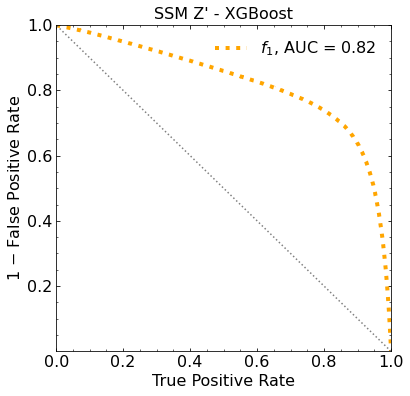


 ########################################

ML iteration  2


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68357	validation_1-logloss:0.68376
[1]	validation_0-logloss:0.67520	validation_1-logloss:0.67555
[2]	validation_0-logloss:0.66801	validation_1-logloss:0.66862
[3]	validation_0-logloss:0.66255	validation_1-logloss:0.66337
[4]	validation_0-logloss:0.65883	validation_1-logloss:0.65970
[5]	validation_0-logloss:0.65541	validation_1-logloss:0.65636
[6]	validation_0-logloss:0.65265	validation_1-logloss:0.65374
[7]	validation_0-logloss:0.65008	validation_1-logloss:0.65122
[8]	validation_0-logloss:0.64749	validation_1-logloss:0.64876
[9]	validation_0-logloss:0.64549	validation_1-logloss:0.64678
[10]	validation_0-logloss:0.64328	validation_1-logloss:0.64471
[11]	validation_0-logloss:0.64041	validation_1-logloss:0.64199
[12]	validation_0-logloss:0.63895	validation_1-logloss:0.64064
[13]	validation_0-logloss:0.63661	validation_1-logloss:0.63835
[14]	validation_0-logloss:0.63561	validation_1-logloss:0.63740
[15]	validation_0-logloss:0.63415	validation_1-logloss:0.63605
[1

[130]	validation_0-logloss:0.56261	validation_1-logloss:0.57020
[131]	validation_0-logloss:0.56239	validation_1-logloss:0.57001
[132]	validation_0-logloss:0.56197	validation_1-logloss:0.56963
[133]	validation_0-logloss:0.56170	validation_1-logloss:0.56939
[134]	validation_0-logloss:0.56095	validation_1-logloss:0.56866
[135]	validation_0-logloss:0.56064	validation_1-logloss:0.56839
[136]	validation_0-logloss:0.56037	validation_1-logloss:0.56815
[137]	validation_0-logloss:0.56016	validation_1-logloss:0.56795
[138]	validation_0-logloss:0.56000	validation_1-logloss:0.56782
[139]	validation_0-logloss:0.55964	validation_1-logloss:0.56748
[140]	validation_0-logloss:0.55931	validation_1-logloss:0.56722
[141]	validation_0-logloss:0.55885	validation_1-logloss:0.56682
[142]	validation_0-logloss:0.55872	validation_1-logloss:0.56672
[143]	validation_0-logloss:0.55839	validation_1-logloss:0.56644
[144]	validation_0-logloss:0.55807	validation_1-logloss:0.56615
[145]	validation_0-logloss:0.55779	valid

[259]	validation_0-logloss:0.53050	validation_1-logloss:0.54203
[260]	validation_0-logloss:0.53040	validation_1-logloss:0.54198
[261]	validation_0-logloss:0.53034	validation_1-logloss:0.54195
[262]	validation_0-logloss:0.53018	validation_1-logloss:0.54179
[263]	validation_0-logloss:0.52969	validation_1-logloss:0.54138
[264]	validation_0-logloss:0.52961	validation_1-logloss:0.54132
[265]	validation_0-logloss:0.52951	validation_1-logloss:0.54125
[266]	validation_0-logloss:0.52923	validation_1-logloss:0.54101
[267]	validation_0-logloss:0.52903	validation_1-logloss:0.54081
[268]	validation_0-logloss:0.52891	validation_1-logloss:0.54072
[269]	validation_0-logloss:0.52882	validation_1-logloss:0.54068
[270]	validation_0-logloss:0.52873	validation_1-logloss:0.54062
[271]	validation_0-logloss:0.52861	validation_1-logloss:0.54052
[272]	validation_0-logloss:0.52857	validation_1-logloss:0.54050
[273]	validation_0-logloss:0.52847	validation_1-logloss:0.54044
[274]	validation_0-logloss:0.52835	valid

[388]	validation_0-logloss:0.51687	validation_1-logloss:0.53180
[389]	validation_0-logloss:0.51682	validation_1-logloss:0.53178
[390]	validation_0-logloss:0.51680	validation_1-logloss:0.53177
[391]	validation_0-logloss:0.51670	validation_1-logloss:0.53170
[392]	validation_0-logloss:0.51667	validation_1-logloss:0.53170
[393]	validation_0-logloss:0.51664	validation_1-logloss:0.53171
[394]	validation_0-logloss:0.51662	validation_1-logloss:0.53170
[395]	validation_0-logloss:0.51661	validation_1-logloss:0.53170
[396]	validation_0-logloss:0.51634	validation_1-logloss:0.53144
[397]	validation_0-logloss:0.51583	validation_1-logloss:0.53098
[398]	validation_0-logloss:0.51578	validation_1-logloss:0.53095
[399]	validation_0-logloss:0.51558	validation_1-logloss:0.53078
[400]	validation_0-logloss:0.51551	validation_1-logloss:0.53073
[401]	validation_0-logloss:0.51548	validation_1-logloss:0.53073
[402]	validation_0-logloss:0.51538	validation_1-logloss:0.53066
[403]	validation_0-logloss:0.51533	valid

[517]	validation_0-logloss:0.50637	validation_1-logloss:0.52423
[518]	validation_0-logloss:0.50633	validation_1-logloss:0.52422
[519]	validation_0-logloss:0.50631	validation_1-logloss:0.52422
[520]	validation_0-logloss:0.50613	validation_1-logloss:0.52404
[521]	validation_0-logloss:0.50609	validation_1-logloss:0.52404
[522]	validation_0-logloss:0.50608	validation_1-logloss:0.52404
[523]	validation_0-logloss:0.50597	validation_1-logloss:0.52397
[524]	validation_0-logloss:0.50595	validation_1-logloss:0.52397
[525]	validation_0-logloss:0.50589	validation_1-logloss:0.52392
[526]	validation_0-logloss:0.50574	validation_1-logloss:0.52380
[527]	validation_0-logloss:0.50534	validation_1-logloss:0.52343
[528]	validation_0-logloss:0.50532	validation_1-logloss:0.52343
[529]	validation_0-logloss:0.50529	validation_1-logloss:0.52342
[530]	validation_0-logloss:0.50527	validation_1-logloss:0.52342
[531]	validation_0-logloss:0.50525	validation_1-logloss:0.52342
[532]	validation_0-logloss:0.50523	valid

[646]	validation_0-logloss:0.49699	validation_1-logloss:0.51787
[647]	validation_0-logloss:0.49693	validation_1-logloss:0.51784
[648]	validation_0-logloss:0.49691	validation_1-logloss:0.51784
[649]	validation_0-logloss:0.49681	validation_1-logloss:0.51776
[650]	validation_0-logloss:0.49680	validation_1-logloss:0.51777
[651]	validation_0-logloss:0.49677	validation_1-logloss:0.51776
[652]	validation_0-logloss:0.49671	validation_1-logloss:0.51773
[653]	validation_0-logloss:0.49649	validation_1-logloss:0.51755
[654]	validation_0-logloss:0.49646	validation_1-logloss:0.51755
[655]	validation_0-logloss:0.49643	validation_1-logloss:0.51754
[656]	validation_0-logloss:0.49640	validation_1-logloss:0.51754
[657]	validation_0-logloss:0.49636	validation_1-logloss:0.51755
[658]	validation_0-logloss:0.49634	validation_1-logloss:0.51754
[659]	validation_0-logloss:0.49615	validation_1-logloss:0.51737
[660]	validation_0-logloss:0.49612	validation_1-logloss:0.51736
[661]	validation_0-logloss:0.49611	valid

[775]	validation_0-logloss:0.49068	validation_1-logloss:0.51457
[776]	validation_0-logloss:0.49053	validation_1-logloss:0.51445
[777]	validation_0-logloss:0.49050	validation_1-logloss:0.51445
[778]	validation_0-logloss:0.49049	validation_1-logloss:0.51445
[779]	validation_0-logloss:0.49048	validation_1-logloss:0.51445
[780]	validation_0-logloss:0.49043	validation_1-logloss:0.51442
[781]	validation_0-logloss:0.49042	validation_1-logloss:0.51442
[782]	validation_0-logloss:0.49041	validation_1-logloss:0.51442
[783]	validation_0-logloss:0.49041	validation_1-logloss:0.51442
[784]	validation_0-logloss:0.49040	validation_1-logloss:0.51442
[785]	validation_0-logloss:0.49038	validation_1-logloss:0.51443
[786]	validation_0-logloss:0.49037	validation_1-logloss:0.51443
[787]	validation_0-logloss:0.49033	validation_1-logloss:0.51443
[788]	validation_0-logloss:0.49025	validation_1-logloss:0.51439
[789]	validation_0-logloss:0.49022	validation_1-logloss:0.51438
[790]	validation_0-logloss:0.49020	valid

[904]	validation_0-logloss:0.48514	validation_1-logloss:0.51198
[905]	validation_0-logloss:0.48512	validation_1-logloss:0.51199
[906]	validation_0-logloss:0.48510	validation_1-logloss:0.51199
[907]	validation_0-logloss:0.48508	validation_1-logloss:0.51199
[908]	validation_0-logloss:0.48505	validation_1-logloss:0.51199
[909]	validation_0-logloss:0.48503	validation_1-logloss:0.51199
[910]	validation_0-logloss:0.48492	validation_1-logloss:0.51192
[911]	validation_0-logloss:0.48491	validation_1-logloss:0.51192
[912]	validation_0-logloss:0.48488	validation_1-logloss:0.51192
[913]	validation_0-logloss:0.48485	validation_1-logloss:0.51193
[914]	validation_0-logloss:0.48482	validation_1-logloss:0.51191
[915]	validation_0-logloss:0.48478	validation_1-logloss:0.51189
[916]	validation_0-logloss:0.48476	validation_1-logloss:0.51189
[917]	validation_0-logloss:0.48474	validation_1-logloss:0.51189
[918]	validation_0-logloss:0.48470	validation_1-logloss:0.51187
[919]	validation_0-logloss:0.48468	valid

[1032]	validation_0-logloss:0.48033	validation_1-logloss:0.51004
[1033]	validation_0-logloss:0.48031	validation_1-logloss:0.51004
[1034]	validation_0-logloss:0.48029	validation_1-logloss:0.51004
[1035]	validation_0-logloss:0.48027	validation_1-logloss:0.51004
[1036]	validation_0-logloss:0.48026	validation_1-logloss:0.51004
[1037]	validation_0-logloss:0.48021	validation_1-logloss:0.51003
[1038]	validation_0-logloss:0.48018	validation_1-logloss:0.51002
[1039]	validation_0-logloss:0.48016	validation_1-logloss:0.51002
[1040]	validation_0-logloss:0.48008	validation_1-logloss:0.50998
[1041]	validation_0-logloss:0.47998	validation_1-logloss:0.50990
[1042]	validation_0-logloss:0.47995	validation_1-logloss:0.50990
[1043]	validation_0-logloss:0.47992	validation_1-logloss:0.50991
[1044]	validation_0-logloss:0.47989	validation_1-logloss:0.50990
[1045]	validation_0-logloss:0.47987	validation_1-logloss:0.50990
[1046]	validation_0-logloss:0.47985	validation_1-logloss:0.50990
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.47533	validation_1-logloss:0.50816
[1160]	validation_0-logloss:0.47530	validation_1-logloss:0.50816
[1161]	validation_0-logloss:0.47527	validation_1-logloss:0.50815
[1162]	validation_0-logloss:0.47525	validation_1-logloss:0.50815
[1163]	validation_0-logloss:0.47522	validation_1-logloss:0.50814
[1164]	validation_0-logloss:0.47520	validation_1-logloss:0.50814
[1165]	validation_0-logloss:0.47519	validation_1-logloss:0.50814
[1166]	validation_0-logloss:0.47517	validation_1-logloss:0.50813
[1167]	validation_0-logloss:0.47515	validation_1-logloss:0.50813
[1168]	validation_0-logloss:0.47513	validation_1-logloss:0.50814
[1169]	validation_0-logloss:0.47511	validation_1-logloss:0.50813
[1170]	validation_0-logloss:0.47506	validation_1-logloss:0.50811
[1171]	validation_0-logloss:0.47503	validation_1-logloss:0.50811
[1172]	validation_0-logloss:0.47501	validation_1-logloss:0.50812
[1173]	validation_0-logloss:0.47499	validation_1-logloss:0.50811
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.47149	validation_1-logloss:0.50730
[1287]	validation_0-logloss:0.47146	validation_1-logloss:0.50731
[1288]	validation_0-logloss:0.47144	validation_1-logloss:0.50731
[1289]	validation_0-logloss:0.47142	validation_1-logloss:0.50731
[1290]	validation_0-logloss:0.47139	validation_1-logloss:0.50730
[1291]	validation_0-logloss:0.47138	validation_1-logloss:0.50731
[1292]	validation_0-logloss:0.47134	validation_1-logloss:0.50731
[1293]	validation_0-logloss:0.47134	validation_1-logloss:0.50731
[1294]	validation_0-logloss:0.47132	validation_1-logloss:0.50731
[1295]	validation_0-logloss:0.47130	validation_1-logloss:0.50732
[1296]	validation_0-logloss:0.47128	validation_1-logloss:0.50732
[1297]	validation_0-logloss:0.47125	validation_1-logloss:0.50731
[1298]	validation_0-logloss:0.47122	validation_1-logloss:0.50732
[1299]	validation_0-logloss:0.47118	validation_1-logloss:0.50729
[1300]	validation_0-logloss:0.47113	validation_1-logloss:0.50727
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.46760	validation_1-logloss:0.50640
[1414]	validation_0-logloss:0.46757	validation_1-logloss:0.50639
[1415]	validation_0-logloss:0.46756	validation_1-logloss:0.50639
[1416]	validation_0-logloss:0.46748	validation_1-logloss:0.50633
[1417]	validation_0-logloss:0.46746	validation_1-logloss:0.50634
[1418]	validation_0-logloss:0.46743	validation_1-logloss:0.50633
[1419]	validation_0-logloss:0.46736	validation_1-logloss:0.50628
[1420]	validation_0-logloss:0.46733	validation_1-logloss:0.50629
[1421]	validation_0-logloss:0.46726	validation_1-logloss:0.50625
[1422]	validation_0-logloss:0.46725	validation_1-logloss:0.50625
[1423]	validation_0-logloss:0.46723	validation_1-logloss:0.50625
[1424]	validation_0-logloss:0.46720	validation_1-logloss:0.50625
[1425]	validation_0-logloss:0.46719	validation_1-logloss:0.50625
[1426]	validation_0-logloss:0.46715	validation_1-logloss:0.50623
[1427]	validation_0-logloss:0.46714	validation_1-logloss:0.50624
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.46377	validation_1-logloss:0.50566
[1541]	validation_0-logloss:0.46373	validation_1-logloss:0.50565
[1542]	validation_0-logloss:0.46370	validation_1-logloss:0.50564
[1543]	validation_0-logloss:0.46367	validation_1-logloss:0.50564
[1544]	validation_0-logloss:0.46363	validation_1-logloss:0.50563
[1545]	validation_0-logloss:0.46360	validation_1-logloss:0.50563
[1546]	validation_0-logloss:0.46359	validation_1-logloss:0.50563
[1547]	validation_0-logloss:0.46356	validation_1-logloss:0.50563
[1548]	validation_0-logloss:0.46354	validation_1-logloss:0.50563
[1549]	validation_0-logloss:0.46353	validation_1-logloss:0.50563
[1550]	validation_0-logloss:0.46351	validation_1-logloss:0.50563
[1551]	validation_0-logloss:0.46349	validation_1-logloss:0.50564
[1552]	validation_0-logloss:0.46346	validation_1-logloss:0.50564
[1553]	validation_0-logloss:0.46344	validation_1-logloss:0.50564
[1554]	validation_0-logloss:0.46340	validation_1-logloss:0.50563
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.46054	validation_1-logloss:0.50535
[1668]	validation_0-logloss:0.46050	validation_1-logloss:0.50534
[1669]	validation_0-logloss:0.46048	validation_1-logloss:0.50533
[1670]	validation_0-logloss:0.46045	validation_1-logloss:0.50534
[1671]	validation_0-logloss:0.46042	validation_1-logloss:0.50534
[1672]	validation_0-logloss:0.46040	validation_1-logloss:0.50534
[1673]	validation_0-logloss:0.46036	validation_1-logloss:0.50535
[1674]	validation_0-logloss:0.46032	validation_1-logloss:0.50535
[1675]	validation_0-logloss:0.46031	validation_1-logloss:0.50535
[1676]	validation_0-logloss:0.46026	validation_1-logloss:0.50533
[1677]	validation_0-logloss:0.46022	validation_1-logloss:0.50532
[1678]	validation_0-logloss:0.46019	validation_1-logloss:0.50532
[1679]	validation_0-logloss:0.46016	validation_1-logloss:0.50531
[1680]	validation_0-logloss:0.46013	validation_1-logloss:0.50530
[1681]	validation_0-logloss:0.46010	validation_1-logloss:0.50530
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.45723	validation_1-logloss:0.50498
[1795]	validation_0-logloss:0.45716	validation_1-logloss:0.50494
[1796]	validation_0-logloss:0.45714	validation_1-logloss:0.50495
[1797]	validation_0-logloss:0.45711	validation_1-logloss:0.50494
[1798]	validation_0-logloss:0.45707	validation_1-logloss:0.50492
[1799]	validation_0-logloss:0.45702	validation_1-logloss:0.50489
[1800]	validation_0-logloss:0.45699	validation_1-logloss:0.50489
[1801]	validation_0-logloss:0.45698	validation_1-logloss:0.50490
[1802]	validation_0-logloss:0.45693	validation_1-logloss:0.50488
[1803]	validation_0-logloss:0.45690	validation_1-logloss:0.50487
[1804]	validation_0-logloss:0.45688	validation_1-logloss:0.50487
[1805]	validation_0-logloss:0.45686	validation_1-logloss:0.50487
[1806]	validation_0-logloss:0.45682	validation_1-logloss:0.50487
[1807]	validation_0-logloss:0.45680	validation_1-logloss:0.50487
[1808]	validation_0-logloss:0.45677	validation_1-logloss:0.50486
[1809]	validation_0-loglo

[1921]	validation_0-logloss:0.45399	validation_1-logloss:0.50450
[1922]	validation_0-logloss:0.45398	validation_1-logloss:0.50451
[1923]	validation_0-logloss:0.45398	validation_1-logloss:0.50451
[1924]	validation_0-logloss:0.45395	validation_1-logloss:0.50450
[1925]	validation_0-logloss:0.45392	validation_1-logloss:0.50449
[1926]	validation_0-logloss:0.45388	validation_1-logloss:0.50448
[1927]	validation_0-logloss:0.45384	validation_1-logloss:0.50447
[1928]	validation_0-logloss:0.45380	validation_1-logloss:0.50445
[1929]	validation_0-logloss:0.45377	validation_1-logloss:0.50445
[1930]	validation_0-logloss:0.45374	validation_1-logloss:0.50445
[1931]	validation_0-logloss:0.45371	validation_1-logloss:0.50444
[1932]	validation_0-logloss:0.45369	validation_1-logloss:0.50443
[1933]	validation_0-logloss:0.45366	validation_1-logloss:0.50442
[1934]	validation_0-logloss:0.45364	validation_1-logloss:0.50442
[1935]	validation_0-logloss:0.45363	validation_1-logloss:0.50442
[1936]	validation_0-loglo

[2048]	validation_0-logloss:0.45120	validation_1-logloss:0.50433
[2049]	validation_0-logloss:0.45115	validation_1-logloss:0.50431
[2050]	validation_0-logloss:0.45113	validation_1-logloss:0.50431
[2051]	validation_0-logloss:0.45110	validation_1-logloss:0.50430
[2052]	validation_0-logloss:0.45109	validation_1-logloss:0.50431
[2053]	validation_0-logloss:0.45105	validation_1-logloss:0.50431
[2054]	validation_0-logloss:0.45104	validation_1-logloss:0.50431
[2055]	validation_0-logloss:0.45102	validation_1-logloss:0.50431
[2056]	validation_0-logloss:0.45099	validation_1-logloss:0.50432
[2057]	validation_0-logloss:0.45095	validation_1-logloss:0.50431
[2058]	validation_0-logloss:0.45092	validation_1-logloss:0.50430
[2059]	validation_0-logloss:0.45090	validation_1-logloss:0.50431
[2060]	validation_0-logloss:0.45089	validation_1-logloss:0.50431
[2061]	validation_0-logloss:0.45082	validation_1-logloss:0.50427
[2062]	validation_0-logloss:0.45081	validation_1-logloss:0.50427
[2063]	validation_0-loglo

[2175]	validation_0-logloss:0.44830	validation_1-logloss:0.50399
[2176]	validation_0-logloss:0.44830	validation_1-logloss:0.50399
[2177]	validation_0-logloss:0.44827	validation_1-logloss:0.50400
[2178]	validation_0-logloss:0.44824	validation_1-logloss:0.50400
[2179]	validation_0-logloss:0.44821	validation_1-logloss:0.50399
[2180]	validation_0-logloss:0.44817	validation_1-logloss:0.50397
[2181]	validation_0-logloss:0.44815	validation_1-logloss:0.50398
[2182]	validation_0-logloss:0.44810	validation_1-logloss:0.50395
[2183]	validation_0-logloss:0.44808	validation_1-logloss:0.50396
[2184]	validation_0-logloss:0.44807	validation_1-logloss:0.50397
[2185]	validation_0-logloss:0.44806	validation_1-logloss:0.50397
[2186]	validation_0-logloss:0.44804	validation_1-logloss:0.50397
[2187]	validation_0-logloss:0.44801	validation_1-logloss:0.50397
[2188]	validation_0-logloss:0.44801	validation_1-logloss:0.50397
[2189]	validation_0-logloss:0.44800	validation_1-logloss:0.50397
[2190]	validation_0-loglo

[2302]	validation_0-logloss:0.44539	validation_1-logloss:0.50366
[2303]	validation_0-logloss:0.44538	validation_1-logloss:0.50366
[2304]	validation_0-logloss:0.44537	validation_1-logloss:0.50366
[2305]	validation_0-logloss:0.44535	validation_1-logloss:0.50367
[2306]	validation_0-logloss:0.44527	validation_1-logloss:0.50361
[2307]	validation_0-logloss:0.44523	validation_1-logloss:0.50361
[2308]	validation_0-logloss:0.44521	validation_1-logloss:0.50362
[2309]	validation_0-logloss:0.44517	validation_1-logloss:0.50361
[2310]	validation_0-logloss:0.44516	validation_1-logloss:0.50361
[2311]	validation_0-logloss:0.44514	validation_1-logloss:0.50361
[2312]	validation_0-logloss:0.44512	validation_1-logloss:0.50361
[2313]	validation_0-logloss:0.44509	validation_1-logloss:0.50362
[2314]	validation_0-logloss:0.44507	validation_1-logloss:0.50360
[2315]	validation_0-logloss:0.44505	validation_1-logloss:0.50361
[2316]	validation_0-logloss:0.44503	validation_1-logloss:0.50361
[2317]	validation_0-loglo

[2429]	validation_0-logloss:0.44240	validation_1-logloss:0.50338
[2430]	validation_0-logloss:0.44236	validation_1-logloss:0.50338
[2431]	validation_0-logloss:0.44235	validation_1-logloss:0.50338
[2432]	validation_0-logloss:0.44232	validation_1-logloss:0.50337
[2433]	validation_0-logloss:0.44232	validation_1-logloss:0.50337
[2434]	validation_0-logloss:0.44229	validation_1-logloss:0.50337
[2435]	validation_0-logloss:0.44226	validation_1-logloss:0.50337
[2436]	validation_0-logloss:0.44224	validation_1-logloss:0.50338
[2437]	validation_0-logloss:0.44223	validation_1-logloss:0.50338
[2438]	validation_0-logloss:0.44221	validation_1-logloss:0.50338
[2439]	validation_0-logloss:0.44219	validation_1-logloss:0.50339
[2440]	validation_0-logloss:0.44217	validation_1-logloss:0.50339
[2441]	validation_0-logloss:0.44214	validation_1-logloss:0.50339
[2442]	validation_0-logloss:0.44210	validation_1-logloss:0.50338
[2443]	validation_0-logloss:0.44208	validation_1-logloss:0.50338
[2444]	validation_0-loglo

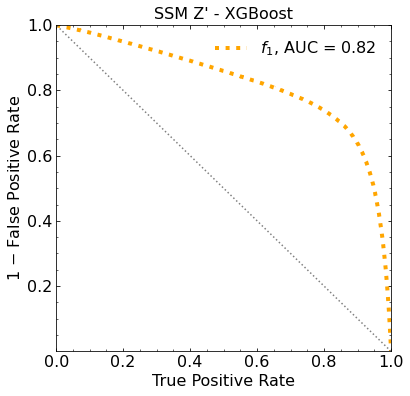


 ########################################

ML iteration  3


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68540	validation_1-logloss:0.68557
[1]	validation_0-logloss:0.67668	validation_1-logloss:0.67702
[2]	validation_0-logloss:0.67109	validation_1-logloss:0.67164
[3]	validation_0-logloss:0.66661	validation_1-logloss:0.66719
[4]	validation_0-logloss:0.66282	validation_1-logloss:0.66350
[5]	validation_0-logloss:0.65972	validation_1-logloss:0.66052
[6]	validation_0-logloss:0.65628	validation_1-logloss:0.65717
[7]	validation_0-logloss:0.65328	validation_1-logloss:0.65430
[8]	validation_0-logloss:0.65040	validation_1-logloss:0.65156
[9]	validation_0-logloss:0.64806	validation_1-logloss:0.64936
[10]	validation_0-logloss:0.64613	validation_1-logloss:0.64746
[11]	validation_0-logloss:0.64424	validation_1-logloss:0.64572
[12]	validation_0-logloss:0.64123	validation_1-logloss:0.64282
[13]	validation_0-logloss:0.63967	validation_1-logloss:0.64141
[14]	validation_0-logloss:0.63855	validation_1-logloss:0.64036
[15]	validation_0-logloss:0.63711	validation_1-logloss:0.63905
[1

[130]	validation_0-logloss:0.56189	validation_1-logloss:0.56899
[131]	validation_0-logloss:0.56137	validation_1-logloss:0.56849
[132]	validation_0-logloss:0.56089	validation_1-logloss:0.56805
[133]	validation_0-logloss:0.56020	validation_1-logloss:0.56741
[134]	validation_0-logloss:0.56005	validation_1-logloss:0.56730
[135]	validation_0-logloss:0.55991	validation_1-logloss:0.56721
[136]	validation_0-logloss:0.55973	validation_1-logloss:0.56706
[137]	validation_0-logloss:0.55952	validation_1-logloss:0.56688
[138]	validation_0-logloss:0.55925	validation_1-logloss:0.56664
[139]	validation_0-logloss:0.55900	validation_1-logloss:0.56641
[140]	validation_0-logloss:0.55853	validation_1-logloss:0.56596
[141]	validation_0-logloss:0.55818	validation_1-logloss:0.56563
[142]	validation_0-logloss:0.55802	validation_1-logloss:0.56551
[143]	validation_0-logloss:0.55769	validation_1-logloss:0.56523
[144]	validation_0-logloss:0.55749	validation_1-logloss:0.56506
[145]	validation_0-logloss:0.55727	valid

[259]	validation_0-logloss:0.53177	validation_1-logloss:0.54250
[260]	validation_0-logloss:0.53165	validation_1-logloss:0.54243
[261]	validation_0-logloss:0.53158	validation_1-logloss:0.54236
[262]	validation_0-logloss:0.53139	validation_1-logloss:0.54221
[263]	validation_0-logloss:0.53133	validation_1-logloss:0.54218
[264]	validation_0-logloss:0.53125	validation_1-logloss:0.54214
[265]	validation_0-logloss:0.53110	validation_1-logloss:0.54201
[266]	validation_0-logloss:0.53094	validation_1-logloss:0.54189
[267]	validation_0-logloss:0.53081	validation_1-logloss:0.54178
[268]	validation_0-logloss:0.53066	validation_1-logloss:0.54165
[269]	validation_0-logloss:0.53061	validation_1-logloss:0.54162
[270]	validation_0-logloss:0.53049	validation_1-logloss:0.54156
[271]	validation_0-logloss:0.53040	validation_1-logloss:0.54150
[272]	validation_0-logloss:0.53018	validation_1-logloss:0.54131
[273]	validation_0-logloss:0.53008	validation_1-logloss:0.54124
[274]	validation_0-logloss:0.52983	valid

[388]	validation_0-logloss:0.51766	validation_1-logloss:0.53195
[389]	validation_0-logloss:0.51765	validation_1-logloss:0.53195
[390]	validation_0-logloss:0.51760	validation_1-logloss:0.53193
[391]	validation_0-logloss:0.51747	validation_1-logloss:0.53184
[392]	validation_0-logloss:0.51744	validation_1-logloss:0.53184
[393]	validation_0-logloss:0.51738	validation_1-logloss:0.53180
[394]	validation_0-logloss:0.51718	validation_1-logloss:0.53164
[395]	validation_0-logloss:0.51708	validation_1-logloss:0.53156
[396]	validation_0-logloss:0.51688	validation_1-logloss:0.53139
[397]	validation_0-logloss:0.51685	validation_1-logloss:0.53138
[398]	validation_0-logloss:0.51683	validation_1-logloss:0.53138
[399]	validation_0-logloss:0.51660	validation_1-logloss:0.53119
[400]	validation_0-logloss:0.51643	validation_1-logloss:0.53108
[401]	validation_0-logloss:0.51639	validation_1-logloss:0.53107
[402]	validation_0-logloss:0.51634	validation_1-logloss:0.53104
[403]	validation_0-logloss:0.51632	valid

[517]	validation_0-logloss:0.50744	validation_1-logloss:0.52473
[518]	validation_0-logloss:0.50742	validation_1-logloss:0.52472
[519]	validation_0-logloss:0.50741	validation_1-logloss:0.52471
[520]	validation_0-logloss:0.50740	validation_1-logloss:0.52472
[521]	validation_0-logloss:0.50736	validation_1-logloss:0.52470
[522]	validation_0-logloss:0.50735	validation_1-logloss:0.52470
[523]	validation_0-logloss:0.50733	validation_1-logloss:0.52470
[524]	validation_0-logloss:0.50732	validation_1-logloss:0.52470
[525]	validation_0-logloss:0.50727	validation_1-logloss:0.52467
[526]	validation_0-logloss:0.50714	validation_1-logloss:0.52458
[527]	validation_0-logloss:0.50712	validation_1-logloss:0.52458
[528]	validation_0-logloss:0.50709	validation_1-logloss:0.52458
[529]	validation_0-logloss:0.50692	validation_1-logloss:0.52442
[530]	validation_0-logloss:0.50690	validation_1-logloss:0.52441
[531]	validation_0-logloss:0.50682	validation_1-logloss:0.52437
[532]	validation_0-logloss:0.50679	valid

[646]	validation_0-logloss:0.50063	validation_1-logloss:0.52078
[647]	validation_0-logloss:0.50062	validation_1-logloss:0.52078
[648]	validation_0-logloss:0.50060	validation_1-logloss:0.52078
[649]	validation_0-logloss:0.50058	validation_1-logloss:0.52078
[650]	validation_0-logloss:0.50042	validation_1-logloss:0.52065
[651]	validation_0-logloss:0.50040	validation_1-logloss:0.52065
[652]	validation_0-logloss:0.50030	validation_1-logloss:0.52058
[653]	validation_0-logloss:0.50028	validation_1-logloss:0.52059
[654]	validation_0-logloss:0.50026	validation_1-logloss:0.52058
[655]	validation_0-logloss:0.50024	validation_1-logloss:0.52058
[656]	validation_0-logloss:0.50021	validation_1-logloss:0.52058
[657]	validation_0-logloss:0.50010	validation_1-logloss:0.52050
[658]	validation_0-logloss:0.50008	validation_1-logloss:0.52050
[659]	validation_0-logloss:0.50006	validation_1-logloss:0.52050
[660]	validation_0-logloss:0.50003	validation_1-logloss:0.52049
[661]	validation_0-logloss:0.49965	valid

[775]	validation_0-logloss:0.49378	validation_1-logloss:0.51675
[776]	validation_0-logloss:0.49376	validation_1-logloss:0.51675
[777]	validation_0-logloss:0.49373	validation_1-logloss:0.51674
[778]	validation_0-logloss:0.49372	validation_1-logloss:0.51674
[779]	validation_0-logloss:0.49367	validation_1-logloss:0.51672
[780]	validation_0-logloss:0.49366	validation_1-logloss:0.51672
[781]	validation_0-logloss:0.49364	validation_1-logloss:0.51671
[782]	validation_0-logloss:0.49358	validation_1-logloss:0.51670
[783]	validation_0-logloss:0.49357	validation_1-logloss:0.51670
[784]	validation_0-logloss:0.49355	validation_1-logloss:0.51670
[785]	validation_0-logloss:0.49354	validation_1-logloss:0.51671
[786]	validation_0-logloss:0.49352	validation_1-logloss:0.51670
[787]	validation_0-logloss:0.49348	validation_1-logloss:0.51670
[788]	validation_0-logloss:0.49344	validation_1-logloss:0.51668
[789]	validation_0-logloss:0.49341	validation_1-logloss:0.51667
[790]	validation_0-logloss:0.49339	valid

[904]	validation_0-logloss:0.48724	validation_1-logloss:0.51300
[905]	validation_0-logloss:0.48722	validation_1-logloss:0.51299
[906]	validation_0-logloss:0.48711	validation_1-logloss:0.51290
[907]	validation_0-logloss:0.48708	validation_1-logloss:0.51289
[908]	validation_0-logloss:0.48705	validation_1-logloss:0.51289
[909]	validation_0-logloss:0.48705	validation_1-logloss:0.51289
[910]	validation_0-logloss:0.48696	validation_1-logloss:0.51282
[911]	validation_0-logloss:0.48691	validation_1-logloss:0.51282
[912]	validation_0-logloss:0.48689	validation_1-logloss:0.51281
[913]	validation_0-logloss:0.48685	validation_1-logloss:0.51281
[914]	validation_0-logloss:0.48683	validation_1-logloss:0.51280
[915]	validation_0-logloss:0.48679	validation_1-logloss:0.51281
[916]	validation_0-logloss:0.48678	validation_1-logloss:0.51281
[917]	validation_0-logloss:0.48676	validation_1-logloss:0.51282
[918]	validation_0-logloss:0.48674	validation_1-logloss:0.51282
[919]	validation_0-logloss:0.48672	valid

[1032]	validation_0-logloss:0.48263	validation_1-logloss:0.51130
[1033]	validation_0-logloss:0.48261	validation_1-logloss:0.51130
[1034]	validation_0-logloss:0.48243	validation_1-logloss:0.51116
[1035]	validation_0-logloss:0.48241	validation_1-logloss:0.51116
[1036]	validation_0-logloss:0.48240	validation_1-logloss:0.51116
[1037]	validation_0-logloss:0.48236	validation_1-logloss:0.51116
[1038]	validation_0-logloss:0.48235	validation_1-logloss:0.51117
[1039]	validation_0-logloss:0.48233	validation_1-logloss:0.51117
[1040]	validation_0-logloss:0.48227	validation_1-logloss:0.51114
[1041]	validation_0-logloss:0.48213	validation_1-logloss:0.51101
[1042]	validation_0-logloss:0.48210	validation_1-logloss:0.51102
[1043]	validation_0-logloss:0.48205	validation_1-logloss:0.51099
[1044]	validation_0-logloss:0.48204	validation_1-logloss:0.51099
[1045]	validation_0-logloss:0.48201	validation_1-logloss:0.51098
[1046]	validation_0-logloss:0.48200	validation_1-logloss:0.51098
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.47778	validation_1-logloss:0.50934
[1160]	validation_0-logloss:0.47763	validation_1-logloss:0.50922
[1161]	validation_0-logloss:0.47761	validation_1-logloss:0.50922
[1162]	validation_0-logloss:0.47759	validation_1-logloss:0.50922
[1163]	validation_0-logloss:0.47756	validation_1-logloss:0.50922
[1164]	validation_0-logloss:0.47753	validation_1-logloss:0.50922
[1165]	validation_0-logloss:0.47751	validation_1-logloss:0.50922
[1166]	validation_0-logloss:0.47742	validation_1-logloss:0.50916
[1167]	validation_0-logloss:0.47737	validation_1-logloss:0.50914
[1168]	validation_0-logloss:0.47736	validation_1-logloss:0.50914
[1169]	validation_0-logloss:0.47733	validation_1-logloss:0.50914
[1170]	validation_0-logloss:0.47731	validation_1-logloss:0.50914
[1171]	validation_0-logloss:0.47730	validation_1-logloss:0.50914
[1172]	validation_0-logloss:0.47724	validation_1-logloss:0.50909
[1173]	validation_0-logloss:0.47717	validation_1-logloss:0.50904
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.47361	validation_1-logloss:0.50808
[1287]	validation_0-logloss:0.47358	validation_1-logloss:0.50809
[1288]	validation_0-logloss:0.47357	validation_1-logloss:0.50808
[1289]	validation_0-logloss:0.47355	validation_1-logloss:0.50808
[1290]	validation_0-logloss:0.47347	validation_1-logloss:0.50803
[1291]	validation_0-logloss:0.47344	validation_1-logloss:0.50802
[1292]	validation_0-logloss:0.47341	validation_1-logloss:0.50801
[1293]	validation_0-logloss:0.47339	validation_1-logloss:0.50801
[1294]	validation_0-logloss:0.47336	validation_1-logloss:0.50800
[1295]	validation_0-logloss:0.47334	validation_1-logloss:0.50799
[1296]	validation_0-logloss:0.47330	validation_1-logloss:0.50799
[1297]	validation_0-logloss:0.47325	validation_1-logloss:0.50797
[1298]	validation_0-logloss:0.47321	validation_1-logloss:0.50794
[1299]	validation_0-logloss:0.47319	validation_1-logloss:0.50794
[1300]	validation_0-logloss:0.47316	validation_1-logloss:0.50793
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.46904	validation_1-logloss:0.50666
[1414]	validation_0-logloss:0.46891	validation_1-logloss:0.50655
[1415]	validation_0-logloss:0.46889	validation_1-logloss:0.50654
[1416]	validation_0-logloss:0.46887	validation_1-logloss:0.50653
[1417]	validation_0-logloss:0.46886	validation_1-logloss:0.50653
[1418]	validation_0-logloss:0.46883	validation_1-logloss:0.50653
[1419]	validation_0-logloss:0.46881	validation_1-logloss:0.50653
[1420]	validation_0-logloss:0.46879	validation_1-logloss:0.50653
[1421]	validation_0-logloss:0.46876	validation_1-logloss:0.50652
[1422]	validation_0-logloss:0.46875	validation_1-logloss:0.50653
[1423]	validation_0-logloss:0.46868	validation_1-logloss:0.50648
[1424]	validation_0-logloss:0.46859	validation_1-logloss:0.50642
[1425]	validation_0-logloss:0.46854	validation_1-logloss:0.50640
[1426]	validation_0-logloss:0.46852	validation_1-logloss:0.50640
[1427]	validation_0-logloss:0.46850	validation_1-logloss:0.50640
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.46515	validation_1-logloss:0.50558
[1541]	validation_0-logloss:0.46514	validation_1-logloss:0.50558
[1542]	validation_0-logloss:0.46512	validation_1-logloss:0.50559
[1543]	validation_0-logloss:0.46510	validation_1-logloss:0.50559
[1544]	validation_0-logloss:0.46507	validation_1-logloss:0.50559
[1545]	validation_0-logloss:0.46503	validation_1-logloss:0.50559
[1546]	validation_0-logloss:0.46497	validation_1-logloss:0.50557
[1547]	validation_0-logloss:0.46492	validation_1-logloss:0.50554
[1548]	validation_0-logloss:0.46484	validation_1-logloss:0.50550
[1549]	validation_0-logloss:0.46481	validation_1-logloss:0.50550
[1550]	validation_0-logloss:0.46480	validation_1-logloss:0.50550
[1551]	validation_0-logloss:0.46478	validation_1-logloss:0.50551
[1552]	validation_0-logloss:0.46477	validation_1-logloss:0.50551
[1553]	validation_0-logloss:0.46475	validation_1-logloss:0.50551
[1554]	validation_0-logloss:0.46471	validation_1-logloss:0.50550
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.46189	validation_1-logloss:0.50497
[1668]	validation_0-logloss:0.46188	validation_1-logloss:0.50498
[1669]	validation_0-logloss:0.46187	validation_1-logloss:0.50498
[1670]	validation_0-logloss:0.46185	validation_1-logloss:0.50497
[1671]	validation_0-logloss:0.46182	validation_1-logloss:0.50497
[1672]	validation_0-logloss:0.46181	validation_1-logloss:0.50498
[1673]	validation_0-logloss:0.46178	validation_1-logloss:0.50498
[1674]	validation_0-logloss:0.46175	validation_1-logloss:0.50498
[1675]	validation_0-logloss:0.46172	validation_1-logloss:0.50498
[1676]	validation_0-logloss:0.46169	validation_1-logloss:0.50499
[1677]	validation_0-logloss:0.46168	validation_1-logloss:0.50499
[1678]	validation_0-logloss:0.46165	validation_1-logloss:0.50499
[1679]	validation_0-logloss:0.46162	validation_1-logloss:0.50500
[1680]	validation_0-logloss:0.46159	validation_1-logloss:0.50499
[1681]	validation_0-logloss:0.46156	validation_1-logloss:0.50500
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.45862	validation_1-logloss:0.50469
[1795]	validation_0-logloss:0.45860	validation_1-logloss:0.50469
[1796]	validation_0-logloss:0.45858	validation_1-logloss:0.50469
[1797]	validation_0-logloss:0.45855	validation_1-logloss:0.50469
[1798]	validation_0-logloss:0.45851	validation_1-logloss:0.50467
[1799]	validation_0-logloss:0.45847	validation_1-logloss:0.50466
[1800]	validation_0-logloss:0.45839	validation_1-logloss:0.50461
[1801]	validation_0-logloss:0.45837	validation_1-logloss:0.50461
[1802]	validation_0-logloss:0.45829	validation_1-logloss:0.50456
[1803]	validation_0-logloss:0.45820	validation_1-logloss:0.50450
[1804]	validation_0-logloss:0.45817	validation_1-logloss:0.50450
[1805]	validation_0-logloss:0.45815	validation_1-logloss:0.50450
[1806]	validation_0-logloss:0.45812	validation_1-logloss:0.50450
[1807]	validation_0-logloss:0.45809	validation_1-logloss:0.50450
[1808]	validation_0-logloss:0.45808	validation_1-logloss:0.50450
[1809]	validation_0-loglo

[1921]	validation_0-logloss:0.45507	validation_1-logloss:0.50406
[1922]	validation_0-logloss:0.45504	validation_1-logloss:0.50407
[1923]	validation_0-logloss:0.45502	validation_1-logloss:0.50408
[1924]	validation_0-logloss:0.45500	validation_1-logloss:0.50408
[1925]	validation_0-logloss:0.45496	validation_1-logloss:0.50408
[1926]	validation_0-logloss:0.45494	validation_1-logloss:0.50408
[1927]	validation_0-logloss:0.45492	validation_1-logloss:0.50408
[1928]	validation_0-logloss:0.45489	validation_1-logloss:0.50408
[1929]	validation_0-logloss:0.45488	validation_1-logloss:0.50409
[1930]	validation_0-logloss:0.45484	validation_1-logloss:0.50407
[1931]	validation_0-logloss:0.45481	validation_1-logloss:0.50405
[1932]	validation_0-logloss:0.45479	validation_1-logloss:0.50406
[1933]	validation_0-logloss:0.45477	validation_1-logloss:0.50405
[1934]	validation_0-logloss:0.45474	validation_1-logloss:0.50405
[1935]	validation_0-logloss:0.45472	validation_1-logloss:0.50405
[1936]	validation_0-loglo

[2048]	validation_0-logloss:0.45225	validation_1-logloss:0.50387
[2049]	validation_0-logloss:0.45223	validation_1-logloss:0.50387
[2050]	validation_0-logloss:0.45223	validation_1-logloss:0.50387
[2051]	validation_0-logloss:0.45221	validation_1-logloss:0.50387
[2052]	validation_0-logloss:0.45219	validation_1-logloss:0.50388
[2053]	validation_0-logloss:0.45218	validation_1-logloss:0.50388
[2054]	validation_0-logloss:0.45218	validation_1-logloss:0.50388
[2055]	validation_0-logloss:0.45216	validation_1-logloss:0.50388
[2056]	validation_0-logloss:0.45213	validation_1-logloss:0.50388
[2057]	validation_0-logloss:0.45210	validation_1-logloss:0.50388
[2058]	validation_0-logloss:0.45205	validation_1-logloss:0.50386
[2059]	validation_0-logloss:0.45203	validation_1-logloss:0.50386
[2060]	validation_0-logloss:0.45202	validation_1-logloss:0.50386
[2061]	validation_0-logloss:0.45201	validation_1-logloss:0.50386
[2062]	validation_0-logloss:0.45201	validation_1-logloss:0.50386
[2063]	validation_0-loglo

[2175]	validation_0-logloss:0.44918	validation_1-logloss:0.50360
[2176]	validation_0-logloss:0.44915	validation_1-logloss:0.50360
[2177]	validation_0-logloss:0.44914	validation_1-logloss:0.50360
[2178]	validation_0-logloss:0.44912	validation_1-logloss:0.50361
[2179]	validation_0-logloss:0.44909	validation_1-logloss:0.50360
[2180]	validation_0-logloss:0.44905	validation_1-logloss:0.50360
[2181]	validation_0-logloss:0.44900	validation_1-logloss:0.50357
[2182]	validation_0-logloss:0.44899	validation_1-logloss:0.50357
[2183]	validation_0-logloss:0.44897	validation_1-logloss:0.50357
[2184]	validation_0-logloss:0.44893	validation_1-logloss:0.50357
[2185]	validation_0-logloss:0.44891	validation_1-logloss:0.50357
[2186]	validation_0-logloss:0.44889	validation_1-logloss:0.50357
[2187]	validation_0-logloss:0.44883	validation_1-logloss:0.50355
[2188]	validation_0-logloss:0.44883	validation_1-logloss:0.50356
[2189]	validation_0-logloss:0.44881	validation_1-logloss:0.50356
[2190]	validation_0-loglo

[2302]	validation_0-logloss:0.44630	validation_1-logloss:0.50325
[2303]	validation_0-logloss:0.44628	validation_1-logloss:0.50325
[2304]	validation_0-logloss:0.44627	validation_1-logloss:0.50325
[2305]	validation_0-logloss:0.44625	validation_1-logloss:0.50325
[2306]	validation_0-logloss:0.44623	validation_1-logloss:0.50325
[2307]	validation_0-logloss:0.44621	validation_1-logloss:0.50325
[2308]	validation_0-logloss:0.44619	validation_1-logloss:0.50325
[2309]	validation_0-logloss:0.44618	validation_1-logloss:0.50325
[2310]	validation_0-logloss:0.44617	validation_1-logloss:0.50326
[2311]	validation_0-logloss:0.44616	validation_1-logloss:0.50326
[2312]	validation_0-logloss:0.44614	validation_1-logloss:0.50326
[2313]	validation_0-logloss:0.44614	validation_1-logloss:0.50326
[2314]	validation_0-logloss:0.44612	validation_1-logloss:0.50327
[2315]	validation_0-logloss:0.44610	validation_1-logloss:0.50326
[2316]	validation_0-logloss:0.44608	validation_1-logloss:0.50326
[2317]	validation_0-loglo

[2429]	validation_0-logloss:0.44321	validation_1-logloss:0.50294
[2430]	validation_0-logloss:0.44320	validation_1-logloss:0.50294
[2431]	validation_0-logloss:0.44317	validation_1-logloss:0.50294
[2432]	validation_0-logloss:0.44316	validation_1-logloss:0.50294
[2433]	validation_0-logloss:0.44315	validation_1-logloss:0.50294
[2434]	validation_0-logloss:0.44314	validation_1-logloss:0.50294
[2435]	validation_0-logloss:0.44314	validation_1-logloss:0.50294
[2436]	validation_0-logloss:0.44314	validation_1-logloss:0.50295
[2437]	validation_0-logloss:0.44311	validation_1-logloss:0.50295
[2438]	validation_0-logloss:0.44309	validation_1-logloss:0.50295
[2439]	validation_0-logloss:0.44307	validation_1-logloss:0.50295
[2440]	validation_0-logloss:0.44304	validation_1-logloss:0.50296
[2441]	validation_0-logloss:0.44301	validation_1-logloss:0.50296
[2442]	validation_0-logloss:0.44299	validation_1-logloss:0.50295
[2443]	validation_0-logloss:0.44296	validation_1-logloss:0.50294
[2444]	validation_0-loglo

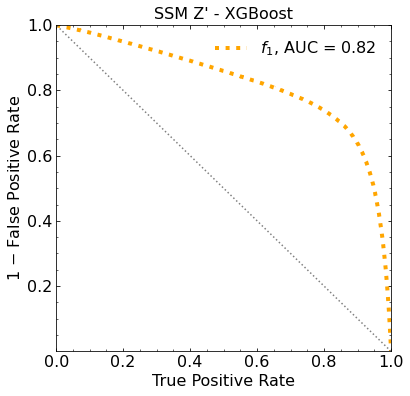


 ########################################

ML iteration  4


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68547	validation_1-logloss:0.68558
[1]	validation_0-logloss:0.67912	validation_1-logloss:0.67936
[2]	validation_0-logloss:0.67378	validation_1-logloss:0.67416
[3]	validation_0-logloss:0.66848	validation_1-logloss:0.66890
[4]	validation_0-logloss:0.66445	validation_1-logloss:0.66494
[5]	validation_0-logloss:0.66118	validation_1-logloss:0.66180
[6]	validation_0-logloss:0.65826	validation_1-logloss:0.65904
[7]	validation_0-logloss:0.65533	validation_1-logloss:0.65615
[8]	validation_0-logloss:0.65289	validation_1-logloss:0.65368
[9]	validation_0-logloss:0.65052	validation_1-logloss:0.65145
[10]	validation_0-logloss:0.64838	validation_1-logloss:0.64942
[11]	validation_0-logloss:0.64620	validation_1-logloss:0.64731
[12]	validation_0-logloss:0.64477	validation_1-logloss:0.64597
[13]	validation_0-logloss:0.64330	validation_1-logloss:0.64448
[14]	validation_0-logloss:0.64213	validation_1-logloss:0.64339
[15]	validation_0-logloss:0.64063	validation_1-logloss:0.64194
[1

[130]	validation_0-logloss:0.56200	validation_1-logloss:0.56814
[131]	validation_0-logloss:0.56153	validation_1-logloss:0.56773
[132]	validation_0-logloss:0.56121	validation_1-logloss:0.56746
[133]	validation_0-logloss:0.55999	validation_1-logloss:0.56627
[134]	validation_0-logloss:0.55901	validation_1-logloss:0.56535
[135]	validation_0-logloss:0.55827	validation_1-logloss:0.56461
[136]	validation_0-logloss:0.55746	validation_1-logloss:0.56385
[137]	validation_0-logloss:0.55713	validation_1-logloss:0.56353
[138]	validation_0-logloss:0.55655	validation_1-logloss:0.56298
[139]	validation_0-logloss:0.55627	validation_1-logloss:0.56273
[140]	validation_0-logloss:0.55581	validation_1-logloss:0.56229
[141]	validation_0-logloss:0.55549	validation_1-logloss:0.56200
[142]	validation_0-logloss:0.55528	validation_1-logloss:0.56181
[143]	validation_0-logloss:0.55509	validation_1-logloss:0.56165
[144]	validation_0-logloss:0.55495	validation_1-logloss:0.56153
[145]	validation_0-logloss:0.55481	valid

[259]	validation_0-logloss:0.53238	validation_1-logloss:0.54210
[260]	validation_0-logloss:0.53232	validation_1-logloss:0.54206
[261]	validation_0-logloss:0.53212	validation_1-logloss:0.54188
[262]	validation_0-logloss:0.53204	validation_1-logloss:0.54183
[263]	validation_0-logloss:0.53180	validation_1-logloss:0.54161
[264]	validation_0-logloss:0.53124	validation_1-logloss:0.54110
[265]	validation_0-logloss:0.53113	validation_1-logloss:0.54103
[266]	validation_0-logloss:0.53088	validation_1-logloss:0.54080
[267]	validation_0-logloss:0.53078	validation_1-logloss:0.54074
[268]	validation_0-logloss:0.53064	validation_1-logloss:0.54061
[269]	validation_0-logloss:0.53055	validation_1-logloss:0.54055
[270]	validation_0-logloss:0.53046	validation_1-logloss:0.54049
[271]	validation_0-logloss:0.53043	validation_1-logloss:0.54048
[272]	validation_0-logloss:0.53039	validation_1-logloss:0.54046
[273]	validation_0-logloss:0.53031	validation_1-logloss:0.54039
[274]	validation_0-logloss:0.53026	valid

[388]	validation_0-logloss:0.51666	validation_1-logloss:0.52963
[389]	validation_0-logloss:0.51659	validation_1-logloss:0.52959
[390]	validation_0-logloss:0.51658	validation_1-logloss:0.52959
[391]	validation_0-logloss:0.51654	validation_1-logloss:0.52956
[392]	validation_0-logloss:0.51649	validation_1-logloss:0.52953
[393]	validation_0-logloss:0.51647	validation_1-logloss:0.52953
[394]	validation_0-logloss:0.51637	validation_1-logloss:0.52948
[395]	validation_0-logloss:0.51634	validation_1-logloss:0.52948
[396]	validation_0-logloss:0.51631	validation_1-logloss:0.52946
[397]	validation_0-logloss:0.51601	validation_1-logloss:0.52920
[398]	validation_0-logloss:0.51592	validation_1-logloss:0.52914
[399]	validation_0-logloss:0.51589	validation_1-logloss:0.52913
[400]	validation_0-logloss:0.51549	validation_1-logloss:0.52876
[401]	validation_0-logloss:0.51546	validation_1-logloss:0.52875
[402]	validation_0-logloss:0.51542	validation_1-logloss:0.52874
[403]	validation_0-logloss:0.51540	valid

[517]	validation_0-logloss:0.50665	validation_1-logloss:0.52254
[518]	validation_0-logloss:0.50660	validation_1-logloss:0.52252
[519]	validation_0-logloss:0.50659	validation_1-logloss:0.52252
[520]	validation_0-logloss:0.50652	validation_1-logloss:0.52247
[521]	validation_0-logloss:0.50650	validation_1-logloss:0.52246
[522]	validation_0-logloss:0.50648	validation_1-logloss:0.52246
[523]	validation_0-logloss:0.50646	validation_1-logloss:0.52246
[524]	validation_0-logloss:0.50639	validation_1-logloss:0.52242
[525]	validation_0-logloss:0.50639	validation_1-logloss:0.52242
[526]	validation_0-logloss:0.50638	validation_1-logloss:0.52242
[527]	validation_0-logloss:0.50635	validation_1-logloss:0.52242
[528]	validation_0-logloss:0.50632	validation_1-logloss:0.52241
[529]	validation_0-logloss:0.50628	validation_1-logloss:0.52241
[530]	validation_0-logloss:0.50627	validation_1-logloss:0.52241
[531]	validation_0-logloss:0.50624	validation_1-logloss:0.52240
[532]	validation_0-logloss:0.50623	valid

[646]	validation_0-logloss:0.50068	validation_1-logloss:0.51950
[647]	validation_0-logloss:0.50067	validation_1-logloss:0.51950
[648]	validation_0-logloss:0.50065	validation_1-logloss:0.51949
[649]	validation_0-logloss:0.50064	validation_1-logloss:0.51950
[650]	validation_0-logloss:0.50064	validation_1-logloss:0.51950
[651]	validation_0-logloss:0.50062	validation_1-logloss:0.51950
[652]	validation_0-logloss:0.50060	validation_1-logloss:0.51950
[653]	validation_0-logloss:0.50057	validation_1-logloss:0.51950
[654]	validation_0-logloss:0.50031	validation_1-logloss:0.51924
[655]	validation_0-logloss:0.50026	validation_1-logloss:0.51923
[656]	validation_0-logloss:0.50018	validation_1-logloss:0.51917
[657]	validation_0-logloss:0.50015	validation_1-logloss:0.51917
[658]	validation_0-logloss:0.50011	validation_1-logloss:0.51914
[659]	validation_0-logloss:0.49986	validation_1-logloss:0.51889
[660]	validation_0-logloss:0.49961	validation_1-logloss:0.51868
[661]	validation_0-logloss:0.49949	valid

[775]	validation_0-logloss:0.49411	validation_1-logloss:0.51592
[776]	validation_0-logloss:0.49409	validation_1-logloss:0.51591
[777]	validation_0-logloss:0.49406	validation_1-logloss:0.51591
[778]	validation_0-logloss:0.49404	validation_1-logloss:0.51591
[779]	validation_0-logloss:0.49401	validation_1-logloss:0.51591
[780]	validation_0-logloss:0.49397	validation_1-logloss:0.51590
[781]	validation_0-logloss:0.49390	validation_1-logloss:0.51585
[782]	validation_0-logloss:0.49382	validation_1-logloss:0.51581
[783]	validation_0-logloss:0.49381	validation_1-logloss:0.51581
[784]	validation_0-logloss:0.49377	validation_1-logloss:0.51581
[785]	validation_0-logloss:0.49375	validation_1-logloss:0.51581
[786]	validation_0-logloss:0.49375	validation_1-logloss:0.51581
[787]	validation_0-logloss:0.49373	validation_1-logloss:0.51580
[788]	validation_0-logloss:0.49370	validation_1-logloss:0.51580
[789]	validation_0-logloss:0.49367	validation_1-logloss:0.51580
[790]	validation_0-logloss:0.49364	valid

[904]	validation_0-logloss:0.48856	validation_1-logloss:0.51321
[905]	validation_0-logloss:0.48854	validation_1-logloss:0.51321
[906]	validation_0-logloss:0.48853	validation_1-logloss:0.51321
[907]	validation_0-logloss:0.48852	validation_1-logloss:0.51321
[908]	validation_0-logloss:0.48841	validation_1-logloss:0.51313
[909]	validation_0-logloss:0.48838	validation_1-logloss:0.51312
[910]	validation_0-logloss:0.48835	validation_1-logloss:0.51313
[911]	validation_0-logloss:0.48833	validation_1-logloss:0.51313
[912]	validation_0-logloss:0.48830	validation_1-logloss:0.51312
[913]	validation_0-logloss:0.48829	validation_1-logloss:0.51312
[914]	validation_0-logloss:0.48827	validation_1-logloss:0.51313
[915]	validation_0-logloss:0.48825	validation_1-logloss:0.51313
[916]	validation_0-logloss:0.48821	validation_1-logloss:0.51312
[917]	validation_0-logloss:0.48819	validation_1-logloss:0.51312
[918]	validation_0-logloss:0.48814	validation_1-logloss:0.51310
[919]	validation_0-logloss:0.48813	valid

[1032]	validation_0-logloss:0.48362	validation_1-logloss:0.51116
[1033]	validation_0-logloss:0.48358	validation_1-logloss:0.51115
[1034]	validation_0-logloss:0.48355	validation_1-logloss:0.51114
[1035]	validation_0-logloss:0.48352	validation_1-logloss:0.51114
[1036]	validation_0-logloss:0.48349	validation_1-logloss:0.51111
[1037]	validation_0-logloss:0.48348	validation_1-logloss:0.51112
[1038]	validation_0-logloss:0.48344	validation_1-logloss:0.51110
[1039]	validation_0-logloss:0.48342	validation_1-logloss:0.51110
[1040]	validation_0-logloss:0.48330	validation_1-logloss:0.51100
[1041]	validation_0-logloss:0.48327	validation_1-logloss:0.51100
[1042]	validation_0-logloss:0.48321	validation_1-logloss:0.51097
[1043]	validation_0-logloss:0.48304	validation_1-logloss:0.51085
[1044]	validation_0-logloss:0.48302	validation_1-logloss:0.51085
[1045]	validation_0-logloss:0.48299	validation_1-logloss:0.51084
[1046]	validation_0-logloss:0.48295	validation_1-logloss:0.51082
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.47850	validation_1-logloss:0.50919
[1160]	validation_0-logloss:0.47846	validation_1-logloss:0.50917
[1161]	validation_0-logloss:0.47842	validation_1-logloss:0.50915
[1162]	validation_0-logloss:0.47840	validation_1-logloss:0.50915
[1163]	validation_0-logloss:0.47837	validation_1-logloss:0.50915
[1164]	validation_0-logloss:0.47833	validation_1-logloss:0.50913
[1165]	validation_0-logloss:0.47832	validation_1-logloss:0.50913
[1166]	validation_0-logloss:0.47829	validation_1-logloss:0.50912
[1167]	validation_0-logloss:0.47823	validation_1-logloss:0.50909
[1168]	validation_0-logloss:0.47820	validation_1-logloss:0.50909
[1169]	validation_0-logloss:0.47819	validation_1-logloss:0.50909
[1170]	validation_0-logloss:0.47818	validation_1-logloss:0.50909
[1171]	validation_0-logloss:0.47815	validation_1-logloss:0.50909
[1172]	validation_0-logloss:0.47813	validation_1-logloss:0.50908
[1173]	validation_0-logloss:0.47810	validation_1-logloss:0.50908
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.47452	validation_1-logloss:0.50798
[1287]	validation_0-logloss:0.47451	validation_1-logloss:0.50798
[1288]	validation_0-logloss:0.47449	validation_1-logloss:0.50797
[1289]	validation_0-logloss:0.47447	validation_1-logloss:0.50797
[1290]	validation_0-logloss:0.47443	validation_1-logloss:0.50797
[1291]	validation_0-logloss:0.47440	validation_1-logloss:0.50796
[1292]	validation_0-logloss:0.47438	validation_1-logloss:0.50796
[1293]	validation_0-logloss:0.47435	validation_1-logloss:0.50796
[1294]	validation_0-logloss:0.47431	validation_1-logloss:0.50794
[1295]	validation_0-logloss:0.47430	validation_1-logloss:0.50795
[1296]	validation_0-logloss:0.47427	validation_1-logloss:0.50795
[1297]	validation_0-logloss:0.47423	validation_1-logloss:0.50794
[1298]	validation_0-logloss:0.47421	validation_1-logloss:0.50794
[1299]	validation_0-logloss:0.47419	validation_1-logloss:0.50794
[1300]	validation_0-logloss:0.47414	validation_1-logloss:0.50792
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.47125	validation_1-logloss:0.50750
[1414]	validation_0-logloss:0.47123	validation_1-logloss:0.50751
[1415]	validation_0-logloss:0.47120	validation_1-logloss:0.50751
[1416]	validation_0-logloss:0.47118	validation_1-logloss:0.50751
[1417]	validation_0-logloss:0.47116	validation_1-logloss:0.50751
[1418]	validation_0-logloss:0.47114	validation_1-logloss:0.50751
[1419]	validation_0-logloss:0.47112	validation_1-logloss:0.50752
[1420]	validation_0-logloss:0.47108	validation_1-logloss:0.50752
[1421]	validation_0-logloss:0.47107	validation_1-logloss:0.50752
[1422]	validation_0-logloss:0.47104	validation_1-logloss:0.50753
[1423]	validation_0-logloss:0.47104	validation_1-logloss:0.50753
[1424]	validation_0-logloss:0.47102	validation_1-logloss:0.50753
[1425]	validation_0-logloss:0.47095	validation_1-logloss:0.50750
[1426]	validation_0-logloss:0.47094	validation_1-logloss:0.50750
[1427]	validation_0-logloss:0.47093	validation_1-logloss:0.50750
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.46747	validation_1-logloss:0.50664
[1541]	validation_0-logloss:0.46745	validation_1-logloss:0.50663
[1542]	validation_0-logloss:0.46742	validation_1-logloss:0.50663
[1543]	validation_0-logloss:0.46737	validation_1-logloss:0.50660
[1544]	validation_0-logloss:0.46736	validation_1-logloss:0.50660
[1545]	validation_0-logloss:0.46733	validation_1-logloss:0.50660
[1546]	validation_0-logloss:0.46727	validation_1-logloss:0.50657
[1547]	validation_0-logloss:0.46726	validation_1-logloss:0.50658
[1548]	validation_0-logloss:0.46722	validation_1-logloss:0.50656
[1549]	validation_0-logloss:0.46720	validation_1-logloss:0.50656
[1550]	validation_0-logloss:0.46719	validation_1-logloss:0.50655
[1551]	validation_0-logloss:0.46718	validation_1-logloss:0.50656
[1552]	validation_0-logloss:0.46716	validation_1-logloss:0.50656
[1553]	validation_0-logloss:0.46710	validation_1-logloss:0.50653
[1554]	validation_0-logloss:0.46709	validation_1-logloss:0.50653
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.46409	validation_1-logloss:0.50595
[1668]	validation_0-logloss:0.46408	validation_1-logloss:0.50595
[1669]	validation_0-logloss:0.46402	validation_1-logloss:0.50593
[1670]	validation_0-logloss:0.46401	validation_1-logloss:0.50593
[1671]	validation_0-logloss:0.46400	validation_1-logloss:0.50594
[1672]	validation_0-logloss:0.46396	validation_1-logloss:0.50593
[1673]	validation_0-logloss:0.46391	validation_1-logloss:0.50590
[1674]	validation_0-logloss:0.46388	validation_1-logloss:0.50589
[1675]	validation_0-logloss:0.46386	validation_1-logloss:0.50589
[1676]	validation_0-logloss:0.46383	validation_1-logloss:0.50590
[1677]	validation_0-logloss:0.46381	validation_1-logloss:0.50590
[1678]	validation_0-logloss:0.46378	validation_1-logloss:0.50591
[1679]	validation_0-logloss:0.46377	validation_1-logloss:0.50591
[1680]	validation_0-logloss:0.46375	validation_1-logloss:0.50591
[1681]	validation_0-logloss:0.46375	validation_1-logloss:0.50591
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.46018	validation_1-logloss:0.50496
[1795]	validation_0-logloss:0.46013	validation_1-logloss:0.50493
[1796]	validation_0-logloss:0.46011	validation_1-logloss:0.50493
[1797]	validation_0-logloss:0.46007	validation_1-logloss:0.50492
[1798]	validation_0-logloss:0.46004	validation_1-logloss:0.50492
[1799]	validation_0-logloss:0.46000	validation_1-logloss:0.50491
[1800]	validation_0-logloss:0.45996	validation_1-logloss:0.50489
[1801]	validation_0-logloss:0.45993	validation_1-logloss:0.50489
[1802]	validation_0-logloss:0.45990	validation_1-logloss:0.50489
[1803]	validation_0-logloss:0.45983	validation_1-logloss:0.50485
[1804]	validation_0-logloss:0.45983	validation_1-logloss:0.50485
[1805]	validation_0-logloss:0.45983	validation_1-logloss:0.50486
[1806]	validation_0-logloss:0.45982	validation_1-logloss:0.50486
[1807]	validation_0-logloss:0.45978	validation_1-logloss:0.50486
[1808]	validation_0-logloss:0.45977	validation_1-logloss:0.50486
[1809]	validation_0-loglo

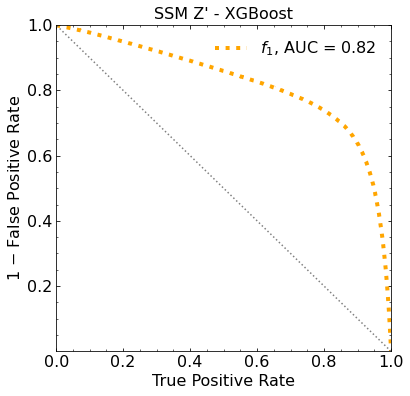


 ########################################

ML iteration  5


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68365	validation_1-logloss:0.68388
[1]	validation_0-logloss:0.67717	validation_1-logloss:0.67735
[2]	validation_0-logloss:0.67186	validation_1-logloss:0.67214
[3]	validation_0-logloss:0.66742	validation_1-logloss:0.66775
[4]	validation_0-logloss:0.66359	validation_1-logloss:0.66400
[5]	validation_0-logloss:0.66053	validation_1-logloss:0.66102
[6]	validation_0-logloss:0.65768	validation_1-logloss:0.65816
[7]	validation_0-logloss:0.65486	validation_1-logloss:0.65547
[8]	validation_0-logloss:0.65232	validation_1-logloss:0.65296
[9]	validation_0-logloss:0.65028	validation_1-logloss:0.65094
[10]	validation_0-logloss:0.64841	validation_1-logloss:0.64918
[11]	validation_0-logloss:0.64692	validation_1-logloss:0.64774
[12]	validation_0-logloss:0.64393	validation_1-logloss:0.64489
[13]	validation_0-logloss:0.64193	validation_1-logloss:0.64296
[14]	validation_0-logloss:0.64070	validation_1-logloss:0.64178
[15]	validation_0-logloss:0.63809	validation_1-logloss:0.63928
[1

[130]	validation_0-logloss:0.56404	validation_1-logloss:0.57056
[131]	validation_0-logloss:0.56346	validation_1-logloss:0.57001
[132]	validation_0-logloss:0.56293	validation_1-logloss:0.56952
[133]	validation_0-logloss:0.56264	validation_1-logloss:0.56927
[134]	validation_0-logloss:0.56245	validation_1-logloss:0.56908
[135]	validation_0-logloss:0.56223	validation_1-logloss:0.56886
[136]	validation_0-logloss:0.56203	validation_1-logloss:0.56869
[137]	validation_0-logloss:0.56170	validation_1-logloss:0.56835
[138]	validation_0-logloss:0.56137	validation_1-logloss:0.56805
[139]	validation_0-logloss:0.56112	validation_1-logloss:0.56783
[140]	validation_0-logloss:0.56068	validation_1-logloss:0.56742
[141]	validation_0-logloss:0.55988	validation_1-logloss:0.56671
[142]	validation_0-logloss:0.55976	validation_1-logloss:0.56661
[143]	validation_0-logloss:0.55959	validation_1-logloss:0.56648
[144]	validation_0-logloss:0.55910	validation_1-logloss:0.56600
[145]	validation_0-logloss:0.55825	valid

[259]	validation_0-logloss:0.53112	validation_1-logloss:0.54131
[260]	validation_0-logloss:0.53099	validation_1-logloss:0.54122
[261]	validation_0-logloss:0.53092	validation_1-logloss:0.54117
[262]	validation_0-logloss:0.53084	validation_1-logloss:0.54112
[263]	validation_0-logloss:0.53076	validation_1-logloss:0.54107
[264]	validation_0-logloss:0.53071	validation_1-logloss:0.54105
[265]	validation_0-logloss:0.53063	validation_1-logloss:0.54099
[266]	validation_0-logloss:0.53056	validation_1-logloss:0.54094
[267]	validation_0-logloss:0.53051	validation_1-logloss:0.54091
[268]	validation_0-logloss:0.53012	validation_1-logloss:0.54055
[269]	validation_0-logloss:0.53007	validation_1-logloss:0.54050
[270]	validation_0-logloss:0.52976	validation_1-logloss:0.54027
[271]	validation_0-logloss:0.52961	validation_1-logloss:0.54014
[272]	validation_0-logloss:0.52930	validation_1-logloss:0.53989
[273]	validation_0-logloss:0.52917	validation_1-logloss:0.53978
[274]	validation_0-logloss:0.52903	valid

[388]	validation_0-logloss:0.51684	validation_1-logloss:0.53034
[389]	validation_0-logloss:0.51673	validation_1-logloss:0.53028
[390]	validation_0-logloss:0.51668	validation_1-logloss:0.53025
[391]	validation_0-logloss:0.51666	validation_1-logloss:0.53026
[392]	validation_0-logloss:0.51660	validation_1-logloss:0.53022
[393]	validation_0-logloss:0.51652	validation_1-logloss:0.53017
[394]	validation_0-logloss:0.51649	validation_1-logloss:0.53016
[395]	validation_0-logloss:0.51647	validation_1-logloss:0.53016
[396]	validation_0-logloss:0.51642	validation_1-logloss:0.53014
[397]	validation_0-logloss:0.51636	validation_1-logloss:0.53009
[398]	validation_0-logloss:0.51616	validation_1-logloss:0.52989
[399]	validation_0-logloss:0.51605	validation_1-logloss:0.52980
[400]	validation_0-logloss:0.51590	validation_1-logloss:0.52969
[401]	validation_0-logloss:0.51586	validation_1-logloss:0.52969
[402]	validation_0-logloss:0.51576	validation_1-logloss:0.52961
[403]	validation_0-logloss:0.51568	valid

[517]	validation_0-logloss:0.50856	validation_1-logloss:0.52504
[518]	validation_0-logloss:0.50807	validation_1-logloss:0.52460
[519]	validation_0-logloss:0.50796	validation_1-logloss:0.52452
[520]	validation_0-logloss:0.50791	validation_1-logloss:0.52448
[521]	validation_0-logloss:0.50786	validation_1-logloss:0.52447
[522]	validation_0-logloss:0.50784	validation_1-logloss:0.52446
[523]	validation_0-logloss:0.50780	validation_1-logloss:0.52445
[524]	validation_0-logloss:0.50780	validation_1-logloss:0.52445
[525]	validation_0-logloss:0.50777	validation_1-logloss:0.52445
[526]	validation_0-logloss:0.50773	validation_1-logloss:0.52444
[527]	validation_0-logloss:0.50770	validation_1-logloss:0.52443
[528]	validation_0-logloss:0.50765	validation_1-logloss:0.52441
[529]	validation_0-logloss:0.50763	validation_1-logloss:0.52441
[530]	validation_0-logloss:0.50753	validation_1-logloss:0.52435
[531]	validation_0-logloss:0.50748	validation_1-logloss:0.52433
[532]	validation_0-logloss:0.50704	valid

[646]	validation_0-logloss:0.50084	validation_1-logloss:0.52039
[647]	validation_0-logloss:0.50079	validation_1-logloss:0.52036
[648]	validation_0-logloss:0.50077	validation_1-logloss:0.52036
[649]	validation_0-logloss:0.50073	validation_1-logloss:0.52036
[650]	validation_0-logloss:0.50068	validation_1-logloss:0.52033
[651]	validation_0-logloss:0.50067	validation_1-logloss:0.52033
[652]	validation_0-logloss:0.50065	validation_1-logloss:0.52034
[653]	validation_0-logloss:0.50052	validation_1-logloss:0.52023
[654]	validation_0-logloss:0.50040	validation_1-logloss:0.52012
[655]	validation_0-logloss:0.50039	validation_1-logloss:0.52013
[656]	validation_0-logloss:0.50029	validation_1-logloss:0.52004
[657]	validation_0-logloss:0.50005	validation_1-logloss:0.51983
[658]	validation_0-logloss:0.49987	validation_1-logloss:0.51968
[659]	validation_0-logloss:0.49980	validation_1-logloss:0.51964
[660]	validation_0-logloss:0.49977	validation_1-logloss:0.51964
[661]	validation_0-logloss:0.49974	valid

[775]	validation_0-logloss:0.49299	validation_1-logloss:0.51575
[776]	validation_0-logloss:0.49274	validation_1-logloss:0.51554
[777]	validation_0-logloss:0.49253	validation_1-logloss:0.51536
[778]	validation_0-logloss:0.49245	validation_1-logloss:0.51532
[779]	validation_0-logloss:0.49243	validation_1-logloss:0.51533
[780]	validation_0-logloss:0.49240	validation_1-logloss:0.51533
[781]	validation_0-logloss:0.49237	validation_1-logloss:0.51531
[782]	validation_0-logloss:0.49234	validation_1-logloss:0.51531
[783]	validation_0-logloss:0.49232	validation_1-logloss:0.51532
[784]	validation_0-logloss:0.49229	validation_1-logloss:0.51531
[785]	validation_0-logloss:0.49227	validation_1-logloss:0.51531
[786]	validation_0-logloss:0.49224	validation_1-logloss:0.51530
[787]	validation_0-logloss:0.49222	validation_1-logloss:0.51529
[788]	validation_0-logloss:0.49218	validation_1-logloss:0.51528
[789]	validation_0-logloss:0.49211	validation_1-logloss:0.51523
[790]	validation_0-logloss:0.49209	valid

[904]	validation_0-logloss:0.48731	validation_1-logloss:0.51312
[905]	validation_0-logloss:0.48729	validation_1-logloss:0.51311
[906]	validation_0-logloss:0.48724	validation_1-logloss:0.51308
[907]	validation_0-logloss:0.48720	validation_1-logloss:0.51306
[908]	validation_0-logloss:0.48716	validation_1-logloss:0.51306
[909]	validation_0-logloss:0.48713	validation_1-logloss:0.51306
[910]	validation_0-logloss:0.48711	validation_1-logloss:0.51305
[911]	validation_0-logloss:0.48705	validation_1-logloss:0.51302
[912]	validation_0-logloss:0.48701	validation_1-logloss:0.51300
[913]	validation_0-logloss:0.48695	validation_1-logloss:0.51296
[914]	validation_0-logloss:0.48692	validation_1-logloss:0.51296
[915]	validation_0-logloss:0.48689	validation_1-logloss:0.51295
[916]	validation_0-logloss:0.48685	validation_1-logloss:0.51294
[917]	validation_0-logloss:0.48682	validation_1-logloss:0.51293
[918]	validation_0-logloss:0.48677	validation_1-logloss:0.51289
[919]	validation_0-logloss:0.48670	valid

[1032]	validation_0-logloss:0.48197	validation_1-logloss:0.51075
[1033]	validation_0-logloss:0.48193	validation_1-logloss:0.51073
[1034]	validation_0-logloss:0.48191	validation_1-logloss:0.51074
[1035]	validation_0-logloss:0.48190	validation_1-logloss:0.51074
[1036]	validation_0-logloss:0.48184	validation_1-logloss:0.51070
[1037]	validation_0-logloss:0.48183	validation_1-logloss:0.51070
[1038]	validation_0-logloss:0.48180	validation_1-logloss:0.51068
[1039]	validation_0-logloss:0.48179	validation_1-logloss:0.51069
[1040]	validation_0-logloss:0.48176	validation_1-logloss:0.51068
[1041]	validation_0-logloss:0.48164	validation_1-logloss:0.51060
[1042]	validation_0-logloss:0.48160	validation_1-logloss:0.51059
[1043]	validation_0-logloss:0.48159	validation_1-logloss:0.51059
[1044]	validation_0-logloss:0.48157	validation_1-logloss:0.51059
[1045]	validation_0-logloss:0.48156	validation_1-logloss:0.51059
[1046]	validation_0-logloss:0.48154	validation_1-logloss:0.51059
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.47769	validation_1-logloss:0.50928
[1160]	validation_0-logloss:0.47765	validation_1-logloss:0.50929
[1161]	validation_0-logloss:0.47762	validation_1-logloss:0.50930
[1162]	validation_0-logloss:0.47761	validation_1-logloss:0.50930
[1163]	validation_0-logloss:0.47759	validation_1-logloss:0.50930
[1164]	validation_0-logloss:0.47756	validation_1-logloss:0.50929
[1165]	validation_0-logloss:0.47753	validation_1-logloss:0.50929
[1166]	validation_0-logloss:0.47750	validation_1-logloss:0.50929
[1167]	validation_0-logloss:0.47750	validation_1-logloss:0.50928
[1168]	validation_0-logloss:0.47748	validation_1-logloss:0.50929
[1169]	validation_0-logloss:0.47747	validation_1-logloss:0.50929
[1170]	validation_0-logloss:0.47745	validation_1-logloss:0.50929
[1171]	validation_0-logloss:0.47741	validation_1-logloss:0.50927
[1172]	validation_0-logloss:0.47739	validation_1-logloss:0.50927
[1173]	validation_0-logloss:0.47738	validation_1-logloss:0.50928
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.47294	validation_1-logloss:0.50755
[1287]	validation_0-logloss:0.47291	validation_1-logloss:0.50755
[1288]	validation_0-logloss:0.47288	validation_1-logloss:0.50755
[1289]	validation_0-logloss:0.47283	validation_1-logloss:0.50755
[1290]	validation_0-logloss:0.47274	validation_1-logloss:0.50749
[1291]	validation_0-logloss:0.47272	validation_1-logloss:0.50750
[1292]	validation_0-logloss:0.47265	validation_1-logloss:0.50746
[1293]	validation_0-logloss:0.47259	validation_1-logloss:0.50743
[1294]	validation_0-logloss:0.47253	validation_1-logloss:0.50740
[1295]	validation_0-logloss:0.47249	validation_1-logloss:0.50737
[1296]	validation_0-logloss:0.47246	validation_1-logloss:0.50736
[1297]	validation_0-logloss:0.47243	validation_1-logloss:0.50736
[1298]	validation_0-logloss:0.47235	validation_1-logloss:0.50730
[1299]	validation_0-logloss:0.47233	validation_1-logloss:0.50730
[1300]	validation_0-logloss:0.47229	validation_1-logloss:0.50729
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.46909	validation_1-logloss:0.50663
[1414]	validation_0-logloss:0.46904	validation_1-logloss:0.50662
[1415]	validation_0-logloss:0.46903	validation_1-logloss:0.50663
[1416]	validation_0-logloss:0.46900	validation_1-logloss:0.50663
[1417]	validation_0-logloss:0.46898	validation_1-logloss:0.50663
[1418]	validation_0-logloss:0.46896	validation_1-logloss:0.50663
[1419]	validation_0-logloss:0.46894	validation_1-logloss:0.50664
[1420]	validation_0-logloss:0.46891	validation_1-logloss:0.50664
[1421]	validation_0-logloss:0.46891	validation_1-logloss:0.50664
[1422]	validation_0-logloss:0.46888	validation_1-logloss:0.50664
[1423]	validation_0-logloss:0.46888	validation_1-logloss:0.50665
[1424]	validation_0-logloss:0.46887	validation_1-logloss:0.50665
[1425]	validation_0-logloss:0.46886	validation_1-logloss:0.50665
[1426]	validation_0-logloss:0.46886	validation_1-logloss:0.50665
[1427]	validation_0-logloss:0.46885	validation_1-logloss:0.50665
[1428]	validation_0-loglo

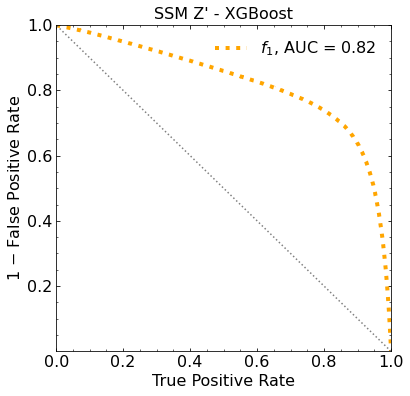


 ########################################

ML iteration  6


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68537	validation_1-logloss:0.68559
[1]	validation_0-logloss:0.67917	validation_1-logloss:0.67942
[2]	validation_0-logloss:0.67390	validation_1-logloss:0.67429
[3]	validation_0-logloss:0.66878	validation_1-logloss:0.66925
[4]	validation_0-logloss:0.66484	validation_1-logloss:0.66536
[5]	validation_0-logloss:0.66143	validation_1-logloss:0.66205
[6]	validation_0-logloss:0.65813	validation_1-logloss:0.65887
[7]	validation_0-logloss:0.65524	validation_1-logloss:0.65601
[8]	validation_0-logloss:0.65233	validation_1-logloss:0.65319
[9]	validation_0-logloss:0.65036	validation_1-logloss:0.65139
[10]	validation_0-logloss:0.64840	validation_1-logloss:0.64954
[11]	validation_0-logloss:0.64646	validation_1-logloss:0.64770
[12]	validation_0-logloss:0.64462	validation_1-logloss:0.64596
[13]	validation_0-logloss:0.64270	validation_1-logloss:0.64414
[14]	validation_0-logloss:0.64097	validation_1-logloss:0.64252
[15]	validation_0-logloss:0.63998	validation_1-logloss:0.64158
[1

[130]	validation_0-logloss:0.56320	validation_1-logloss:0.57008
[131]	validation_0-logloss:0.56281	validation_1-logloss:0.56974
[132]	validation_0-logloss:0.56261	validation_1-logloss:0.56957
[133]	validation_0-logloss:0.56234	validation_1-logloss:0.56932
[134]	validation_0-logloss:0.56157	validation_1-logloss:0.56863
[135]	validation_0-logloss:0.56120	validation_1-logloss:0.56827
[136]	validation_0-logloss:0.56103	validation_1-logloss:0.56815
[137]	validation_0-logloss:0.56071	validation_1-logloss:0.56787
[138]	validation_0-logloss:0.56029	validation_1-logloss:0.56748
[139]	validation_0-logloss:0.55992	validation_1-logloss:0.56714
[140]	validation_0-logloss:0.55976	validation_1-logloss:0.56701
[141]	validation_0-logloss:0.55962	validation_1-logloss:0.56690
[142]	validation_0-logloss:0.55947	validation_1-logloss:0.56678
[143]	validation_0-logloss:0.55928	validation_1-logloss:0.56661
[144]	validation_0-logloss:0.55913	validation_1-logloss:0.56650
[145]	validation_0-logloss:0.55893	valid

[259]	validation_0-logloss:0.53150	validation_1-logloss:0.54189
[260]	validation_0-logloss:0.53144	validation_1-logloss:0.54186
[261]	validation_0-logloss:0.53135	validation_1-logloss:0.54178
[262]	validation_0-logloss:0.53097	validation_1-logloss:0.54143
[263]	validation_0-logloss:0.53092	validation_1-logloss:0.54140
[264]	validation_0-logloss:0.53077	validation_1-logloss:0.54127
[265]	validation_0-logloss:0.53033	validation_1-logloss:0.54086
[266]	validation_0-logloss:0.53024	validation_1-logloss:0.54079
[267]	validation_0-logloss:0.52985	validation_1-logloss:0.54046
[268]	validation_0-logloss:0.52970	validation_1-logloss:0.54033
[269]	validation_0-logloss:0.52956	validation_1-logloss:0.54023
[270]	validation_0-logloss:0.52947	validation_1-logloss:0.54015
[271]	validation_0-logloss:0.52942	validation_1-logloss:0.54013
[272]	validation_0-logloss:0.52932	validation_1-logloss:0.54005
[273]	validation_0-logloss:0.52918	validation_1-logloss:0.53994
[274]	validation_0-logloss:0.52907	valid

[388]	validation_0-logloss:0.51511	validation_1-logloss:0.52871
[389]	validation_0-logloss:0.51500	validation_1-logloss:0.52865
[390]	validation_0-logloss:0.51492	validation_1-logloss:0.52858
[391]	validation_0-logloss:0.51488	validation_1-logloss:0.52856
[392]	validation_0-logloss:0.51484	validation_1-logloss:0.52855
[393]	validation_0-logloss:0.51478	validation_1-logloss:0.52851
[394]	validation_0-logloss:0.51475	validation_1-logloss:0.52850
[395]	validation_0-logloss:0.51441	validation_1-logloss:0.52819
[396]	validation_0-logloss:0.51437	validation_1-logloss:0.52818
[397]	validation_0-logloss:0.51430	validation_1-logloss:0.52813
[398]	validation_0-logloss:0.51426	validation_1-logloss:0.52812
[399]	validation_0-logloss:0.51416	validation_1-logloss:0.52806
[400]	validation_0-logloss:0.51415	validation_1-logloss:0.52805
[401]	validation_0-logloss:0.51410	validation_1-logloss:0.52803
[402]	validation_0-logloss:0.51406	validation_1-logloss:0.52803
[403]	validation_0-logloss:0.51401	valid

[517]	validation_0-logloss:0.50558	validation_1-logloss:0.52240
[518]	validation_0-logloss:0.50552	validation_1-logloss:0.52237
[519]	validation_0-logloss:0.50545	validation_1-logloss:0.52233
[520]	validation_0-logloss:0.50543	validation_1-logloss:0.52233
[521]	validation_0-logloss:0.50528	validation_1-logloss:0.52221
[522]	validation_0-logloss:0.50526	validation_1-logloss:0.52221
[523]	validation_0-logloss:0.50523	validation_1-logloss:0.52220
[524]	validation_0-logloss:0.50518	validation_1-logloss:0.52219
[525]	validation_0-logloss:0.50513	validation_1-logloss:0.52216
[526]	validation_0-logloss:0.50511	validation_1-logloss:0.52215
[527]	validation_0-logloss:0.50508	validation_1-logloss:0.52215
[528]	validation_0-logloss:0.50506	validation_1-logloss:0.52215
[529]	validation_0-logloss:0.50505	validation_1-logloss:0.52215
[530]	validation_0-logloss:0.50504	validation_1-logloss:0.52216
[531]	validation_0-logloss:0.50503	validation_1-logloss:0.52216
[532]	validation_0-logloss:0.50499	valid

[646]	validation_0-logloss:0.49837	validation_1-logloss:0.51810
[647]	validation_0-logloss:0.49835	validation_1-logloss:0.51811
[648]	validation_0-logloss:0.49834	validation_1-logloss:0.51811
[649]	validation_0-logloss:0.49830	validation_1-logloss:0.51808
[650]	validation_0-logloss:0.49826	validation_1-logloss:0.51806
[651]	validation_0-logloss:0.49815	validation_1-logloss:0.51798
[652]	validation_0-logloss:0.49791	validation_1-logloss:0.51775
[653]	validation_0-logloss:0.49769	validation_1-logloss:0.51756
[654]	validation_0-logloss:0.49767	validation_1-logloss:0.51755
[655]	validation_0-logloss:0.49765	validation_1-logloss:0.51755
[656]	validation_0-logloss:0.49761	validation_1-logloss:0.51753
[657]	validation_0-logloss:0.49753	validation_1-logloss:0.51746
[658]	validation_0-logloss:0.49751	validation_1-logloss:0.51746
[659]	validation_0-logloss:0.49742	validation_1-logloss:0.51740
[660]	validation_0-logloss:0.49719	validation_1-logloss:0.51720
[661]	validation_0-logloss:0.49717	valid

[775]	validation_0-logloss:0.49140	validation_1-logloss:0.51425
[776]	validation_0-logloss:0.49136	validation_1-logloss:0.51423
[777]	validation_0-logloss:0.49135	validation_1-logloss:0.51423
[778]	validation_0-logloss:0.49132	validation_1-logloss:0.51422
[779]	validation_0-logloss:0.49131	validation_1-logloss:0.51423
[780]	validation_0-logloss:0.49123	validation_1-logloss:0.51418
[781]	validation_0-logloss:0.49122	validation_1-logloss:0.51418
[782]	validation_0-logloss:0.49118	validation_1-logloss:0.51415
[783]	validation_0-logloss:0.49115	validation_1-logloss:0.51415
[784]	validation_0-logloss:0.49112	validation_1-logloss:0.51415
[785]	validation_0-logloss:0.49108	validation_1-logloss:0.51413
[786]	validation_0-logloss:0.49104	validation_1-logloss:0.51411
[787]	validation_0-logloss:0.49100	validation_1-logloss:0.51411
[788]	validation_0-logloss:0.49100	validation_1-logloss:0.51411
[789]	validation_0-logloss:0.49099	validation_1-logloss:0.51411
[790]	validation_0-logloss:0.49093	valid

[904]	validation_0-logloss:0.48570	validation_1-logloss:0.51157
[905]	validation_0-logloss:0.48568	validation_1-logloss:0.51157
[906]	validation_0-logloss:0.48564	validation_1-logloss:0.51156
[907]	validation_0-logloss:0.48562	validation_1-logloss:0.51156
[908]	validation_0-logloss:0.48558	validation_1-logloss:0.51154
[909]	validation_0-logloss:0.48553	validation_1-logloss:0.51152
[910]	validation_0-logloss:0.48550	validation_1-logloss:0.51153
[911]	validation_0-logloss:0.48549	validation_1-logloss:0.51153
[912]	validation_0-logloss:0.48546	validation_1-logloss:0.51153
[913]	validation_0-logloss:0.48543	validation_1-logloss:0.51151
[914]	validation_0-logloss:0.48541	validation_1-logloss:0.51152
[915]	validation_0-logloss:0.48529	validation_1-logloss:0.51143
[916]	validation_0-logloss:0.48519	validation_1-logloss:0.51135
[917]	validation_0-logloss:0.48513	validation_1-logloss:0.51132
[918]	validation_0-logloss:0.48510	validation_1-logloss:0.51131
[919]	validation_0-logloss:0.48497	valid

[1032]	validation_0-logloss:0.48078	validation_1-logloss:0.50966
[1033]	validation_0-logloss:0.48076	validation_1-logloss:0.50966
[1034]	validation_0-logloss:0.48069	validation_1-logloss:0.50963
[1035]	validation_0-logloss:0.48065	validation_1-logloss:0.50962
[1036]	validation_0-logloss:0.48064	validation_1-logloss:0.50962
[1037]	validation_0-logloss:0.48061	validation_1-logloss:0.50962
[1038]	validation_0-logloss:0.48057	validation_1-logloss:0.50961
[1039]	validation_0-logloss:0.48048	validation_1-logloss:0.50956
[1040]	validation_0-logloss:0.48044	validation_1-logloss:0.50953
[1041]	validation_0-logloss:0.48043	validation_1-logloss:0.50953
[1042]	validation_0-logloss:0.48042	validation_1-logloss:0.50954
[1043]	validation_0-logloss:0.48040	validation_1-logloss:0.50954
[1044]	validation_0-logloss:0.48038	validation_1-logloss:0.50955
[1045]	validation_0-logloss:0.48037	validation_1-logloss:0.50955
[1046]	validation_0-logloss:0.48033	validation_1-logloss:0.50954
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.47657	validation_1-logloss:0.50834
[1160]	validation_0-logloss:0.47655	validation_1-logloss:0.50835
[1161]	validation_0-logloss:0.47652	validation_1-logloss:0.50834
[1162]	validation_0-logloss:0.47648	validation_1-logloss:0.50833
[1163]	validation_0-logloss:0.47645	validation_1-logloss:0.50831
[1164]	validation_0-logloss:0.47644	validation_1-logloss:0.50832
[1165]	validation_0-logloss:0.47639	validation_1-logloss:0.50831
[1166]	validation_0-logloss:0.47638	validation_1-logloss:0.50831
[1167]	validation_0-logloss:0.47632	validation_1-logloss:0.50828
[1168]	validation_0-logloss:0.47626	validation_1-logloss:0.50825
[1169]	validation_0-logloss:0.47622	validation_1-logloss:0.50823
[1170]	validation_0-logloss:0.47617	validation_1-logloss:0.50819
[1171]	validation_0-logloss:0.47614	validation_1-logloss:0.50819
[1172]	validation_0-logloss:0.47611	validation_1-logloss:0.50817
[1173]	validation_0-logloss:0.47609	validation_1-logloss:0.50818
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.47219	validation_1-logloss:0.50718
[1287]	validation_0-logloss:0.47217	validation_1-logloss:0.50717
[1288]	validation_0-logloss:0.47214	validation_1-logloss:0.50717
[1289]	validation_0-logloss:0.47212	validation_1-logloss:0.50718
[1290]	validation_0-logloss:0.47209	validation_1-logloss:0.50718
[1291]	validation_0-logloss:0.47208	validation_1-logloss:0.50718
[1292]	validation_0-logloss:0.47206	validation_1-logloss:0.50718
[1293]	validation_0-logloss:0.47202	validation_1-logloss:0.50718
[1294]	validation_0-logloss:0.47200	validation_1-logloss:0.50717
[1295]	validation_0-logloss:0.47199	validation_1-logloss:0.50718
[1296]	validation_0-logloss:0.47197	validation_1-logloss:0.50718
[1297]	validation_0-logloss:0.47195	validation_1-logloss:0.50718
[1298]	validation_0-logloss:0.47193	validation_1-logloss:0.50718
[1299]	validation_0-logloss:0.47190	validation_1-logloss:0.50718
[1300]	validation_0-logloss:0.47189	validation_1-logloss:0.50719
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.46877	validation_1-logloss:0.50643
[1414]	validation_0-logloss:0.46870	validation_1-logloss:0.50640
[1415]	validation_0-logloss:0.46869	validation_1-logloss:0.50640
[1416]	validation_0-logloss:0.46865	validation_1-logloss:0.50638
[1417]	validation_0-logloss:0.46863	validation_1-logloss:0.50639
[1418]	validation_0-logloss:0.46858	validation_1-logloss:0.50636
[1419]	validation_0-logloss:0.46857	validation_1-logloss:0.50637
[1420]	validation_0-logloss:0.46853	validation_1-logloss:0.50635
[1421]	validation_0-logloss:0.46851	validation_1-logloss:0.50635
[1422]	validation_0-logloss:0.46850	validation_1-logloss:0.50636
[1423]	validation_0-logloss:0.46845	validation_1-logloss:0.50634
[1424]	validation_0-logloss:0.46841	validation_1-logloss:0.50634
[1425]	validation_0-logloss:0.46838	validation_1-logloss:0.50635
[1426]	validation_0-logloss:0.46835	validation_1-logloss:0.50636
[1427]	validation_0-logloss:0.46831	validation_1-logloss:0.50634
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.46563	validation_1-logloss:0.50596
[1541]	validation_0-logloss:0.46560	validation_1-logloss:0.50596
[1542]	validation_0-logloss:0.46557	validation_1-logloss:0.50596
[1543]	validation_0-logloss:0.46555	validation_1-logloss:0.50596
[1544]	validation_0-logloss:0.46552	validation_1-logloss:0.50596
[1545]	validation_0-logloss:0.46550	validation_1-logloss:0.50596
[1546]	validation_0-logloss:0.46548	validation_1-logloss:0.50597
[1547]	validation_0-logloss:0.46547	validation_1-logloss:0.50597
[1548]	validation_0-logloss:0.46542	validation_1-logloss:0.50596
[1549]	validation_0-logloss:0.46541	validation_1-logloss:0.50596
[1550]	validation_0-logloss:0.46540	validation_1-logloss:0.50596
[1551]	validation_0-logloss:0.46538	validation_1-logloss:0.50596
[1552]	validation_0-logloss:0.46535	validation_1-logloss:0.50596
[1553]	validation_0-logloss:0.46533	validation_1-logloss:0.50596
[1554]	validation_0-logloss:0.46530	validation_1-logloss:0.50596
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.46220	validation_1-logloss:0.50531
[1668]	validation_0-logloss:0.46217	validation_1-logloss:0.50531
[1669]	validation_0-logloss:0.46212	validation_1-logloss:0.50529
[1670]	validation_0-logloss:0.46211	validation_1-logloss:0.50529
[1671]	validation_0-logloss:0.46209	validation_1-logloss:0.50529
[1672]	validation_0-logloss:0.46207	validation_1-logloss:0.50529
[1673]	validation_0-logloss:0.46204	validation_1-logloss:0.50529
[1674]	validation_0-logloss:0.46200	validation_1-logloss:0.50529
[1675]	validation_0-logloss:0.46198	validation_1-logloss:0.50529
[1676]	validation_0-logloss:0.46196	validation_1-logloss:0.50530
[1677]	validation_0-logloss:0.46193	validation_1-logloss:0.50530
[1678]	validation_0-logloss:0.46191	validation_1-logloss:0.50530
[1679]	validation_0-logloss:0.46188	validation_1-logloss:0.50531
[1680]	validation_0-logloss:0.46185	validation_1-logloss:0.50530
[1681]	validation_0-logloss:0.46180	validation_1-logloss:0.50529
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.45873	validation_1-logloss:0.50473
[1795]	validation_0-logloss:0.45871	validation_1-logloss:0.50473
[1796]	validation_0-logloss:0.45871	validation_1-logloss:0.50474
[1797]	validation_0-logloss:0.45871	validation_1-logloss:0.50474
[1798]	validation_0-logloss:0.45869	validation_1-logloss:0.50474
[1799]	validation_0-logloss:0.45868	validation_1-logloss:0.50475
[1800]	validation_0-logloss:0.45868	validation_1-logloss:0.50475
[1801]	validation_0-logloss:0.45865	validation_1-logloss:0.50475
[1802]	validation_0-logloss:0.45863	validation_1-logloss:0.50475
[1803]	validation_0-logloss:0.45862	validation_1-logloss:0.50475
[1804]	validation_0-logloss:0.45859	validation_1-logloss:0.50475
[1805]	validation_0-logloss:0.45856	validation_1-logloss:0.50475
[1806]	validation_0-logloss:0.45854	validation_1-logloss:0.50475
[1807]	validation_0-logloss:0.45854	validation_1-logloss:0.50475
[1808]	validation_0-logloss:0.45850	validation_1-logloss:0.50475
[1809]	validation_0-loglo

[1921]	validation_0-logloss:0.45571	validation_1-logloss:0.50439
[1922]	validation_0-logloss:0.45569	validation_1-logloss:0.50439
[1923]	validation_0-logloss:0.45567	validation_1-logloss:0.50439
[1924]	validation_0-logloss:0.45565	validation_1-logloss:0.50438
[1925]	validation_0-logloss:0.45563	validation_1-logloss:0.50438
[1926]	validation_0-logloss:0.45561	validation_1-logloss:0.50438
[1927]	validation_0-logloss:0.45560	validation_1-logloss:0.50438
[1928]	validation_0-logloss:0.45557	validation_1-logloss:0.50439
[1929]	validation_0-logloss:0.45555	validation_1-logloss:0.50439
[1930]	validation_0-logloss:0.45553	validation_1-logloss:0.50439
[1931]	validation_0-logloss:0.45552	validation_1-logloss:0.50438
[1932]	validation_0-logloss:0.45551	validation_1-logloss:0.50439
[1933]	validation_0-logloss:0.45550	validation_1-logloss:0.50439
[1934]	validation_0-logloss:0.45548	validation_1-logloss:0.50439
[1935]	validation_0-logloss:0.45548	validation_1-logloss:0.50440
[1936]	validation_0-loglo

[2048]	validation_0-logloss:0.45274	validation_1-logloss:0.50398
[2049]	validation_0-logloss:0.45272	validation_1-logloss:0.50399
[2050]	validation_0-logloss:0.45270	validation_1-logloss:0.50399
[2051]	validation_0-logloss:0.45268	validation_1-logloss:0.50399
[2052]	validation_0-logloss:0.45265	validation_1-logloss:0.50400
[2053]	validation_0-logloss:0.45264	validation_1-logloss:0.50400
[2054]	validation_0-logloss:0.45263	validation_1-logloss:0.50400
[2055]	validation_0-logloss:0.45263	validation_1-logloss:0.50400
[2056]	validation_0-logloss:0.45260	validation_1-logloss:0.50401
[2057]	validation_0-logloss:0.45258	validation_1-logloss:0.50401
[2058]	validation_0-logloss:0.45256	validation_1-logloss:0.50400
[2059]	validation_0-logloss:0.45254	validation_1-logloss:0.50400
[2060]	validation_0-logloss:0.45252	validation_1-logloss:0.50400
[2061]	validation_0-logloss:0.45250	validation_1-logloss:0.50401
[2062]	validation_0-logloss:0.45249	validation_1-logloss:0.50401
[2063]	validation_0-loglo

[2175]	validation_0-logloss:0.44963	validation_1-logloss:0.50369
[2176]	validation_0-logloss:0.44958	validation_1-logloss:0.50366
[2177]	validation_0-logloss:0.44957	validation_1-logloss:0.50366
[2178]	validation_0-logloss:0.44956	validation_1-logloss:0.50366
[2179]	validation_0-logloss:0.44956	validation_1-logloss:0.50366
[2180]	validation_0-logloss:0.44953	validation_1-logloss:0.50367
[2181]	validation_0-logloss:0.44950	validation_1-logloss:0.50367
[2182]	validation_0-logloss:0.44947	validation_1-logloss:0.50367
[2183]	validation_0-logloss:0.44944	validation_1-logloss:0.50367
[2184]	validation_0-logloss:0.44940	validation_1-logloss:0.50366
[2185]	validation_0-logloss:0.44938	validation_1-logloss:0.50366
[2186]	validation_0-logloss:0.44938	validation_1-logloss:0.50366
[2187]	validation_0-logloss:0.44935	validation_1-logloss:0.50367
[2188]	validation_0-logloss:0.44934	validation_1-logloss:0.50367
[2189]	validation_0-logloss:0.44934	validation_1-logloss:0.50367
[2190]	validation_0-loglo

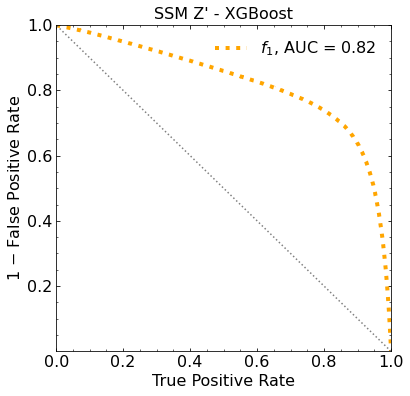


 ########################################

ML iteration  7


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68538	validation_1-logloss:0.68557
[1]	validation_0-logloss:0.67894	validation_1-logloss:0.67928
[2]	validation_0-logloss:0.67370	validation_1-logloss:0.67397
[3]	validation_0-logloss:0.66839	validation_1-logloss:0.66886
[4]	validation_0-logloss:0.66452	validation_1-logloss:0.66509
[5]	validation_0-logloss:0.66129	validation_1-logloss:0.66195
[6]	validation_0-logloss:0.65836	validation_1-logloss:0.65916
[7]	validation_0-logloss:0.65561	validation_1-logloss:0.65642
[8]	validation_0-logloss:0.65304	validation_1-logloss:0.65387
[9]	validation_0-logloss:0.65056	validation_1-logloss:0.65155
[10]	validation_0-logloss:0.64831	validation_1-logloss:0.64936
[11]	validation_0-logloss:0.64517	validation_1-logloss:0.64637
[12]	validation_0-logloss:0.64374	validation_1-logloss:0.64496
[13]	validation_0-logloss:0.64133	validation_1-logloss:0.64266
[14]	validation_0-logloss:0.64030	validation_1-logloss:0.64170
[15]	validation_0-logloss:0.63874	validation_1-logloss:0.64029
[1

[130]	validation_0-logloss:0.56204	validation_1-logloss:0.56933
[131]	validation_0-logloss:0.56159	validation_1-logloss:0.56895
[132]	validation_0-logloss:0.56116	validation_1-logloss:0.56854
[133]	validation_0-logloss:0.56068	validation_1-logloss:0.56807
[134]	validation_0-logloss:0.56035	validation_1-logloss:0.56776
[135]	validation_0-logloss:0.56000	validation_1-logloss:0.56743
[136]	validation_0-logloss:0.55980	validation_1-logloss:0.56726
[137]	validation_0-logloss:0.55915	validation_1-logloss:0.56665
[138]	validation_0-logloss:0.55858	validation_1-logloss:0.56613
[139]	validation_0-logloss:0.55832	validation_1-logloss:0.56591
[140]	validation_0-logloss:0.55801	validation_1-logloss:0.56563
[141]	validation_0-logloss:0.55778	validation_1-logloss:0.56544
[142]	validation_0-logloss:0.55721	validation_1-logloss:0.56489
[143]	validation_0-logloss:0.55707	validation_1-logloss:0.56479
[144]	validation_0-logloss:0.55679	validation_1-logloss:0.56454
[145]	validation_0-logloss:0.55651	valid

[259]	validation_0-logloss:0.52882	validation_1-logloss:0.54005
[260]	validation_0-logloss:0.52871	validation_1-logloss:0.53996
[261]	validation_0-logloss:0.52861	validation_1-logloss:0.53989
[262]	validation_0-logloss:0.52854	validation_1-logloss:0.53983
[263]	validation_0-logloss:0.52848	validation_1-logloss:0.53981
[264]	validation_0-logloss:0.52794	validation_1-logloss:0.53930
[265]	validation_0-logloss:0.52785	validation_1-logloss:0.53924
[266]	validation_0-logloss:0.52780	validation_1-logloss:0.53921
[267]	validation_0-logloss:0.52766	validation_1-logloss:0.53911
[268]	validation_0-logloss:0.52760	validation_1-logloss:0.53907
[269]	validation_0-logloss:0.52755	validation_1-logloss:0.53905
[270]	validation_0-logloss:0.52751	validation_1-logloss:0.53903
[271]	validation_0-logloss:0.52709	validation_1-logloss:0.53861
[272]	validation_0-logloss:0.52704	validation_1-logloss:0.53858
[273]	validation_0-logloss:0.52700	validation_1-logloss:0.53855
[274]	validation_0-logloss:0.52681	valid

[388]	validation_0-logloss:0.51395	validation_1-logloss:0.52850
[389]	validation_0-logloss:0.51392	validation_1-logloss:0.52848
[390]	validation_0-logloss:0.51389	validation_1-logloss:0.52848
[391]	validation_0-logloss:0.51360	validation_1-logloss:0.52821
[392]	validation_0-logloss:0.51350	validation_1-logloss:0.52815
[393]	validation_0-logloss:0.51344	validation_1-logloss:0.52811
[394]	validation_0-logloss:0.51341	validation_1-logloss:0.52810
[395]	validation_0-logloss:0.51339	validation_1-logloss:0.52810
[396]	validation_0-logloss:0.51336	validation_1-logloss:0.52810
[397]	validation_0-logloss:0.51326	validation_1-logloss:0.52803
[398]	validation_0-logloss:0.51324	validation_1-logloss:0.52803
[399]	validation_0-logloss:0.51322	validation_1-logloss:0.52803
[400]	validation_0-logloss:0.51320	validation_1-logloss:0.52803
[401]	validation_0-logloss:0.51319	validation_1-logloss:0.52803
[402]	validation_0-logloss:0.51317	validation_1-logloss:0.52803
[403]	validation_0-logloss:0.51313	valid

[517]	validation_0-logloss:0.50543	validation_1-logloss:0.52293
[518]	validation_0-logloss:0.50540	validation_1-logloss:0.52294
[519]	validation_0-logloss:0.50492	validation_1-logloss:0.52246
[520]	validation_0-logloss:0.50473	validation_1-logloss:0.52232
[521]	validation_0-logloss:0.50470	validation_1-logloss:0.52233
[522]	validation_0-logloss:0.50465	validation_1-logloss:0.52233
[523]	validation_0-logloss:0.50462	validation_1-logloss:0.52233
[524]	validation_0-logloss:0.50458	validation_1-logloss:0.52230
[525]	validation_0-logloss:0.50454	validation_1-logloss:0.52228
[526]	validation_0-logloss:0.50453	validation_1-logloss:0.52229
[527]	validation_0-logloss:0.50410	validation_1-logloss:0.52189
[528]	validation_0-logloss:0.50400	validation_1-logloss:0.52183
[529]	validation_0-logloss:0.50390	validation_1-logloss:0.52177
[530]	validation_0-logloss:0.50385	validation_1-logloss:0.52174
[531]	validation_0-logloss:0.50380	validation_1-logloss:0.52172
[532]	validation_0-logloss:0.50378	valid

[646]	validation_0-logloss:0.49733	validation_1-logloss:0.51800
[647]	validation_0-logloss:0.49729	validation_1-logloss:0.51798
[648]	validation_0-logloss:0.49729	validation_1-logloss:0.51798
[649]	validation_0-logloss:0.49727	validation_1-logloss:0.51798
[650]	validation_0-logloss:0.49723	validation_1-logloss:0.51797
[651]	validation_0-logloss:0.49719	validation_1-logloss:0.51796
[652]	validation_0-logloss:0.49711	validation_1-logloss:0.51790
[653]	validation_0-logloss:0.49708	validation_1-logloss:0.51791
[654]	validation_0-logloss:0.49681	validation_1-logloss:0.51765
[655]	validation_0-logloss:0.49679	validation_1-logloss:0.51765
[656]	validation_0-logloss:0.49678	validation_1-logloss:0.51765
[657]	validation_0-logloss:0.49678	validation_1-logloss:0.51765
[658]	validation_0-logloss:0.49676	validation_1-logloss:0.51765
[659]	validation_0-logloss:0.49653	validation_1-logloss:0.51744
[660]	validation_0-logloss:0.49624	validation_1-logloss:0.51718
[661]	validation_0-logloss:0.49622	valid

[775]	validation_0-logloss:0.49167	validation_1-logloss:0.51498
[776]	validation_0-logloss:0.49166	validation_1-logloss:0.51498
[777]	validation_0-logloss:0.49163	validation_1-logloss:0.51497
[778]	validation_0-logloss:0.49162	validation_1-logloss:0.51498
[779]	validation_0-logloss:0.49161	validation_1-logloss:0.51498
[780]	validation_0-logloss:0.49159	validation_1-logloss:0.51499
[781]	validation_0-logloss:0.49157	validation_1-logloss:0.51498
[782]	validation_0-logloss:0.49155	validation_1-logloss:0.51499
[783]	validation_0-logloss:0.49147	validation_1-logloss:0.51493
[784]	validation_0-logloss:0.49144	validation_1-logloss:0.51493
[785]	validation_0-logloss:0.49143	validation_1-logloss:0.51492
[786]	validation_0-logloss:0.49142	validation_1-logloss:0.51492
[787]	validation_0-logloss:0.49141	validation_1-logloss:0.51492
[788]	validation_0-logloss:0.49139	validation_1-logloss:0.51493
[789]	validation_0-logloss:0.49134	validation_1-logloss:0.51491
[790]	validation_0-logloss:0.49129	valid

[904]	validation_0-logloss:0.48607	validation_1-logloss:0.51233
[905]	validation_0-logloss:0.48601	validation_1-logloss:0.51229
[906]	validation_0-logloss:0.48596	validation_1-logloss:0.51227
[907]	validation_0-logloss:0.48595	validation_1-logloss:0.51227
[908]	validation_0-logloss:0.48593	validation_1-logloss:0.51227
[909]	validation_0-logloss:0.48589	validation_1-logloss:0.51224
[910]	validation_0-logloss:0.48588	validation_1-logloss:0.51224
[911]	validation_0-logloss:0.48584	validation_1-logloss:0.51224
[912]	validation_0-logloss:0.48580	validation_1-logloss:0.51224
[913]	validation_0-logloss:0.48578	validation_1-logloss:0.51224
[914]	validation_0-logloss:0.48578	validation_1-logloss:0.51224
[915]	validation_0-logloss:0.48577	validation_1-logloss:0.51224
[916]	validation_0-logloss:0.48576	validation_1-logloss:0.51225
[917]	validation_0-logloss:0.48573	validation_1-logloss:0.51225
[918]	validation_0-logloss:0.48573	validation_1-logloss:0.51225
[919]	validation_0-logloss:0.48563	valid

[1032]	validation_0-logloss:0.48133	validation_1-logloss:0.51058
[1033]	validation_0-logloss:0.48127	validation_1-logloss:0.51054
[1034]	validation_0-logloss:0.48123	validation_1-logloss:0.51053
[1035]	validation_0-logloss:0.48108	validation_1-logloss:0.51042
[1036]	validation_0-logloss:0.48107	validation_1-logloss:0.51043
[1037]	validation_0-logloss:0.48105	validation_1-logloss:0.51043
[1038]	validation_0-logloss:0.48089	validation_1-logloss:0.51031
[1039]	validation_0-logloss:0.48082	validation_1-logloss:0.51027
[1040]	validation_0-logloss:0.48079	validation_1-logloss:0.51026
[1041]	validation_0-logloss:0.48077	validation_1-logloss:0.51026
[1042]	validation_0-logloss:0.48075	validation_1-logloss:0.51026
[1043]	validation_0-logloss:0.48071	validation_1-logloss:0.51026
[1044]	validation_0-logloss:0.48070	validation_1-logloss:0.51026
[1045]	validation_0-logloss:0.48069	validation_1-logloss:0.51026
[1046]	validation_0-logloss:0.48067	validation_1-logloss:0.51026
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.47637	validation_1-logloss:0.50853
[1160]	validation_0-logloss:0.47635	validation_1-logloss:0.50853
[1161]	validation_0-logloss:0.47632	validation_1-logloss:0.50852
[1162]	validation_0-logloss:0.47629	validation_1-logloss:0.50852
[1163]	validation_0-logloss:0.47628	validation_1-logloss:0.50852
[1164]	validation_0-logloss:0.47617	validation_1-logloss:0.50843
[1165]	validation_0-logloss:0.47613	validation_1-logloss:0.50843
[1166]	validation_0-logloss:0.47611	validation_1-logloss:0.50843
[1167]	validation_0-logloss:0.47609	validation_1-logloss:0.50843
[1168]	validation_0-logloss:0.47607	validation_1-logloss:0.50843
[1169]	validation_0-logloss:0.47599	validation_1-logloss:0.50837
[1170]	validation_0-logloss:0.47596	validation_1-logloss:0.50837
[1171]	validation_0-logloss:0.47593	validation_1-logloss:0.50835
[1172]	validation_0-logloss:0.47591	validation_1-logloss:0.50834
[1173]	validation_0-logloss:0.47590	validation_1-logloss:0.50835
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.47208	validation_1-logloss:0.50707
[1287]	validation_0-logloss:0.47205	validation_1-logloss:0.50706
[1288]	validation_0-logloss:0.47203	validation_1-logloss:0.50707
[1289]	validation_0-logloss:0.47196	validation_1-logloss:0.50702
[1290]	validation_0-logloss:0.47195	validation_1-logloss:0.50702
[1291]	validation_0-logloss:0.47188	validation_1-logloss:0.50698
[1292]	validation_0-logloss:0.47187	validation_1-logloss:0.50699
[1293]	validation_0-logloss:0.47186	validation_1-logloss:0.50698
[1294]	validation_0-logloss:0.47184	validation_1-logloss:0.50698
[1295]	validation_0-logloss:0.47174	validation_1-logloss:0.50690
[1296]	validation_0-logloss:0.47167	validation_1-logloss:0.50687
[1297]	validation_0-logloss:0.47165	validation_1-logloss:0.50686
[1298]	validation_0-logloss:0.47161	validation_1-logloss:0.50684
[1299]	validation_0-logloss:0.47160	validation_1-logloss:0.50684
[1300]	validation_0-logloss:0.47158	validation_1-logloss:0.50684
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.46775	validation_1-logloss:0.50591
[1414]	validation_0-logloss:0.46773	validation_1-logloss:0.50591
[1415]	validation_0-logloss:0.46769	validation_1-logloss:0.50590
[1416]	validation_0-logloss:0.46768	validation_1-logloss:0.50591
[1417]	validation_0-logloss:0.46767	validation_1-logloss:0.50590
[1418]	validation_0-logloss:0.46764	validation_1-logloss:0.50590
[1419]	validation_0-logloss:0.46761	validation_1-logloss:0.50589
[1420]	validation_0-logloss:0.46756	validation_1-logloss:0.50587
[1421]	validation_0-logloss:0.46755	validation_1-logloss:0.50587
[1422]	validation_0-logloss:0.46753	validation_1-logloss:0.50588
[1423]	validation_0-logloss:0.46748	validation_1-logloss:0.50585
[1424]	validation_0-logloss:0.46742	validation_1-logloss:0.50582
[1425]	validation_0-logloss:0.46741	validation_1-logloss:0.50582
[1426]	validation_0-logloss:0.46738	validation_1-logloss:0.50580
[1427]	validation_0-logloss:0.46734	validation_1-logloss:0.50578
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.46370	validation_1-logloss:0.50482
[1541]	validation_0-logloss:0.46367	validation_1-logloss:0.50482
[1542]	validation_0-logloss:0.46363	validation_1-logloss:0.50482
[1543]	validation_0-logloss:0.46360	validation_1-logloss:0.50481
[1544]	validation_0-logloss:0.46359	validation_1-logloss:0.50481
[1545]	validation_0-logloss:0.46358	validation_1-logloss:0.50481
[1546]	validation_0-logloss:0.46357	validation_1-logloss:0.50481
[1547]	validation_0-logloss:0.46355	validation_1-logloss:0.50482
[1548]	validation_0-logloss:0.46353	validation_1-logloss:0.50482
[1549]	validation_0-logloss:0.46350	validation_1-logloss:0.50481
[1550]	validation_0-logloss:0.46349	validation_1-logloss:0.50481
[1551]	validation_0-logloss:0.46346	validation_1-logloss:0.50482
[1552]	validation_0-logloss:0.46345	validation_1-logloss:0.50482
[1553]	validation_0-logloss:0.46343	validation_1-logloss:0.50483
[1554]	validation_0-logloss:0.46339	validation_1-logloss:0.50481
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.46049	validation_1-logloss:0.50447
[1668]	validation_0-logloss:0.46047	validation_1-logloss:0.50448
[1669]	validation_0-logloss:0.46043	validation_1-logloss:0.50446
[1670]	validation_0-logloss:0.46041	validation_1-logloss:0.50447
[1671]	validation_0-logloss:0.46040	validation_1-logloss:0.50447
[1672]	validation_0-logloss:0.46037	validation_1-logloss:0.50446
[1673]	validation_0-logloss:0.46035	validation_1-logloss:0.50446
[1674]	validation_0-logloss:0.46033	validation_1-logloss:0.50446
[1675]	validation_0-logloss:0.46030	validation_1-logloss:0.50446
[1676]	validation_0-logloss:0.46028	validation_1-logloss:0.50446
[1677]	validation_0-logloss:0.46018	validation_1-logloss:0.50442
[1678]	validation_0-logloss:0.46015	validation_1-logloss:0.50443
[1679]	validation_0-logloss:0.46011	validation_1-logloss:0.50443
[1680]	validation_0-logloss:0.46008	validation_1-logloss:0.50441
[1681]	validation_0-logloss:0.46006	validation_1-logloss:0.50441
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.45706	validation_1-logloss:0.50391
[1795]	validation_0-logloss:0.45703	validation_1-logloss:0.50391
[1796]	validation_0-logloss:0.45700	validation_1-logloss:0.50391
[1797]	validation_0-logloss:0.45697	validation_1-logloss:0.50392
[1798]	validation_0-logloss:0.45693	validation_1-logloss:0.50391
[1799]	validation_0-logloss:0.45690	validation_1-logloss:0.50390
[1800]	validation_0-logloss:0.45689	validation_1-logloss:0.50390
[1801]	validation_0-logloss:0.45687	validation_1-logloss:0.50390
[1802]	validation_0-logloss:0.45684	validation_1-logloss:0.50390
[1803]	validation_0-logloss:0.45682	validation_1-logloss:0.50390
[1804]	validation_0-logloss:0.45680	validation_1-logloss:0.50390
[1805]	validation_0-logloss:0.45676	validation_1-logloss:0.50389
[1806]	validation_0-logloss:0.45671	validation_1-logloss:0.50387
[1807]	validation_0-logloss:0.45666	validation_1-logloss:0.50385
[1808]	validation_0-logloss:0.45662	validation_1-logloss:0.50384
[1809]	validation_0-loglo

[1921]	validation_0-logloss:0.45364	validation_1-logloss:0.50342
[1922]	validation_0-logloss:0.45363	validation_1-logloss:0.50343
[1923]	validation_0-logloss:0.45361	validation_1-logloss:0.50343
[1924]	validation_0-logloss:0.45358	validation_1-logloss:0.50343
[1925]	validation_0-logloss:0.45356	validation_1-logloss:0.50343
[1926]	validation_0-logloss:0.45354	validation_1-logloss:0.50344
[1927]	validation_0-logloss:0.45353	validation_1-logloss:0.50344
[1928]	validation_0-logloss:0.45350	validation_1-logloss:0.50343
[1929]	validation_0-logloss:0.45349	validation_1-logloss:0.50343
[1930]	validation_0-logloss:0.45349	validation_1-logloss:0.50344
[1931]	validation_0-logloss:0.45348	validation_1-logloss:0.50345
[1932]	validation_0-logloss:0.45346	validation_1-logloss:0.50344
[1933]	validation_0-logloss:0.45345	validation_1-logloss:0.50344
[1934]	validation_0-logloss:0.45342	validation_1-logloss:0.50344
[1935]	validation_0-logloss:0.45339	validation_1-logloss:0.50344
[1936]	validation_0-loglo

[2048]	validation_0-logloss:0.45059	validation_1-logloss:0.50305
[2049]	validation_0-logloss:0.45055	validation_1-logloss:0.50304
[2050]	validation_0-logloss:0.45053	validation_1-logloss:0.50304
[2051]	validation_0-logloss:0.45051	validation_1-logloss:0.50304
[2052]	validation_0-logloss:0.45043	validation_1-logloss:0.50300
[2053]	validation_0-logloss:0.45040	validation_1-logloss:0.50300
[2054]	validation_0-logloss:0.45037	validation_1-logloss:0.50299
[2055]	validation_0-logloss:0.45036	validation_1-logloss:0.50299
[2056]	validation_0-logloss:0.45033	validation_1-logloss:0.50299
[2057]	validation_0-logloss:0.45030	validation_1-logloss:0.50298
[2058]	validation_0-logloss:0.45022	validation_1-logloss:0.50293
[2059]	validation_0-logloss:0.45019	validation_1-logloss:0.50293
[2060]	validation_0-logloss:0.45016	validation_1-logloss:0.50291
[2061]	validation_0-logloss:0.45012	validation_1-logloss:0.50291
[2062]	validation_0-logloss:0.45012	validation_1-logloss:0.50291
[2063]	validation_0-loglo

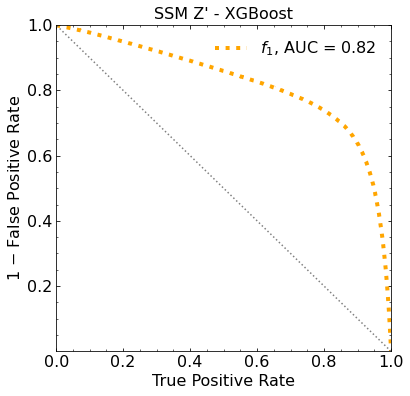


 ########################################

ML iteration  8


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68344	validation_1-logloss:0.68366
[1]	validation_0-logloss:0.67550	validation_1-logloss:0.67570
[2]	validation_0-logloss:0.66999	validation_1-logloss:0.67038
[3]	validation_0-logloss:0.66570	validation_1-logloss:0.66616
[4]	validation_0-logloss:0.66181	validation_1-logloss:0.66235
[5]	validation_0-logloss:0.65863	validation_1-logloss:0.65915
[6]	validation_0-logloss:0.65553	validation_1-logloss:0.65624
[7]	validation_0-logloss:0.65293	validation_1-logloss:0.65364
[8]	validation_0-logloss:0.65042	validation_1-logloss:0.65118
[9]	validation_0-logloss:0.64836	validation_1-logloss:0.64917
[10]	validation_0-logloss:0.64663	validation_1-logloss:0.64748
[11]	validation_0-logloss:0.64472	validation_1-logloss:0.64564
[12]	validation_0-logloss:0.64292	validation_1-logloss:0.64397
[13]	validation_0-logloss:0.64074	validation_1-logloss:0.64182
[14]	validation_0-logloss:0.63973	validation_1-logloss:0.64089
[15]	validation_0-logloss:0.63852	validation_1-logloss:0.63972
[1

[130]	validation_0-logloss:0.56421	validation_1-logloss:0.57085
[131]	validation_0-logloss:0.56326	validation_1-logloss:0.56994
[132]	validation_0-logloss:0.56304	validation_1-logloss:0.56977
[133]	validation_0-logloss:0.56277	validation_1-logloss:0.56952
[134]	validation_0-logloss:0.56242	validation_1-logloss:0.56920
[135]	validation_0-logloss:0.56180	validation_1-logloss:0.56864
[136]	validation_0-logloss:0.56121	validation_1-logloss:0.56808
[137]	validation_0-logloss:0.56103	validation_1-logloss:0.56794
[138]	validation_0-logloss:0.56016	validation_1-logloss:0.56713
[139]	validation_0-logloss:0.55996	validation_1-logloss:0.56697
[140]	validation_0-logloss:0.55951	validation_1-logloss:0.56656
[141]	validation_0-logloss:0.55936	validation_1-logloss:0.56645
[142]	validation_0-logloss:0.55919	validation_1-logloss:0.56632
[143]	validation_0-logloss:0.55891	validation_1-logloss:0.56609
[144]	validation_0-logloss:0.55880	validation_1-logloss:0.56601
[145]	validation_0-logloss:0.55858	valid

[259]	validation_0-logloss:0.53109	validation_1-logloss:0.54154
[260]	validation_0-logloss:0.53049	validation_1-logloss:0.54098
[261]	validation_0-logloss:0.53034	validation_1-logloss:0.54087
[262]	validation_0-logloss:0.53021	validation_1-logloss:0.54077
[263]	validation_0-logloss:0.53016	validation_1-logloss:0.54074
[264]	validation_0-logloss:0.53010	validation_1-logloss:0.54070
[265]	validation_0-logloss:0.52998	validation_1-logloss:0.54061
[266]	validation_0-logloss:0.52991	validation_1-logloss:0.54056
[267]	validation_0-logloss:0.52985	validation_1-logloss:0.54053
[268]	validation_0-logloss:0.52946	validation_1-logloss:0.54016
[269]	validation_0-logloss:0.52931	validation_1-logloss:0.54003
[270]	validation_0-logloss:0.52922	validation_1-logloss:0.53997
[271]	validation_0-logloss:0.52919	validation_1-logloss:0.53995
[272]	validation_0-logloss:0.52897	validation_1-logloss:0.53976
[273]	validation_0-logloss:0.52888	validation_1-logloss:0.53969
[274]	validation_0-logloss:0.52883	valid

[388]	validation_0-logloss:0.51604	validation_1-logloss:0.52992
[389]	validation_0-logloss:0.51589	validation_1-logloss:0.52980
[390]	validation_0-logloss:0.51585	validation_1-logloss:0.52977
[391]	validation_0-logloss:0.51579	validation_1-logloss:0.52975
[392]	validation_0-logloss:0.51542	validation_1-logloss:0.52940
[393]	validation_0-logloss:0.51537	validation_1-logloss:0.52939
[394]	validation_0-logloss:0.51530	validation_1-logloss:0.52933
[395]	validation_0-logloss:0.51527	validation_1-logloss:0.52933
[396]	validation_0-logloss:0.51525	validation_1-logloss:0.52933
[397]	validation_0-logloss:0.51521	validation_1-logloss:0.52932
[398]	validation_0-logloss:0.51514	validation_1-logloss:0.52928
[399]	validation_0-logloss:0.51509	validation_1-logloss:0.52924
[400]	validation_0-logloss:0.51493	validation_1-logloss:0.52911
[401]	validation_0-logloss:0.51483	validation_1-logloss:0.52904
[402]	validation_0-logloss:0.51470	validation_1-logloss:0.52893
[403]	validation_0-logloss:0.51465	valid

[517]	validation_0-logloss:0.50753	validation_1-logloss:0.52439
[518]	validation_0-logloss:0.50752	validation_1-logloss:0.52440
[519]	validation_0-logloss:0.50751	validation_1-logloss:0.52440
[520]	validation_0-logloss:0.50748	validation_1-logloss:0.52439
[521]	validation_0-logloss:0.50745	validation_1-logloss:0.52438
[522]	validation_0-logloss:0.50740	validation_1-logloss:0.52438
[523]	validation_0-logloss:0.50735	validation_1-logloss:0.52435
[524]	validation_0-logloss:0.50733	validation_1-logloss:0.52434
[525]	validation_0-logloss:0.50730	validation_1-logloss:0.52433
[526]	validation_0-logloss:0.50727	validation_1-logloss:0.52433
[527]	validation_0-logloss:0.50720	validation_1-logloss:0.52430
[528]	validation_0-logloss:0.50708	validation_1-logloss:0.52421
[529]	validation_0-logloss:0.50705	validation_1-logloss:0.52420
[530]	validation_0-logloss:0.50692	validation_1-logloss:0.52410
[531]	validation_0-logloss:0.50689	validation_1-logloss:0.52409
[532]	validation_0-logloss:0.50684	valid

[646]	validation_0-logloss:0.49851	validation_1-logloss:0.51869
[647]	validation_0-logloss:0.49848	validation_1-logloss:0.51868
[648]	validation_0-logloss:0.49844	validation_1-logloss:0.51867
[649]	validation_0-logloss:0.49844	validation_1-logloss:0.51867
[650]	validation_0-logloss:0.49842	validation_1-logloss:0.51867
[651]	validation_0-logloss:0.49840	validation_1-logloss:0.51868
[652]	validation_0-logloss:0.49837	validation_1-logloss:0.51867
[653]	validation_0-logloss:0.49834	validation_1-logloss:0.51866
[654]	validation_0-logloss:0.49831	validation_1-logloss:0.51867
[655]	validation_0-logloss:0.49828	validation_1-logloss:0.51867
[656]	validation_0-logloss:0.49824	validation_1-logloss:0.51867
[657]	validation_0-logloss:0.49821	validation_1-logloss:0.51867
[658]	validation_0-logloss:0.49820	validation_1-logloss:0.51867
[659]	validation_0-logloss:0.49818	validation_1-logloss:0.51867
[660]	validation_0-logloss:0.49814	validation_1-logloss:0.51865
[661]	validation_0-logloss:0.49808	valid

[775]	validation_0-logloss:0.49204	validation_1-logloss:0.51541
[776]	validation_0-logloss:0.49202	validation_1-logloss:0.51541
[777]	validation_0-logloss:0.49199	validation_1-logloss:0.51543
[778]	validation_0-logloss:0.49198	validation_1-logloss:0.51543
[779]	validation_0-logloss:0.49195	validation_1-logloss:0.51543
[780]	validation_0-logloss:0.49192	validation_1-logloss:0.51543
[781]	validation_0-logloss:0.49189	validation_1-logloss:0.51542
[782]	validation_0-logloss:0.49185	validation_1-logloss:0.51541
[783]	validation_0-logloss:0.49184	validation_1-logloss:0.51541
[784]	validation_0-logloss:0.49182	validation_1-logloss:0.51541
[785]	validation_0-logloss:0.49181	validation_1-logloss:0.51542
[786]	validation_0-logloss:0.49179	validation_1-logloss:0.51542
[787]	validation_0-logloss:0.49179	validation_1-logloss:0.51542
[788]	validation_0-logloss:0.49178	validation_1-logloss:0.51543
[789]	validation_0-logloss:0.49177	validation_1-logloss:0.51541
[790]	validation_0-logloss:0.49173	valid

[904]	validation_0-logloss:0.48767	validation_1-logloss:0.51389
[905]	validation_0-logloss:0.48765	validation_1-logloss:0.51390
[906]	validation_0-logloss:0.48760	validation_1-logloss:0.51388
[907]	validation_0-logloss:0.48756	validation_1-logloss:0.51386
[908]	validation_0-logloss:0.48751	validation_1-logloss:0.51383
[909]	validation_0-logloss:0.48747	validation_1-logloss:0.51382
[910]	validation_0-logloss:0.48745	validation_1-logloss:0.51383
[911]	validation_0-logloss:0.48744	validation_1-logloss:0.51383
[912]	validation_0-logloss:0.48741	validation_1-logloss:0.51382
[913]	validation_0-logloss:0.48739	validation_1-logloss:0.51382
[914]	validation_0-logloss:0.48717	validation_1-logloss:0.51366
[915]	validation_0-logloss:0.48713	validation_1-logloss:0.51363
[916]	validation_0-logloss:0.48707	validation_1-logloss:0.51360
[917]	validation_0-logloss:0.48702	validation_1-logloss:0.51358
[918]	validation_0-logloss:0.48700	validation_1-logloss:0.51358
[919]	validation_0-logloss:0.48696	valid

[1032]	validation_0-logloss:0.48164	validation_1-logloss:0.51101
[1033]	validation_0-logloss:0.48163	validation_1-logloss:0.51101
[1034]	validation_0-logloss:0.48159	validation_1-logloss:0.51100
[1035]	validation_0-logloss:0.48158	validation_1-logloss:0.51100
[1036]	validation_0-logloss:0.48157	validation_1-logloss:0.51100
[1037]	validation_0-logloss:0.48154	validation_1-logloss:0.51098
[1038]	validation_0-logloss:0.48151	validation_1-logloss:0.51097
[1039]	validation_0-logloss:0.48148	validation_1-logloss:0.51097
[1040]	validation_0-logloss:0.48146	validation_1-logloss:0.51096
[1041]	validation_0-logloss:0.48144	validation_1-logloss:0.51097
[1042]	validation_0-logloss:0.48143	validation_1-logloss:0.51097
[1043]	validation_0-logloss:0.48141	validation_1-logloss:0.51097
[1044]	validation_0-logloss:0.48140	validation_1-logloss:0.51097
[1045]	validation_0-logloss:0.48139	validation_1-logloss:0.51098
[1046]	validation_0-logloss:0.48137	validation_1-logloss:0.51098
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.47674	validation_1-logloss:0.50898
[1160]	validation_0-logloss:0.47671	validation_1-logloss:0.50898
[1161]	validation_0-logloss:0.47667	validation_1-logloss:0.50896
[1162]	validation_0-logloss:0.47666	validation_1-logloss:0.50897
[1163]	validation_0-logloss:0.47662	validation_1-logloss:0.50895
[1164]	validation_0-logloss:0.47660	validation_1-logloss:0.50895
[1165]	validation_0-logloss:0.47656	validation_1-logloss:0.50893
[1166]	validation_0-logloss:0.47651	validation_1-logloss:0.50889
[1167]	validation_0-logloss:0.47650	validation_1-logloss:0.50890
[1168]	validation_0-logloss:0.47643	validation_1-logloss:0.50888
[1169]	validation_0-logloss:0.47642	validation_1-logloss:0.50887
[1170]	validation_0-logloss:0.47638	validation_1-logloss:0.50886
[1171]	validation_0-logloss:0.47637	validation_1-logloss:0.50886
[1172]	validation_0-logloss:0.47637	validation_1-logloss:0.50887
[1173]	validation_0-logloss:0.47636	validation_1-logloss:0.50887
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.47218	validation_1-logloss:0.50743
[1287]	validation_0-logloss:0.47217	validation_1-logloss:0.50744
[1288]	validation_0-logloss:0.47210	validation_1-logloss:0.50741
[1289]	validation_0-logloss:0.47209	validation_1-logloss:0.50741
[1290]	validation_0-logloss:0.47206	validation_1-logloss:0.50740
[1291]	validation_0-logloss:0.47203	validation_1-logloss:0.50740
[1292]	validation_0-logloss:0.47199	validation_1-logloss:0.50740
[1293]	validation_0-logloss:0.47195	validation_1-logloss:0.50738
[1294]	validation_0-logloss:0.47191	validation_1-logloss:0.50736
[1295]	validation_0-logloss:0.47190	validation_1-logloss:0.50736
[1296]	validation_0-logloss:0.47188	validation_1-logloss:0.50737
[1297]	validation_0-logloss:0.47183	validation_1-logloss:0.50735
[1298]	validation_0-logloss:0.47179	validation_1-logloss:0.50735
[1299]	validation_0-logloss:0.47173	validation_1-logloss:0.50731
[1300]	validation_0-logloss:0.47169	validation_1-logloss:0.50729
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.46812	validation_1-logloss:0.50630
[1414]	validation_0-logloss:0.46804	validation_1-logloss:0.50626
[1415]	validation_0-logloss:0.46802	validation_1-logloss:0.50626
[1416]	validation_0-logloss:0.46799	validation_1-logloss:0.50624
[1417]	validation_0-logloss:0.46789	validation_1-logloss:0.50618
[1418]	validation_0-logloss:0.46785	validation_1-logloss:0.50618
[1419]	validation_0-logloss:0.46784	validation_1-logloss:0.50618
[1420]	validation_0-logloss:0.46780	validation_1-logloss:0.50618
[1421]	validation_0-logloss:0.46778	validation_1-logloss:0.50617
[1422]	validation_0-logloss:0.46777	validation_1-logloss:0.50617
[1423]	validation_0-logloss:0.46770	validation_1-logloss:0.50614
[1424]	validation_0-logloss:0.46766	validation_1-logloss:0.50614
[1425]	validation_0-logloss:0.46766	validation_1-logloss:0.50615
[1426]	validation_0-logloss:0.46764	validation_1-logloss:0.50615
[1427]	validation_0-logloss:0.46762	validation_1-logloss:0.50615
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.46423	validation_1-logloss:0.50550
[1541]	validation_0-logloss:0.46419	validation_1-logloss:0.50549
[1542]	validation_0-logloss:0.46417	validation_1-logloss:0.50549
[1543]	validation_0-logloss:0.46414	validation_1-logloss:0.50548
[1544]	validation_0-logloss:0.46412	validation_1-logloss:0.50549
[1545]	validation_0-logloss:0.46409	validation_1-logloss:0.50549
[1546]	validation_0-logloss:0.46407	validation_1-logloss:0.50549
[1547]	validation_0-logloss:0.46405	validation_1-logloss:0.50549
[1548]	validation_0-logloss:0.46401	validation_1-logloss:0.50548
[1549]	validation_0-logloss:0.46401	validation_1-logloss:0.50548
[1550]	validation_0-logloss:0.46398	validation_1-logloss:0.50548
[1551]	validation_0-logloss:0.46395	validation_1-logloss:0.50547
[1552]	validation_0-logloss:0.46394	validation_1-logloss:0.50547
[1553]	validation_0-logloss:0.46391	validation_1-logloss:0.50547
[1554]	validation_0-logloss:0.46386	validation_1-logloss:0.50545
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.46079	validation_1-logloss:0.50496
[1668]	validation_0-logloss:0.46077	validation_1-logloss:0.50496
[1669]	validation_0-logloss:0.46077	validation_1-logloss:0.50497
[1670]	validation_0-logloss:0.46076	validation_1-logloss:0.50497
[1671]	validation_0-logloss:0.46076	validation_1-logloss:0.50497
[1672]	validation_0-logloss:0.46075	validation_1-logloss:0.50497
[1673]	validation_0-logloss:0.46071	validation_1-logloss:0.50498
[1674]	validation_0-logloss:0.46067	validation_1-logloss:0.50499


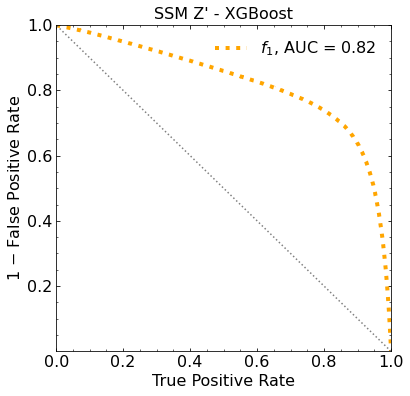


 ########################################

ML iteration  9


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.68561	validation_1-logloss:0.68573
[1]	validation_0-logloss:0.67919	validation_1-logloss:0.67949
[2]	validation_0-logloss:0.67386	validation_1-logloss:0.67409
[3]	validation_0-logloss:0.66957	validation_1-logloss:0.66978
[4]	validation_0-logloss:0.66496	validation_1-logloss:0.66533
[5]	validation_0-logloss:0.66198	validation_1-logloss:0.66228
[6]	validation_0-logloss:0.65910	validation_1-logloss:0.65953
[7]	validation_0-logloss:0.65628	validation_1-logloss:0.65668
[8]	validation_0-logloss:0.65380	validation_1-logloss:0.65430
[9]	validation_0-logloss:0.65138	validation_1-logloss:0.65203
[10]	validation_0-logloss:0.64907	validation_1-logloss:0.64980
[11]	validation_0-logloss:0.64720	validation_1-logloss:0.64801
[12]	validation_0-logloss:0.64575	validation_1-logloss:0.64659
[13]	validation_0-logloss:0.64392	validation_1-logloss:0.64483
[14]	validation_0-logloss:0.64101	validation_1-logloss:0.64198
[15]	validation_0-logloss:0.63907	validation_1-logloss:0.64019
[1

[130]	validation_0-logloss:0.56221	validation_1-logloss:0.56806
[131]	validation_0-logloss:0.56192	validation_1-logloss:0.56781
[132]	validation_0-logloss:0.56100	validation_1-logloss:0.56700
[133]	validation_0-logloss:0.56074	validation_1-logloss:0.56676
[134]	validation_0-logloss:0.56051	validation_1-logloss:0.56655
[135]	validation_0-logloss:0.56029	validation_1-logloss:0.56635
[136]	validation_0-logloss:0.56011	validation_1-logloss:0.56617
[137]	validation_0-logloss:0.55989	validation_1-logloss:0.56599
[138]	validation_0-logloss:0.55976	validation_1-logloss:0.56588
[139]	validation_0-logloss:0.55940	validation_1-logloss:0.56555
[140]	validation_0-logloss:0.55893	validation_1-logloss:0.56514
[141]	validation_0-logloss:0.55871	validation_1-logloss:0.56496
[142]	validation_0-logloss:0.55831	validation_1-logloss:0.56458
[143]	validation_0-logloss:0.55812	validation_1-logloss:0.56443
[144]	validation_0-logloss:0.55787	validation_1-logloss:0.56420
[145]	validation_0-logloss:0.55760	valid

[259]	validation_0-logloss:0.53339	validation_1-logloss:0.54291
[260]	validation_0-logloss:0.53304	validation_1-logloss:0.54258
[261]	validation_0-logloss:0.53294	validation_1-logloss:0.54249
[262]	validation_0-logloss:0.53281	validation_1-logloss:0.54240
[263]	validation_0-logloss:0.53277	validation_1-logloss:0.54238
[264]	validation_0-logloss:0.53270	validation_1-logloss:0.54232
[265]	validation_0-logloss:0.53257	validation_1-logloss:0.54221
[266]	validation_0-logloss:0.53243	validation_1-logloss:0.54209
[267]	validation_0-logloss:0.53224	validation_1-logloss:0.54193
[268]	validation_0-logloss:0.53185	validation_1-logloss:0.54157
[269]	validation_0-logloss:0.53136	validation_1-logloss:0.54112
[270]	validation_0-logloss:0.53121	validation_1-logloss:0.54100
[271]	validation_0-logloss:0.53114	validation_1-logloss:0.54095
[272]	validation_0-logloss:0.53107	validation_1-logloss:0.54090
[273]	validation_0-logloss:0.53097	validation_1-logloss:0.54081
[274]	validation_0-logloss:0.53091	valid

[388]	validation_0-logloss:0.51815	validation_1-logloss:0.53085
[389]	validation_0-logloss:0.51811	validation_1-logloss:0.53084
[390]	validation_0-logloss:0.51801	validation_1-logloss:0.53078
[391]	validation_0-logloss:0.51799	validation_1-logloss:0.53078
[392]	validation_0-logloss:0.51790	validation_1-logloss:0.53072
[393]	validation_0-logloss:0.51782	validation_1-logloss:0.53067
[394]	validation_0-logloss:0.51778	validation_1-logloss:0.53066
[395]	validation_0-logloss:0.51776	validation_1-logloss:0.53065
[396]	validation_0-logloss:0.51772	validation_1-logloss:0.53063
[397]	validation_0-logloss:0.51770	validation_1-logloss:0.53063
[398]	validation_0-logloss:0.51766	validation_1-logloss:0.53062
[399]	validation_0-logloss:0.51764	validation_1-logloss:0.53061
[400]	validation_0-logloss:0.51759	validation_1-logloss:0.53060
[401]	validation_0-logloss:0.51755	validation_1-logloss:0.53059
[402]	validation_0-logloss:0.51752	validation_1-logloss:0.53058
[403]	validation_0-logloss:0.51748	valid

[517]	validation_0-logloss:0.50851	validation_1-logloss:0.52436
[518]	validation_0-logloss:0.50844	validation_1-logloss:0.52432
[519]	validation_0-logloss:0.50841	validation_1-logloss:0.52430
[520]	validation_0-logloss:0.50831	validation_1-logloss:0.52423
[521]	validation_0-logloss:0.50829	validation_1-logloss:0.52423
[522]	validation_0-logloss:0.50825	validation_1-logloss:0.52421
[523]	validation_0-logloss:0.50821	validation_1-logloss:0.52420
[524]	validation_0-logloss:0.50818	validation_1-logloss:0.52421
[525]	validation_0-logloss:0.50779	validation_1-logloss:0.52386
[526]	validation_0-logloss:0.50776	validation_1-logloss:0.52386
[527]	validation_0-logloss:0.50768	validation_1-logloss:0.52380
[528]	validation_0-logloss:0.50727	validation_1-logloss:0.52341
[529]	validation_0-logloss:0.50724	validation_1-logloss:0.52339
[530]	validation_0-logloss:0.50719	validation_1-logloss:0.52338
[531]	validation_0-logloss:0.50716	validation_1-logloss:0.52338
[532]	validation_0-logloss:0.50708	valid

[646]	validation_0-logloss:0.49834	validation_1-logloss:0.51743
[647]	validation_0-logloss:0.49832	validation_1-logloss:0.51743
[648]	validation_0-logloss:0.49829	validation_1-logloss:0.51743
[649]	validation_0-logloss:0.49826	validation_1-logloss:0.51743
[650]	validation_0-logloss:0.49808	validation_1-logloss:0.51729
[651]	validation_0-logloss:0.49801	validation_1-logloss:0.51725
[652]	validation_0-logloss:0.49796	validation_1-logloss:0.51723
[653]	validation_0-logloss:0.49792	validation_1-logloss:0.51722
[654]	validation_0-logloss:0.49785	validation_1-logloss:0.51718
[655]	validation_0-logloss:0.49783	validation_1-logloss:0.51717
[656]	validation_0-logloss:0.49779	validation_1-logloss:0.51717
[657]	validation_0-logloss:0.49777	validation_1-logloss:0.51717
[658]	validation_0-logloss:0.49774	validation_1-logloss:0.51716
[659]	validation_0-logloss:0.49768	validation_1-logloss:0.51713
[660]	validation_0-logloss:0.49761	validation_1-logloss:0.51709
[661]	validation_0-logloss:0.49759	valid

[775]	validation_0-logloss:0.49096	validation_1-logloss:0.51318
[776]	validation_0-logloss:0.49095	validation_1-logloss:0.51318
[777]	validation_0-logloss:0.49079	validation_1-logloss:0.51306
[778]	validation_0-logloss:0.49066	validation_1-logloss:0.51295
[779]	validation_0-logloss:0.49064	validation_1-logloss:0.51295
[780]	validation_0-logloss:0.49062	validation_1-logloss:0.51294
[781]	validation_0-logloss:0.49057	validation_1-logloss:0.51294
[782]	validation_0-logloss:0.49054	validation_1-logloss:0.51292
[783]	validation_0-logloss:0.49052	validation_1-logloss:0.51292
[784]	validation_0-logloss:0.49049	validation_1-logloss:0.51291
[785]	validation_0-logloss:0.49047	validation_1-logloss:0.51290
[786]	validation_0-logloss:0.49044	validation_1-logloss:0.51290
[787]	validation_0-logloss:0.49042	validation_1-logloss:0.51290
[788]	validation_0-logloss:0.49035	validation_1-logloss:0.51286
[789]	validation_0-logloss:0.49032	validation_1-logloss:0.51286
[790]	validation_0-logloss:0.49030	valid

[904]	validation_0-logloss:0.48479	validation_1-logloss:0.50998
[905]	validation_0-logloss:0.48477	validation_1-logloss:0.50998
[906]	validation_0-logloss:0.48470	validation_1-logloss:0.50994
[907]	validation_0-logloss:0.48468	validation_1-logloss:0.50994
[908]	validation_0-logloss:0.48459	validation_1-logloss:0.50988
[909]	validation_0-logloss:0.48457	validation_1-logloss:0.50988
[910]	validation_0-logloss:0.48450	validation_1-logloss:0.50986
[911]	validation_0-logloss:0.48446	validation_1-logloss:0.50985
[912]	validation_0-logloss:0.48443	validation_1-logloss:0.50985
[913]	validation_0-logloss:0.48436	validation_1-logloss:0.50980
[914]	validation_0-logloss:0.48431	validation_1-logloss:0.50979
[915]	validation_0-logloss:0.48424	validation_1-logloss:0.50975
[916]	validation_0-logloss:0.48422	validation_1-logloss:0.50975
[917]	validation_0-logloss:0.48418	validation_1-logloss:0.50975
[918]	validation_0-logloss:0.48406	validation_1-logloss:0.50966
[919]	validation_0-logloss:0.48405	valid

[1032]	validation_0-logloss:0.48070	validation_1-logloss:0.50878
[1033]	validation_0-logloss:0.48067	validation_1-logloss:0.50878
[1034]	validation_0-logloss:0.48062	validation_1-logloss:0.50876
[1035]	validation_0-logloss:0.48058	validation_1-logloss:0.50876
[1036]	validation_0-logloss:0.48055	validation_1-logloss:0.50875
[1037]	validation_0-logloss:0.48051	validation_1-logloss:0.50874
[1038]	validation_0-logloss:0.48043	validation_1-logloss:0.50871
[1039]	validation_0-logloss:0.48040	validation_1-logloss:0.50871
[1040]	validation_0-logloss:0.48036	validation_1-logloss:0.50870
[1041]	validation_0-logloss:0.48032	validation_1-logloss:0.50867
[1042]	validation_0-logloss:0.48027	validation_1-logloss:0.50866
[1043]	validation_0-logloss:0.48018	validation_1-logloss:0.50861
[1044]	validation_0-logloss:0.48012	validation_1-logloss:0.50857
[1045]	validation_0-logloss:0.48010	validation_1-logloss:0.50857
[1046]	validation_0-logloss:0.48006	validation_1-logloss:0.50855
[1047]	validation_0-loglo

[1159]	validation_0-logloss:0.47638	validation_1-logloss:0.50752
[1160]	validation_0-logloss:0.47637	validation_1-logloss:0.50751
[1161]	validation_0-logloss:0.47636	validation_1-logloss:0.50752
[1162]	validation_0-logloss:0.47628	validation_1-logloss:0.50746
[1163]	validation_0-logloss:0.47623	validation_1-logloss:0.50744
[1164]	validation_0-logloss:0.47620	validation_1-logloss:0.50744
[1165]	validation_0-logloss:0.47616	validation_1-logloss:0.50743
[1166]	validation_0-logloss:0.47612	validation_1-logloss:0.50741
[1167]	validation_0-logloss:0.47606	validation_1-logloss:0.50738
[1168]	validation_0-logloss:0.47605	validation_1-logloss:0.50738
[1169]	validation_0-logloss:0.47603	validation_1-logloss:0.50737
[1170]	validation_0-logloss:0.47602	validation_1-logloss:0.50737
[1171]	validation_0-logloss:0.47600	validation_1-logloss:0.50737
[1172]	validation_0-logloss:0.47598	validation_1-logloss:0.50737
[1173]	validation_0-logloss:0.47597	validation_1-logloss:0.50737
[1174]	validation_0-loglo

[1286]	validation_0-logloss:0.47268	validation_1-logloss:0.50661
[1287]	validation_0-logloss:0.47265	validation_1-logloss:0.50661
[1288]	validation_0-logloss:0.47262	validation_1-logloss:0.50661
[1289]	validation_0-logloss:0.47261	validation_1-logloss:0.50662
[1290]	validation_0-logloss:0.47259	validation_1-logloss:0.50661
[1291]	validation_0-logloss:0.47257	validation_1-logloss:0.50662
[1292]	validation_0-logloss:0.47254	validation_1-logloss:0.50661
[1293]	validation_0-logloss:0.47252	validation_1-logloss:0.50661
[1294]	validation_0-logloss:0.47250	validation_1-logloss:0.50661
[1295]	validation_0-logloss:0.47249	validation_1-logloss:0.50661
[1296]	validation_0-logloss:0.47246	validation_1-logloss:0.50660
[1297]	validation_0-logloss:0.47243	validation_1-logloss:0.50661
[1298]	validation_0-logloss:0.47243	validation_1-logloss:0.50661
[1299]	validation_0-logloss:0.47238	validation_1-logloss:0.50658
[1300]	validation_0-logloss:0.47234	validation_1-logloss:0.50657
[1301]	validation_0-loglo

[1413]	validation_0-logloss:0.46953	validation_1-logloss:0.50608
[1414]	validation_0-logloss:0.46951	validation_1-logloss:0.50608
[1415]	validation_0-logloss:0.46948	validation_1-logloss:0.50607
[1416]	validation_0-logloss:0.46947	validation_1-logloss:0.50608
[1417]	validation_0-logloss:0.46946	validation_1-logloss:0.50608
[1418]	validation_0-logloss:0.46943	validation_1-logloss:0.50608
[1419]	validation_0-logloss:0.46942	validation_1-logloss:0.50609
[1420]	validation_0-logloss:0.46939	validation_1-logloss:0.50609
[1421]	validation_0-logloss:0.46938	validation_1-logloss:0.50609
[1422]	validation_0-logloss:0.46936	validation_1-logloss:0.50609
[1423]	validation_0-logloss:0.46934	validation_1-logloss:0.50610
[1424]	validation_0-logloss:0.46932	validation_1-logloss:0.50610
[1425]	validation_0-logloss:0.46930	validation_1-logloss:0.50611
[1426]	validation_0-logloss:0.46929	validation_1-logloss:0.50611
[1427]	validation_0-logloss:0.46927	validation_1-logloss:0.50611
[1428]	validation_0-loglo

[1540]	validation_0-logloss:0.46588	validation_1-logloss:0.50544
[1541]	validation_0-logloss:0.46586	validation_1-logloss:0.50543
[1542]	validation_0-logloss:0.46584	validation_1-logloss:0.50544
[1543]	validation_0-logloss:0.46582	validation_1-logloss:0.50543
[1544]	validation_0-logloss:0.46574	validation_1-logloss:0.50540
[1545]	validation_0-logloss:0.46568	validation_1-logloss:0.50536
[1546]	validation_0-logloss:0.46566	validation_1-logloss:0.50536
[1547]	validation_0-logloss:0.46562	validation_1-logloss:0.50535
[1548]	validation_0-logloss:0.46560	validation_1-logloss:0.50535
[1549]	validation_0-logloss:0.46557	validation_1-logloss:0.50536
[1550]	validation_0-logloss:0.46555	validation_1-logloss:0.50536
[1551]	validation_0-logloss:0.46551	validation_1-logloss:0.50534
[1552]	validation_0-logloss:0.46548	validation_1-logloss:0.50534
[1553]	validation_0-logloss:0.46546	validation_1-logloss:0.50533
[1554]	validation_0-logloss:0.46541	validation_1-logloss:0.50531
[1555]	validation_0-loglo

[1667]	validation_0-logloss:0.46233	validation_1-logloss:0.50472
[1668]	validation_0-logloss:0.46232	validation_1-logloss:0.50472
[1669]	validation_0-logloss:0.46230	validation_1-logloss:0.50472
[1670]	validation_0-logloss:0.46229	validation_1-logloss:0.50472
[1671]	validation_0-logloss:0.46226	validation_1-logloss:0.50472
[1672]	validation_0-logloss:0.46225	validation_1-logloss:0.50472
[1673]	validation_0-logloss:0.46223	validation_1-logloss:0.50473
[1674]	validation_0-logloss:0.46221	validation_1-logloss:0.50472
[1675]	validation_0-logloss:0.46220	validation_1-logloss:0.50472
[1676]	validation_0-logloss:0.46214	validation_1-logloss:0.50469
[1677]	validation_0-logloss:0.46212	validation_1-logloss:0.50470
[1678]	validation_0-logloss:0.46211	validation_1-logloss:0.50470
[1679]	validation_0-logloss:0.46206	validation_1-logloss:0.50468
[1680]	validation_0-logloss:0.46205	validation_1-logloss:0.50468
[1681]	validation_0-logloss:0.46201	validation_1-logloss:0.50467
[1682]	validation_0-loglo

[1794]	validation_0-logloss:0.45933	validation_1-logloss:0.50424
[1795]	validation_0-logloss:0.45931	validation_1-logloss:0.50424
[1796]	validation_0-logloss:0.45930	validation_1-logloss:0.50424
[1797]	validation_0-logloss:0.45928	validation_1-logloss:0.50424
[1798]	validation_0-logloss:0.45923	validation_1-logloss:0.50423
[1799]	validation_0-logloss:0.45921	validation_1-logloss:0.50423
[1800]	validation_0-logloss:0.45916	validation_1-logloss:0.50420
[1801]	validation_0-logloss:0.45910	validation_1-logloss:0.50418
[1802]	validation_0-logloss:0.45907	validation_1-logloss:0.50418
[1803]	validation_0-logloss:0.45904	validation_1-logloss:0.50418
[1804]	validation_0-logloss:0.45902	validation_1-logloss:0.50418
[1805]	validation_0-logloss:0.45900	validation_1-logloss:0.50418
[1806]	validation_0-logloss:0.45898	validation_1-logloss:0.50419
[1807]	validation_0-logloss:0.45897	validation_1-logloss:0.50420
[1808]	validation_0-logloss:0.45893	validation_1-logloss:0.50419
[1809]	validation_0-loglo

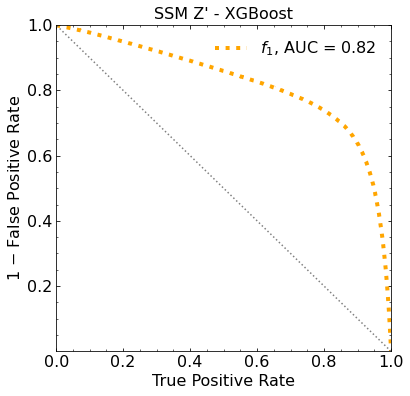


 ########################################



In [14]:
# XGBoost with only the kinematic variables of the leptons

iterations_ML = 10

print('ML iteration 1')

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

# FIT
classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_aux = classifier.predict_proba(X_mon_test).T[1]
y_pred_xg_auxRE = np.reshape(y_pred_xg_aux, (1,len(y_pred_xg_aux)))


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




print('\n ########################################\n')





for it in range(1,iterations_ML):

    print('ML iteration ', it)
    
    # CLASSIFIER
    classifier = XGBClassifier(
        n_estimators=2500,
        learning_rate=0.1,
        reg_lambda=0.0,reg_alpha=0.0,
        gamma=0.0,objective='binary:logistic',
        max_depth=5)

    ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

    # FIT
    classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
            eval_metric='logloss',early_stopping_rounds=50,#early stopping
            verbose=True)

    # PREDICTIONS
    y_pred_xg_aux_it = classifier.predict_proba(X_mon_test).T[1]
    y_pred_xg_auxRE_it = np.reshape(y_pred_xg_aux_it, (1,len(y_pred_xg_aux_it)))
    
    y_pred_xg_auxRE = np.concatenate([y_pred_xg_auxRE,y_pred_xg_auxRE_it])


    # ROC
    fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
    roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


    # PLOT THE ROC WITH AUC
    fig = plt.figure(figsize=(6, 6))
    gs = gridspec.GridSpec(1, 1) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax0.minorticks_on()


    plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
    plt.plot([1,0],[0,1],ls=":",color="grey")
    plt.xlabel("True Positive Rate",fontsize=16)
    plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
    plt.legend()
    plt.title(r"SSM Z' - XGBoost",fontsize=16)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.yticks([0.2,0.4,0.6,0.8,1.])
    plt.legend(frameon=False,fontsize=16)
    plt.show()
    
    print('\n ########################################\n')
    
    
y_pred_xg = np.mean(y_pred_xg_auxRE, axis=0)

Classification score (1ML):


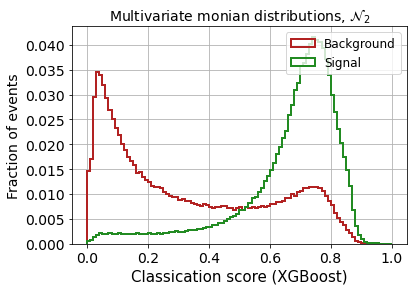

Classification score (10ML):


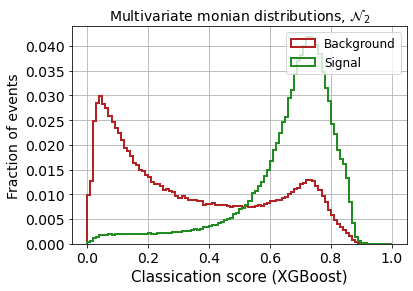

In [15]:
# XGBoost with the kinematic variables of the leptons

########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM_1ML = []
pred_XG_NP_1ML = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM_1ML.append(y_pred_xg_1ML[i])
    else:
        pred_XG_NP_1ML.append(y_pred_xg_1ML[i])
        
        
print('Classification score (1ML):')
        
weights = np.ones_like(pred_XG_SM_1ML)/float(len(pred_XG_SM_1ML))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM_1ML, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP_1ML)/float(len(pred_XG_NP_1ML))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP_1ML, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()




# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score (10ML):')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()


## METHODS

### 0. Ensembles characteristics

In [4]:
##############
# PARAMETERS #
##############

# requested number of ensembles
n_ensembles = 5000

# number of expected background events per ensemble
B_expected = 5000

# ratio S_expected/B_expected (signal ratio)
SB_ratio = [0.0006, 0.001, 0.0016, 0.0025, 0.005, 0.0075, 0.01, 0.025]





# SOME USEFUL DERIVATED PARAMETERS:

# S_expected:
S_expected = [ int(SB_ratio[iii]*B_expected) for iii in range(len(SB_ratio)) ]
print(S_expected)

# S/\sqrt{B}
SsqrtB = [ S_expected[iii]/(B_expected)**0.5 for iii in range(len(SB_ratio)) ]

[2, 5, 8, 12, 25, 37, 50, 125]


### 1. BIN LOG LIKELIHOOD

In [17]:
# 1st variable: invariant mass
background_X_1 = invariant_mass_eeSM
signal_X_1 = invariant_mass_eeSSMZprime

N_B = len(background_X_1)
N_S = len(signal_X_1)

# bins
logbins = [2000.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000.0]

In [18]:
#################################
# BINNED POISSON LOG-LIKELIHOOD #
#################################


store_Z_bins = []
store_Z_bins_logbins = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't use an integer number of possible ensembles
    N_ensembles_back = int(N_B / B_expected)
    N_events_back = N_ensembles_back * B_expected

    N_ensembles_sig = int(N_S / S_expected[iii])
    N_events_sig = N_ensembles_sig * S_expected[iii]


    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=(100), range = [[2000,20000]])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=(100), range = [[2000,20000]])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins.append(Z_bins)

    print('Z_bins : ', Z_bins)
    

    
    ############
    # LOG BINS #
    ############
    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=[logbins])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=[logbins])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins_logbins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_logbins.append(Z_bins_logbins)

    print('Z_bins_logbins : ', Z_bins_logbins)
    
    
    
    print('\n ----------------------------------- \n')


B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins :  0.05010070720593381
Z_bins_logbins :  0.03977746890606302

 ----------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins :  0.12515580193179984
Z_bins_logbins :  0.09940123422316269

 ----------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins :  0.20009619459789946
Z_bins_logbins :  0.15897419797615348

 ----------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
Z_bins :  0.29983939777574353
Z_bins_logbins :  0.23832596567484904

 ----------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
Z_bins :  0.6226157738982655
Z_bins_logbins :  0.4956000191154918

 ----------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
Z_bins :  0.9187051163472822
Z_bins_logbins :  0.732249

In [19]:
print(store_Z_bins)
print(store_Z_bins_logbins)

[0.05010070720593381, 0.12515580193179984, 0.20009619459789946, 0.29983939777574353, 0.6226157738982655, 0.9187051163472822, 1.2374882285790745, 3.0382075927719505]
[0.03977746890606302, 0.09940123422316269, 0.15897419797615348, 0.23832596567484904, 0.4956000191154918, 0.7322498167237955, 0.9877251184457999, 2.443900472141883]


In [5]:
store_Z_bins = [0.05010070720593381, 0.12515580193179984, 0.20009619459789946, 0.29983939777574353, 0.6226157738982655, 0.9187051163472822, 1.2374882285790745, 3.0382075927719505]

store_Z_bins_logbins = [0.03977746890606302, 0.09940123422316269, 0.15897419797615348, 0.23832596567484904, 0.4956000191154918, 0.7322498167237955, 0.9877251184457999, 2.443900472141883]

<ipython-input-6-3340ebf10fa5>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-6-3340ebf10fa5>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')


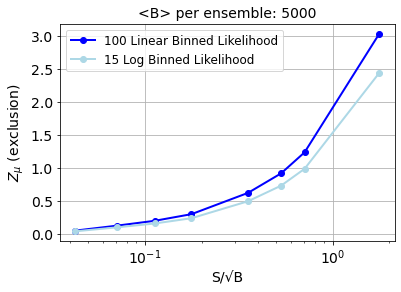

In [6]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 2. Binned OUTPUT and MLL Asimov

In [21]:
#################################
# MLL Asimov-like #
#################################


store_Z_bins_XG = []

store_Z_bins_XG_15bins = []
store_Z_bins_XG_15bins_1ML = []

store_Z_bins_XG_15bins_eq = []
store_Z_bins_XG_15bins_eq_1ML = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't find the number of possible ensembles
    N_ensembles_back = len(pred_XG_SM) / B_expected
    N_ensembles_sig = len(pred_XG_NP) / S_expected[iii]



    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG.append(Z_bins_XG)

    print('Z_bins_XG : ', Z_bins_XG)
    
    
    
    
    
    ######################
    # linear bins, 10 ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins.append(Z_bins_XG_15bins)

    print('Z_bins_XG_15bins : ', Z_bins_XG_15bins)
    
    
    
    
    
    ######################
    # linear bins, 1  ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_1ML.append(Z_bins_XG_15bins_1ML)

    print('Z_bins_XG_15bins_1ML : ', Z_bins_XG_15bins_1ML)
    
    
    
    
    
    ##########################
    # non linear bins, 10 ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq.append(Z_bins_XG_15bins_eq)

    print('Z_bins_XG_15bins_eq : ', Z_bins_XG_15bins_eq)
    
    
    
    
    
    ##########################
    # non linear bins, 1  ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM_1ML)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP_1ML], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq_1ML.append(Z_bins_XG_15bins_eq_1ML)

    print('Z_bins_XG_15bins_eq_1ML : ', Z_bins_XG_15bins_eq_1ML)


        
    print('\n ----------------------------------------- \n')

B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins_XG :  0.04774620225057633
Z_bins_XG_15bins :  0.04754312066328737
Z_bins_XG_15bins_1ML :  0.04696569334349824
Z_bins_XG_15bins_eq :  0.04731118045964027
Z_bins_XG_15bins_eq_1ML :  0.047677351371935794

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins_XG :  0.11928180355178045
Z_bins_XG_15bins :  0.11877588340370283
Z_bins_XG_15bins_1ML :  0.11733847832862113
Z_bins_XG_15bins_eq :  0.11819829172603376
Z_bins_XG_15bins_eq_1ML :  0.11911169030512929

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins_XG :  0.19071733204834793
Z_bins_XG_15bins :  0.18991069401407143
Z_bins_XG_15bins_1ML :  0.18762064504230155
Z_bins_XG_15bins_eq :  0.18899013641096482
Z_bins_XG_15bins_eq_1ML :  0.19044834071058564

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\

In [22]:
print(store_Z_bins_XG)

print(store_Z_bins_XG_15bins)
print(store_Z_bins_XG_15bins_1ML)

print(store_Z_bins_XG_15bins_eq)
print(store_Z_bins_XG_15bins_eq_1ML)

[0.04774620225057633, 0.11928180355178045, 0.19071733204834793, 0.28580974824694116, 0.5936481743557896, 0.8761830341935225, 1.1805331958682095, 2.9027721108198117]
[0.04754312066328737, 0.11877588340370283, 0.18991069401407143, 0.28460541370393594, 0.5911764761913162, 0.8725744916621155, 1.1757273531133356, 2.8916841784117335]
[0.04696569334349824, 0.11733847832862113, 0.18762064504230155, 0.28118979526010873, 0.5841900199217602, 0.8624068218323084, 1.1622331019247096, 2.861198992517668]
[0.04731118045964027, 0.11819829172603376, 0.18899013641096482, 0.2832316976380358, 0.5883618479781636, 0.8684716222960748, 1.1702722965491374, 2.8792187143904524]
[0.047677351371935794, 0.11911169030512929, 0.19044834071058564, 0.28541256619474153, 0.5928622046747336, 0.8750741710497896, 1.179111109012759, 2.900174280512534]


In [7]:
store_Z_bins_XG = [0.04774620225057633, 0.11928180355178045, 0.19071733204834793, 0.28580974824694116, 0.5936481743557896, 0.8761830341935225, 1.1805331958682095, 2.9027721108198117]

store_Z_bins_XG_15bins = [0.04754312066328737, 0.11877588340370283, 0.18991069401407143, 0.28460541370393594, 0.5911764761913162, 0.8725744916621155, 1.1757273531133356, 2.8916841784117335]
store_Z_bins_XG_15bins_1ML = [0.04696569334349824, 0.11733847832862113, 0.18762064504230155, 0.28118979526010873, 0.5841900199217602, 0.8624068218323084, 1.1622331019247096, 2.861198992517668]

store_Z_bins_XG_15bins_eq = [0.04731118045964027, 0.11819829172603376, 0.18899013641096482, 0.2832316976380358, 0.5883618479781636, 0.8684716222960748, 1.1702722965491374, 2.8792187143904524]
store_Z_bins_XG_15bins_eq_1ML = [0.047677351371935794, 0.11911169030512929, 0.19044834071058564, 0.28541256619474153, 0.5928622046747336, 0.8750741710497896, 1.179111109012759, 2.900174280512534]

<ipython-input-8-13c05c382495>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-8-13c05c382495>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)')
<ipython-input-8-13c05c382495>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)')
<ipython-input-8-13c05c382495>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the

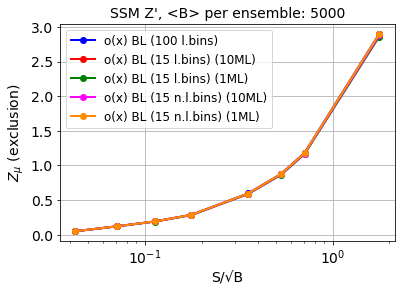

In [8]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



    
    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title("SSM Z', <B> per ensemble: %0.2d" % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 3. MACHINE-LEARNED LIKELIHOOD with KDE

##### For 10 ML

[1.00000000e-03 1.44719254e-03 2.09436625e-03 3.03095122e-03
 4.38637001e-03 6.34792196e-03 9.18666532e-03 1.32948735e-02
 1.92402418e-02 2.78443345e-02 4.02961132e-02 5.83162345e-02
 8.43948197e-02 1.22135554e-01 1.76753662e-01 2.55796582e-01
 3.70186906e-01 5.35731729e-01 7.75306963e-01 1.12201845e+00]


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf           -inf           -inf  2545.36400985
  2533.65407325  2513.9279116   2464.78489472  2360.51061686
  2172.97726662  1855.17709255  1341.8574776    583.95268844
  -441.44980514 -1646.21053578 -2885.88020301 -5148.29887998]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.01329487353451575, kernel='epanechnikov')


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf           -inf           -inf  6686.55570474
  6686.64628677  6680.63603989  6662.12391573  6618.75191277
  6524.33782497  6305.97035635  5803.65357273  4809.57562955
  3226.8070779   1152.35473987 -1343.84664013 -4473.89816169]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.01924024182760239, kernel='epanechnikov')


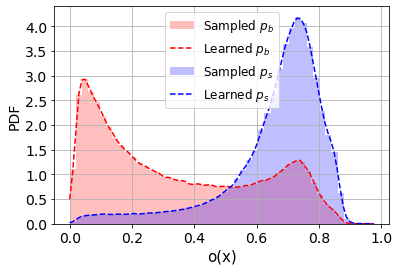


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



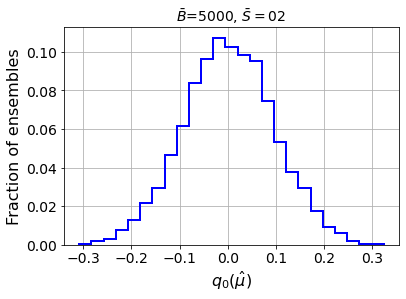

muhat mean:  0.017566715696574912
median q_muhat:  0.002007648027004816
Z_KDE:  0.04480678550180559
Z_KDE mu=0:  0.044761007087298445

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



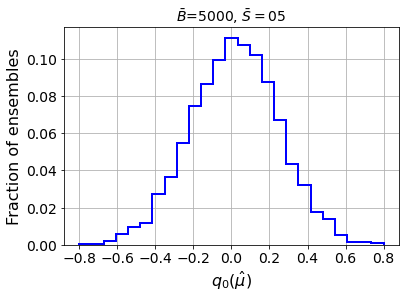

muhat mean:  0.05524490224931681
median q_muhat:  0.019299157587205684
Z_KDE:  0.13892140795142296
Z_KDE mu=0:  0.13892140795142296

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



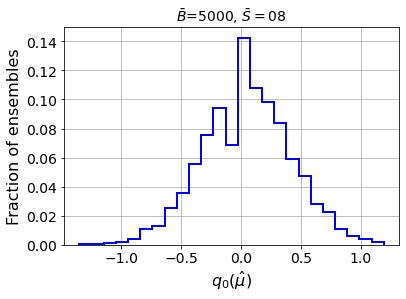

muhat mean:  0.07523649358839604
median q_muhat:  0.04422601775956636
Z_KDE:  0.21029982824426263
Z_KDE mu=0:  0.21029982824426263

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 


 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



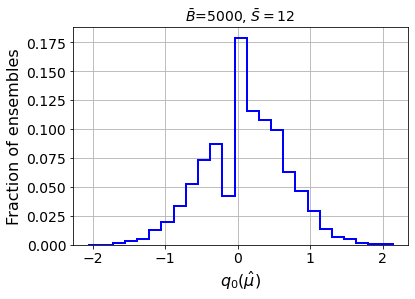

muhat mean:  0.10931259196972883
median q_muhat:  0.10829116041351483
Z_KDE:  0.32907622280182264
Z_KDE mu=0:  0.32907622280182264

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 


 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



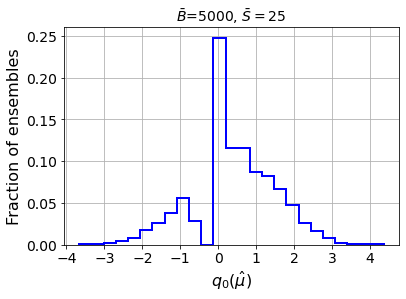

muhat mean:  0.2246370713233747
median q_muhat:  0.3818890783468163
Z_KDE:  0.617971745589405
Z_KDE mu=0:  0.617971745589405

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 


 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



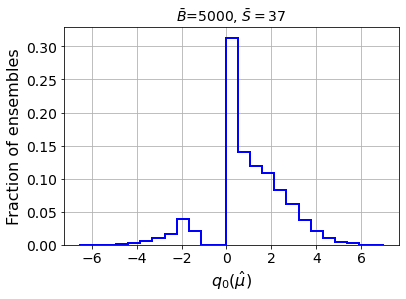

muhat mean:  0.24944222268996
median q_muhat:  0.8249179943594527
Z_KDE:  0.9082499624879996
Z_KDE mu=0:  0.9082499624879996

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 


 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



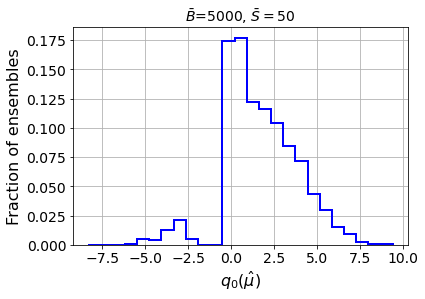

muhat mean:  0.2648716870004207
median q_muhat:  1.4665381539690472
Z_KDE:  1.2110070825428922
Z_KDE mu=0:  1.2110070825428922

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 


 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



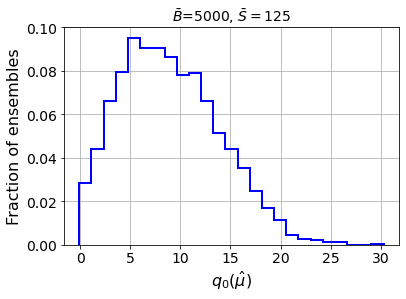

muhat mean:  0.1514123102866779
median q_muhat:  8.519002073100552
Z_KDE:  2.918732956798301
Z_KDE mu=0:  2.918918389463257

 ----------------------------------------- 



In [24]:
store_Z_MLL_KDE = []
store_Z_MLL_KDE_mu0 = []

store_muhat_mean_MLL = []




# FIND THE BANDWIDTH

bandwidth = np.logspace(-3.0, 0.05, 20)
print(bandwidth)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print(grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print(grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth







# aca fitteo 
kde_bkg = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalizo
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals,dens_bkg,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals,dens_sig,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )

# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')

    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]
    for jk in range(len(q_muhat_mu0)):
        if q_muhat_mu0[jk] < 0:
            q_muhat_mu0[jk] = 0

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]
    for jk in range(len(q_muhat)):
        if q_muhat[jk] < 0:
            q_muhat[jk] = 0

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [25]:
print(store_Z_MLL_KDE)
print(store_Z_MLL_KDE_mu0)

print(store_muhat_mean_MLL)

[0.04480678550180559, 0.13892140795142296, 0.21029982824426263, 0.32907622280182264, 0.617971745589405, 0.9082499624879996, 1.2110070825428922, 2.918732956798301]
[0.044761007087298445, 0.13892140795142296, 0.21029982824426263, 0.32907622280182264, 0.617971745589405, 0.9082499624879996, 1.2110070825428922, 2.918918389463257]
[0.017566715696574912, 0.05524490224931681, 0.07523649358839604, 0.10931259196972883, 0.2246370713233747, 0.24944222268996, 0.2648716870004207, 0.1514123102866779]


In [9]:
store_Z_MLL_KDE = [0.04480678550180559, 0.13892140795142296, 0.21029982824426263, 0.32907622280182264, 0.617971745589405, 0.9082499624879996, 1.2110070825428922, 2.918732956798301]
store_Z_MLL_KDE_mu0 = [0.044761007087298445, 0.13892140795142296, 0.21029982824426263, 0.32907622280182264, 0.617971745589405, 0.9082499624879996, 1.2110070825428922, 2.918918389463257]

store_muhat_mean_MLL = [0.017566715696574912, 0.05524490224931681, 0.07523649358839604, 0.10931259196972883, 0.2246370713233747, 0.24944222268996, 0.2648716870004207, 0.1514123102866779]

##### For 1 ML

[1.00000000e-03 1.44719254e-03 2.09436625e-03 3.03095122e-03
 4.38637001e-03 6.34792196e-03 9.18666532e-03 1.32948735e-02
 1.92402418e-02 2.78443345e-02 4.02961132e-02 5.83162345e-02
 8.43948197e-02 1.22135554e-01 1.76753662e-01 2.55796582e-01
 3.70186906e-01 5.35731729e-01 7.75306963e-01 1.12201845e+00]


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf           -inf           -inf           -inf
  2604.76929926  2581.20240784  2524.60580211  2402.82436825
  2180.88766362  1815.45992196  1257.80494163   467.22237586
  -590.11601438 -1830.1618657  -3054.45939111 -5216.27223574]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.01924024182760239, kernel='epanechnikov')


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf           -inf           -inf           -inf
  6421.79159447  6419.62179927  6407.56971148  6372.74583284
  6283.66099492  6058.86677711  5543.77592669  4556.37154876
  3005.6142235    974.52208567 -1446.78179168 -4515.46194599]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.01924024182760239, kernel='epanechnikov')


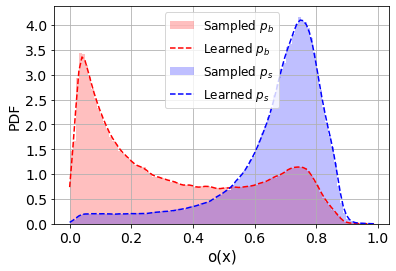


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 

Z_KDE_bins :  0.04787552227045008

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



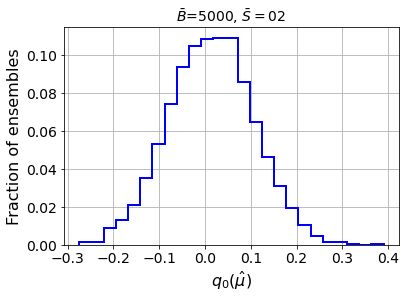

muhat mean:  0.018596343769699517
median q_muhat:  0.01412123003040211
Z_KDE:  0.1188327818003185
Z_KDE mu=0:  0.1188327818003185

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  0.11960528907531547

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



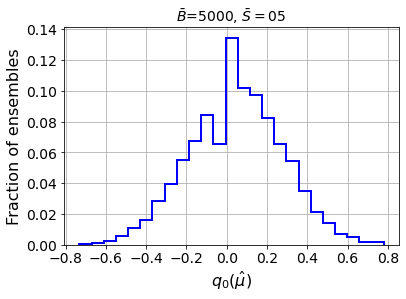

muhat mean:  0.048812276644944294
median q_muhat:  0.04604477623957237
Z_KDE:  0.2145804656523337
Z_KDE mu=0:  0.2145804656523337

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 

Z_KDE_bins :  0.19123519253119664

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



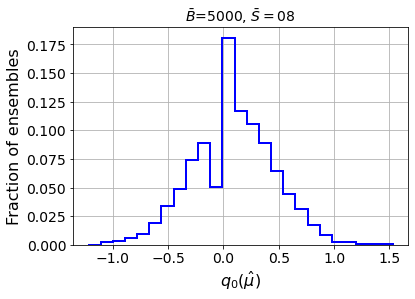

muhat mean:  0.07746478873239436
median q_muhat:  0.0872884179030251
Z_KDE:  0.2954461336741862
Z_KDE mu=0:  0.2954461336741862

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 

Z_KDE_bins :  0.28658707619257073

 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



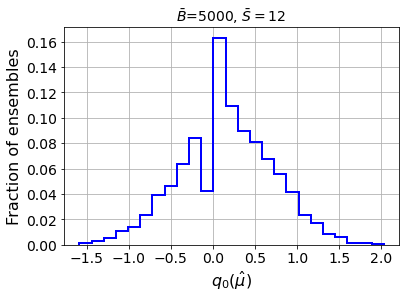

muhat mean:  0.11347487912549928
median q_muhat:  0.1532350473648414
Z_KDE:  0.3914524841725256
Z_KDE mu=0:  0.3914524841725256

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 

Z_KDE_bins :  0.5952707676821809

 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



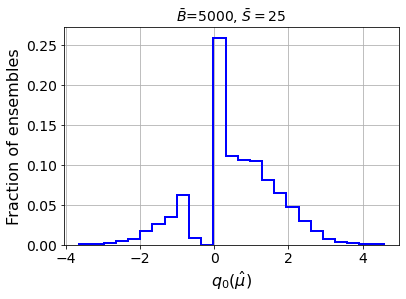

muhat mean:  0.19107931832526825
median q_muhat:  0.5212376757424053
Z_KDE:  0.7219679187764546
Z_KDE mu=0:  0.7219679187764546

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 

Z_KDE_bins :  0.8785878781891421

 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



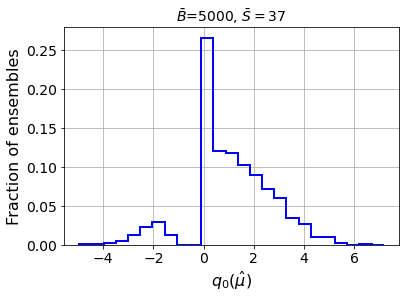

muhat mean:  0.2356766996421806
median q_muhat:  0.977633179661467
Z_KDE:  0.9887533462201111
Z_KDE mu=0:  0.9887533462201111

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  1.1837867231059098

 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



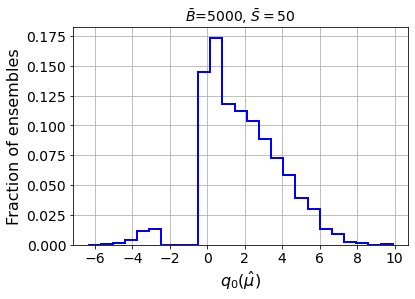

muhat mean:  0.25096760622633574
median q_muhat:  1.6287174176167767
Z_KDE:  1.2762121366045602
Z_KDE mu=0:  1.2762121366045602

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 

Z_KDE_bins :  2.9109063548983505

 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



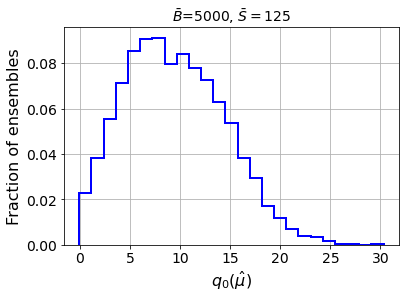

muhat mean:  0.1342959527824621
median q_muhat:  9.151847417574146
Z_KDE:  3.0252020457440767
Z_KDE mu=0:  3.0252020457440767

 ----------------------------------------- 



In [26]:
store_Z_KDE_bins = []

store_Z_MLL_KDE_1ML = []
store_Z_MLL_KDE_mu0_1ML = []

store_muhat_mean_MLL_1ML = []




# FIND THE BANDWIDTH

bandwidth = np.logspace(-3.0, 0.05, 20)
print(bandwidth)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM_1ML[:50000]])
print(grid.best_estimator_)

SM_bandwidth_1ML = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP_1ML[:50000]])
print(grid.best_estimator_)

NP_bandwidth_1ML = grid.best_estimator_.bandwidth







# aca fitteo 
kde_bkg_1ML = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth_1ML).fit(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ])
kde_sig_1ML = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth_1ML).fit(np.c_[pred_XG_NP_1ML, np.ones(len(pred_XG_NP_1ML)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val_1ML = np.min([np.min(pred_XG_SM_1ML),np.min(pred_XG_NP_1ML)])
max_val_1ML = np.max([np.max(pred_XG_SM_1ML),np.max(pred_XG_NP_1ML)])

s_vals_1ML = np.linspace(min_val_1ML,max_val_1ML,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[s_vals_1ML, np.zeros(len(s_vals_1ML)) ]) )
dens_sig_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[s_vals_1ML, np.ones(len(s_vals_1ML)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM_1ML = sum(dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))
factor_aux_NP_1ML = sum(dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))

# normalizo
dens_bkg_1ML = dens_bkg_1ML / factor_aux_SM_1ML
dens_sig_1ML = dens_sig_1ML / factor_aux_NP_1ML






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM_1ML,density=True,bins=100,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals_1ML,dens_bkg_1ML,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP_1ML,density=True,bins=100,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals_1ML,dens_sig_1ML,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ]) )
KDE_NP_pred_SM_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.ones(len(pred_XG_SM_1ML)) ]) )

# Normalize

KDE_SM_pred_SM_1ML = KDE_SM_pred_SM_1ML / factor_aux_SM_1ML
KDE_NP_pred_SM_1ML = KDE_NP_pred_SM_1ML / factor_aux_NP_1ML





indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')
    
    
    ####################
    # 1st a binned KDE #
    ####################
    
    # Bd: binned KDE background
    Bd = B_expected*dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0])




    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    Bd_noceros = []
    for i in range(len(Bd)):
        if Bd[i]!=0:
            Bd_noceros.append(Bd[i])

    min_back = min(Bd_noceros)

    # replace the zeros
    for i in range(len(Bd)):
        if Bd[i]==0:
            Bd[i] = min_back


    # Sd: binned KDE signal
    Sd = SsqrtB[iii]*np.sqrt(B_expected)*dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0])

    #Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
    Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

    store_Z_KDE_bins.append(Z_KDE_bins)

    print('Z_KDE_bins : ', Z_KDE_bins)
    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM_1ML[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM_1ML[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0_1ML.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL_1ML.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE_1ML.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [27]:
print(store_Z_KDE_bins)

print(store_Z_MLL_KDE_1ML)
print(store_Z_MLL_KDE_mu0_1ML)

print(store_muhat_mean_MLL_1ML)

[0.04787552227045008, 0.11960528907531547, 0.19123519253119664, 0.28658707619257073, 0.5952707676821809, 0.8785878781891421, 1.1837867231059098, 2.9109063548983505]
[0.1188327818003185, 0.2145804656523337, 0.2954461336741862, 0.3914524841725256, 0.7219679187764546, 0.9887533462201111, 1.2762121366045602, 3.0252020457440767]
[0.1188327818003185, 0.2145804656523337, 0.2954461336741862, 0.3914524841725256, 0.7219679187764546, 0.9887533462201111, 1.2762121366045602, 3.0252020457440767]
[0.018596343769699517, 0.048812276644944294, 0.07746478873239436, 0.11347487912549928, 0.19107931832526825, 0.2356766996421806, 0.25096760622633574, 0.1342959527824621]


In [10]:
store_Z_KDE_bins = [0.04787552227045008, 0.11960528907531547, 0.19123519253119664, 0.28658707619257073, 0.5952707676821809, 0.8785878781891421, 1.1837867231059098, 2.9109063548983505]

store_Z_MLL_KDE_1ML = [0.1188327818003185, 0.2145804656523337, 0.2954461336741862, 0.3914524841725256, 0.7219679187764546, 0.9887533462201111, 1.2762121366045602, 3.0252020457440767]
store_Z_MLL_KDE_mu0_1ML = [0.1188327818003185, 0.2145804656523337, 0.2954461336741862, 0.3914524841725256, 0.7219679187764546, 0.9887533462201111, 1.2762121366045602, 3.0252020457440767]

store_muhat_mean_MLL_1ML = [0.018596343769699517, 0.048812276644944294, 0.07746478873239436, 0.11347487912549928, 0.19107931832526825, 0.2356766996421806, 0.25096760622633574, 0.1342959527824621]

<ipython-input-11-8bc2cdbd1b25>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
<ipython-input-11-8bc2cdbd1b25>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')


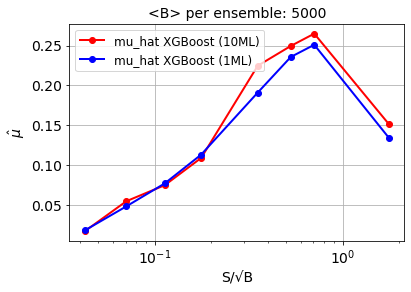

<ipython-input-11-8bc2cdbd1b25>:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-11-8bc2cdbd1b25>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-11-8bc2cdbd1b25>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-11-8bc2cdbd1b25>:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

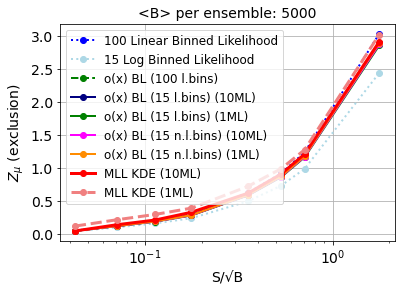

In [11]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )




plt.figure()
lw = 2

plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')

#plt.xlim([0.5, 100])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel(r'$\hat{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()






plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 4.Working points, counting over 1 bin

In [12]:
WP = [0.25, 0.5, 0.75]

S_expected = [int(SB_ratio[i]*B_expected) for i in range(len(SB_ratio))]

print(S_expected)

[2, 5, 8, 12, 25, 37, 50, 125]


In [30]:
# XGBoost #

SrootB_WP0_XG = []
SrootB_WP1_XG = []
SrootB_WP2_XG = []


# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

for j in range(len(S_expected)):
    
    # number of signal ensembles
    S_ensembles = int(len(pred_XG_NP)/S_expected[j])

    # shorten the number of S events so I get an integer number of ensembles
    pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected[j]) * S_expected[j]]

    XG_NP_passWP0 = 0
    XG_NP_passWP1 = 0
    XG_NP_passWP2 = 0

    for i in range(len(pred_XG_NP_entero)):
        if pred_XG_NP_entero[i] > WP[0]:
            XG_NP_passWP0 += 1
        if pred_XG_NP_entero[i] > WP[1]:
            XG_NP_passWP1 += 1
        if pred_XG_NP_entero[i] > WP[2]:
            XG_NP_passWP2 += 1

            
    # save the results Z_binned after WP
    SrootB_WP0_XG.append( ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5 )
    SrootB_WP1_XG.append( ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5 )
    SrootB_WP2_XG.append( ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5 )
    
    print('S_expected = ', S_expected[j])
    print('WP: 0     S/B**0.5= ', S_expected[j]/(B_expected)**0.5)
    print('WP: ', WP[0], '    S/B**0.5= ', SrootB_WP0_XG[j] )
    print('WP: ', WP[1], '    S/B**0.5= ', SrootB_WP1_XG[j] )
    print('WP: ', WP[2], '    S/B**0.5= ', SrootB_WP2_XG[j] )
    print('------------------------')
    print('')
    
print('SrootB_WP0_XG: ', SrootB_WP0_XG)
print('SrootB_WP1_XG: ', SrootB_WP1_XG)
print('SrootB_WP2_XG: ', SrootB_WP2_XG)

S_expected =  2
WP: 0     S/B**0.5=  0.0282842712474619
WP:  0.25     S/B**0.5=  0.03724053545693785
WP:  0.5     S/B**0.5=  0.04425469223696024
WP:  0.75     S/B**0.5=  0.03146871212881799
------------------------

S_expected =  5
WP: 0     S/B**0.5=  0.07071067811865475
WP:  0.25     S/B**0.5=  0.09310132161641045
WP:  0.5     S/B**0.5=  0.11063666423297344
WP:  0.75     S/B**0.5=  0.07867209461315945
------------------------

S_expected =  8
WP: 0     S/B**0.5=  0.1131370849898476
WP:  0.25     S/B**0.5=  0.1489620328604667
WP:  0.5     S/B**0.5=  0.1770191576112726
WP:  0.75     S/B**0.5=  0.12587518708693077
------------------------

S_expected =  12
WP: 0     S/B**0.5=  0.1697056274847714
WP:  0.25     S/B**0.5=  0.223442885834549
WP:  0.5     S/B**0.5=  0.26552809935790905
WP:  0.75     S/B**0.5=  0.18881077909064325
------------------------

S_expected =  25
WP: 0     S/B**0.5=  0.35355339059327373
WP:  0.25     S/B**0.5=  0.4655053310553624
WP:  0.5     S/B**0.5=  0.5531859695

In [13]:
# To use if you dont want to run everything again. Its the previous results
SrootB_WP0_XG = [0.03724053545693785, 0.09310132161641045, 0.1489620328604667, 0.223442885834549, 0.4655053310553624, 0.6889485199869393, 0.9310106621107248, 2.3275248191542817]
SrootB_WP1_XG = [0.04425469223696024, 0.11063666423297344, 0.1770191576112726, 0.26552809935790905, 0.5531859695882841, 0.8187101664467499, 1.1063719391765683, 2.765961287759716]
SrootB_WP2_XG = [0.03146871212881799, 0.07867209461315945, 0.12587518708693077, 0.18881077909064325, 0.3933579058470314, 0.5821735463491099, 0.7867158116940628, 1.9667380158815486]

<ipython-input-14-1231ce6ddeb8>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-14-1231ce6ddeb8>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-14-1231ce6ddeb8>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-14-1231ce6ddeb8>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

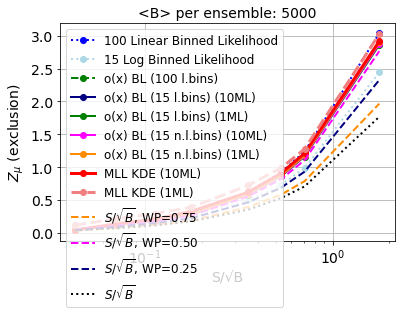

In [14]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

<ipython-input-15-415cc2f1cb5e>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')


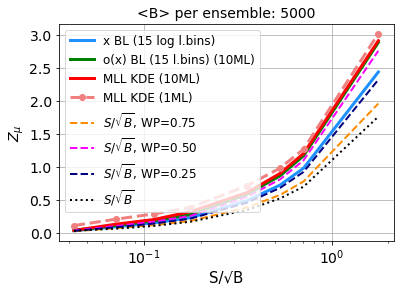

In [15]:
posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_logbins, '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### Interpolate

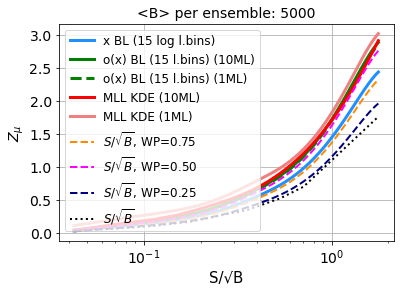

In [16]:
    
# Interpolation, cubic
fcubic_bins_logbins = interp1d(posX, store_Z_bins_logbins, kind='cubic')
fcubic_bins_XG_15bins = interp1d(posX, store_Z_bins_XG_15bins, kind='cubic')
fcubic_bins_XG_15bins_1ML = interp1d(posX, store_Z_bins_XG_15bins_1ML, kind='cubic')
fcubic_XG_MLL = interp1d(posX, store_Z_MLL_KDE, kind='cubic')
fcubic_XG_MLL_1ML = interp1d(posX, store_Z_MLL_KDE_1ML, kind='cubic')
fcubic_WP0_XG = interp1d(posX, SrootB_WP0_XG, kind='cubic')
fcubic_WP1_XG = interp1d(posX, SrootB_WP1_XG, kind='cubic')
fcubic_WP2_XG = interp1d(posX, SrootB_WP2_XG, kind='cubic')


# x to plot
plotX = np.linspace(min(posX), max(posX), num=50, endpoint=True)



plt.figure()
lw = 2

plt.plot(plotX, fcubic_bins_logbins(plotX), '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(plotX, fcubic_bins_XG_15bins(plotX), '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(plotX, fcubic_bins_XG_15bins_1ML(plotX), '--', color='green', lw=3, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(plotX, fcubic_XG_MLL(plotX), '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(plotX, fcubic_XG_MLL_1ML(plotX), '-', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(plotX, fcubic_WP0_XG(plotX), '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(plotX, fcubic_WP1_XG(plotX), '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(plotX, fcubic_WP2_XG(plotX), '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.ylim([0., 6])
#plt.xlim([0.06, 10])
#plt.ylim([0., 3])
#plt.xlim([0.1, 0.2])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [17]:
# AUX FUNCTION TO FIND SOLUTIONS

def dx(fn, x, delta=0.001):
    return (fn(x+delta) - fn(x))/delta

def solve(fn, value, x=0.1, maxtries=1000, maxerr=0.00001):
    for tries in range(maxtries):
        err = fn(x) - value
        if abs(err) < maxerr:
            return x
        slope = dx(fn, x)
        x -= err/slope
    raise ValueError('no solution found')

In [18]:
##############################
# DO NOT FORGET THE K-factor #
##############################

k_factor = 3
SM_cross_section_fb = 0.3106
acceptance_SM = 0.4*2
true_B_expected = 3000 * SM_cross_section_fb * k_factor * acceptance_SM

correct_factor = true_B_expected / B_expected

print('correct_factor: ', correct_factor)
print('')


# Find S/\sqrt{B} such that 95%C.L. upper limit, i.e  ----> Z = 1.64

bins_logbins_95CL = solve(fcubic_bins_logbins, 1.64)
bins_XG_15bins_95CL = solve(fcubic_bins_XG_15bins, 1.64)
XG_MLL_95CL = solve(fcubic_XG_MLL, 1.64)
bins_XG_15bins_1ML_95CL = solve(fcubic_bins_XG_15bins_1ML, 1.64)
XG_MLL_1ML_95CL = solve(fcubic_XG_MLL_1ML, 1.64)


# corresponding to a number of signal events:
acceptance_Signal = 0.723034
S1 = ( (correct_factor * B_expected)**0.5 * bins_logbins_95CL ) / acceptance_Signal
S2 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_95CL ) / acceptance_Signal
S3 = ( (correct_factor * B_expected)**0.5 * XG_MLL_95CL ) / acceptance_Signal
S4 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_1ML_95CL ) / acceptance_Signal
S5 = ( (correct_factor * B_expected)**0.5 * XG_MLL_1ML_95CL ) / acceptance_Signal

# corresponding to a cross-section (pb)
cross_bins_logbins_95CL = S1 / 3000000
cross_bins_XG_15bins_95CL = S2 / 3000000
cross_XG_MLL_95CL = S3 / 3000000
cross_bins_XG_15bins_1ML_95CL = S4 / 3000000
cross_XG_MLL_1ML_95CL = S5 / 3000000



print('95%C.L. upper limit, i.e  ----> Z = 1.64: \n')
print('     S/\sqrt{B}              S          cross-section (pb)')
print(bins_logbins_95CL , S1 , cross_bins_logbins_95CL)
print(bins_XG_15bins_95CL , S2 , cross_bins_XG_15bins_95CL)
print(XG_MLL_95CL, S3 , cross_XG_MLL_95CL)
print(bins_XG_15bins_1ML_95CL , S4 , cross_bins_XG_15bins_1ML_95CL)
print(XG_MLL_1ML_95CL, S5 , cross_XG_MLL_1ML_95CL)



np.savetxt('saved-models/results2500GeV-mumu.txt', [cross_bins_logbins_95CL,cross_bins_XG_15bins_95CL,cross_XG_MLL_95CL,cross_bins_XG_15bins_1ML_95CL,cross_XG_MLL_1ML_95CL])


correct_factor:  0.44726399999999994

95%C.L. upper limit, i.e  ----> Z = 1.64: 

     S/\sqrt{B}              S          cross-section (pb)
1.1154116898261883 72.95304867023425 2.4317682890078084e-05
0.953830389615688 62.384889338594796 2.0794963112864933e-05
0.9559523852337916 62.52367760037969 2.084122586679323e-05
0.963549023096146 63.02053261522076 2.1006844205073585e-05
0.9030097184075658 59.060983973502346 1.9686994657834115e-05
